## **Analisis Dampak Faktor Cuaca Terhadap Produksi Padi Melalui Klasterisasi K-Means sebagai Upaya Adaptasi Perubahan Iklim**.
Kelompok 3

1. Abrar Wujedaan [F1G123001]

2. Yayan Gisna Yudasti [F1G123055]

3. Zacky Fiqran Kasmada [F1G123038]

# **Menentukan Pertanyaan Bisnis atau Analisis**
1. Bagaimana hubungan antara intensitas curah hujan dan kelembapan dengan capaian hasil panen pada masing-masing klaster wilayah yang terbentuk di Sumatra?

2. Bagaimana pengaruh kondisi iklim yang meliputi curah hujan, suhu rata-rata, kelembapan, dan lama penyinaran matahari terhadap tingkat produktivitas tanaman pangan (ku/ha) di wilayah Sumatra?

3. Bagaimana sebaran data dan interaksi antar indikator agroklimat terhadap tren produktivitas pertanian di Sumatra, serta model manakah yang paling presisi dalam menangkap dinamika tersebut?

4. Bagaimana hubungan antara ketersediaan luas panen dengan total volume produksi tanaman pangan yang dihasilkan di setiap provinsi di Sumatra, apakah berbanding lurus secara konsisten?

5. Bagaimana sebaran data dan hubungan timbal balik antara indikator lingkungan (cuaca) dengan indikator kinerja pertanian (produktivitas) di provinsi-provinsi Sumatra selama periode 2018-2024?

6. Seberapa besar peningkatan akurasi estimasi produktivitas tanaman pangan di Sumatra jika dilakukan berdasarkan karakteristik tipologi wilayah (zonasi iklim) dibandingkan dengan estimasi secara nasional/umum?

###**Deskripsi Proyek:**

Proyek ini bertujuan untuk mengklasterisasi wilayah produksi tanaman pangan di Pulau Sumatra periode 2018–2024 melalui pendekatan data-driven yang menitikberatkan pada faktor agroklimat. Dengan menggunakan algoritma K-Means Clustering, data kompleks mengenai pola cuaca dan hasil produksi diproses untuk mengidentifikasi tipologi wilayah berdasarkan kesamaan karakteristik lingkungan dan produktivitasnya. Melalui pengelompokan ini, dinamika dampak perubahan iklim terhadap tanaman pangan dapat dipetakan secara spasial, sehingga menghasilkan zonasi wilayah yang memiliki tingkat kerentanan atau potensi serupa. Hasil klasterisasi ini menjadi fondasi utama dalam merancang strategi adaptasi yang lebih presisi dan spesifik bagi tiap daerah guna memperkuat ketahanan pangan regional di Sumatra.

##**Environment Setup**

---









###**Import Libraries**

Menginisialisasi lingkungan kerja dengan memuat pustaka esensial untuk rekayasa data dan komputasi numerik (**pandas, numpy**), visualisasi eksploratif (**matplotlib, seaborn**), serta pengembangan model prediktif menggunakan regresi linear (**sklearn**).

In [ ]:
import pandas as pd      # untuk data frame, cleaning, manipulasi data
import numpy as np       # untuk operasi numerik, array, statistik dasar
import matplotlib.pyplot as plt  # untuk visualisasi data
import seaborn as sns    # untuk visualisasi statistik
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from google.colab import drive


###**Koneksi Google Drive**

Hubungkan Google Collab dan Google Drive untuk akses dataset.

In [ ]:
drive.mount('/content/drive', force_remount=True)
base_path = '/content/drive/MyDrive/dataset_ds/'

Mounted at /content/drive


##**Data Wrangling**

---



###**📥Gathering Data**

**Proses** inisialisasi dan impor data mentah dari direktori penyimpanan ke dalam format *DataFrame* Pandas dengan validasi keberadaan file.
* *Dataset:* Data Iklim, Data Produktivitas, dan Data Tanaman Padi.

In [ ]:
# ======================================================
# Load Data Iklim
# ======================================================
try:
    Iklim = pd.read_csv(base_path + "data_iklim_sumatera.csv")
    print(f"[SUCCESS] Data Iklim loaded: {Iklim.shape} (Baris, Kolom)")
except FileNotFoundError:
    print("[ERROR] File data_iklim_sumatera.csv tidak ditemukan. Periksa path dan nama file.")

# ======================================================
# Load Data Produktivitas
# ======================================================
try:
    Produktivitas = pd.read_csv(base_path + "data_produktivitas_sumatera.csv")
    print(f"[SUCCESS] Data Produktivitas loaded: {Produktivitas.shape} (Baris, Kolom)")
except FileNotFoundError:
    print("[ERROR] File data_produktivitas_sumatera.csv tidak ditemukan.")

# ======================================================
# Load Data Tanaman Padi
# ======================================================
try:
    Tanaman = pd.read_csv(base_path + "Data_Tanaman_Padi_Sumatera.csv")
    print(f"[SUCCESS] Data Tanaman Padi loaded: {Tanaman.shape} (Baris, Kolom)")
except FileNotFoundError:
    print("[ERROR] File Data_Tanaman_Padi_Sumatera.csv tidak ditemukan.")

[SUCCESS] Data Iklim loaded: (70, 5) (Baris, Kolom)
[SUCCESS] Data Produktivitas loaded: (56, 3) (Baris, Kolom)
[SUCCESS] Data Tanaman Padi loaded: (256, 7) (Baris, Kolom)


### **👀Data Inspection (Preview)**
Melakukan pemeriksaan visual awal terhadap dataset `Tanaman` untuk memvalidasi struktur dan konten data pasca-impor.
* *Tujuan:* Menampilkan 10 sampel teratas (`head(10)`) guna memverifikasi skema kolom, format nilai, dan mendeteksi potensi anomali secara cepat sebelum pemrosesan lebih lanjut.

In [ ]:
print("10 Data dari Dataset Tanaman: ")
Tanaman.head(10)

10 Data dari Dataset Tanaman: 


,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31
5,Aceh,1998,1404580.0,365892.0,1465.0,82.60,26.84
6,Aceh,1999,1478712.0,359817.0,1778.0,82.79,26.14
7,Aceh,2000,1486909.0,336765.0,1974.7,90.60,27.10
8,Aceh,2001,1547499.0,295212.0,1688.7,69.48,28.90
9,Aceh,2002,1314165.0,315131.0,1296.8,68.75,29.20


Melakukan pemeriksaan visual awal terhadap dataset `Iklim` untuk memvalidasi struktur dan konten data pasca-impor.
* *Tujuan:* Menampilkan 10 sampel teratas (`head(10)`) guna memverifikasi skema kolom, format nilai, dan mendeteksi potensi anomali secara cepat sebelum pemrosesan lebih lanjut.

In [ ]:
print("\n10 Data dari Dataset Iklim: ")
Iklim.head(10)


10 Data dari Dataset Iklim: 


,Provinsi,Tahun,Curah Hujan (mm),Lama Penyinaran Matahari (%),Suhu Rata-rata (°C)
0,Aceh,2018,1928.5,56,26.4
1,Aceh,2019,1916.7,55,26.6
2,Aceh,2020,1974.5,58,26.7
3,Aceh,2021,2085.8,59,26.5
4,Aceh,2022,2154.6,57,26.6
5,Aceh,2023,2187.5,58,26.6
6,Aceh,2024,2220.0,58,26.6
7,Sumatera Utara,2018,2404.7,54,25.8
8,Sumatera Utara,2019,2396.2,53,26.0
9,Sumatera Utara,2020,2486.9,55,26.1


Melakukan pemeriksaan visual awal terhadap dataset `Produktivitas` untuk memvalidasi struktur dan konten data pasca-impor.
* *Tujuan:* Menampilkan 10 sampel teratas (`head(10)`) guna memverifikasi skema kolom, format nilai, dan mendeteksi potensi anomali secara cepat sebelum pemrosesan lebih lanjut.

In [ ]:
print("\n10 Data dari Dataset Produktivitas: ")
Produktivitas.head(10)


10 Data dari Dataset Produktivitas: 


,Provinsi,Tahun,Produktivitas (ku/ha)
0,ACEH,2018,"56,49"
1,ACEH,2019,"55,3"
2,ACEH,2020,"55,28"
3,ACEH,2021,"55,03"
4,ACEH,2022,"55,55"
5,ACEH,2023,"55,22"
6,ACEH,2024,"55,11"
7,BENGKULU,2018,"43,83"
8,BENGKULU,2019,"46,03"
9,BENGKULU,2020,"45,66"


#**Rangkuman Eksekutif: Tren Padi & Iklim Sumatera (2018-2024)**

Berikut adalah ringkasan tren utama berdasarkan analisis data, yang menyoroti arah pergerakan dan pola hubungan:

## 1. Dinamika Produksi
* **📈 Tren Kenaikan:**
  **Riau** dan **Bengkulu** mencatat lonjakan produksi yang sangat positif. Kedua provinsi ini mengalami peningkatan hasil panen yang signifikan dibandingkan tahun awal pengamatan.
* **📉 Tren Penurunan:**
  Sebaliknya, **Lampung** mengalami penurunan produksi yang paling tajam. Tren negatif (penurunan) juga terlihat pada provinsi **Aceh**, **Sumatera Barat**, dan **Sumatera Selatan**.

## 2. Efisiensi & Produktivitas
* **🏆 Efisiensi Lahan:**
  **Aceh** konsisten menjadi provinsi dengan tingkat efisiensi lahan tertinggi (produktivitas paling baik per hektar), diikuti oleh wilayah Sumatera Selatan dan Utara.
* **⚠️ Tantangan Produktivitas:**
  **Riau**, meskipun total produksinya naik drastis, memiliki tingkat produktivitas lahan yang paling rendah. Ini mengindikasikan bahwa kenaikan produksi di sana lebih didorong oleh pembukaan lahan baru (ekstensifikasi), bukan karena peningkatan kualitas panen per hektar.

## 3. Faktor Iklim
* **☀️ Peran Matahari:**
  Terdapat hubungan positif antara penyinaran matahari dan hasil panen. Semakin tinggi intensitas penyinaran matahari, produktivitas lahan cenderung semakin baik.
* **🌧️ Risiko Curah Hujan:**
  Sebaliknya, curah hujan memiliki hubungan negatif dengan produktivitas. Curah hujan yang terlalu tinggi cenderung menghambat produktivitas, kemungkinan akibat risiko banjir atau penyakit tanaman yang menyukai kelembapan tinggi.

## 4. Strategi Produksi
* **🚜 Ketergantungan Lahan:**
  Data menunjukkan ketergantungan yang sangat kuat antara luas lahan dengan total produksi. Strategi pertanian di Sumatera saat ini masih sangat mengandalkan perluasan area tanam daripada optimalisasi teknologi untuk meningkatkan hasil per hektar.

## 5. Pemimpin Pasar (Market Leader)
Provinsi yang menjadi penyangga utama pangan (lumbung padi) di Sumatera secara berurutan adalah:
1.  **Sumatera Selatan**
2.  **Lampung**
3.  **Sumatera Utara**

---



## **🕵️ Assessing Data**
Melakukan pemindaian teknis mendalam terhadap arsitektur dataset menggunakan method `.info()`.
* *Insight:* Memberikan ringkasan krusial mengenai **tipe data** (*dtypes*), **penggunaan memori**, serta mendeteksi dini keberadaan **data yang hilang** (*missing values*) melalui indikator *non-null counts*.

In [ ]:
print("Info Data dari Dataset Tanaman: ")
Tanaman.info()

Info Data dari Dataset Tanaman: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        256 non-null    object 
 1   Tahun           256 non-null    int64  
 2   Produksi        256 non-null    float64
 3   Luas Panen      256 non-null    float64
 4   Curah hujan     256 non-null    float64
 5   Kelembapan      256 non-null    float64
 6   Suhu rata-rata  256 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 14.1+ KB


In [ ]:
print("\nInfo Data dari Dataset Iklim: ")
Iklim.info()


Info Data dari Dataset Iklim: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Provinsi                      70 non-null     object 
 1   Tahun                         70 non-null     int64  
 2   Curah Hujan (mm)              70 non-null     float64
 3   Lama Penyinaran Matahari (%)  70 non-null     int64  
 4   Suhu Rata-rata (°C)           70 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.9+ KB


In [ ]:
print("Info Data dari Dataset Produktivitas: ")
Produktivitas.info()

Info Data dari Dataset Produktivitas: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Provinsi               56 non-null     object
 1   Tahun                  56 non-null     int64 
 2   Produktivitas (ku/ha)  56 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.4+ KB


### **♻️ Data Integrity Check (Duplication Analysis)**
Mengidentifikasi dan menguantifikasi redundansi data pada dataset `Tanaman`, `Iklim`, dan `Produktivitas`.
* *Tujuan:* Memastikan keunikan observasi (*uniqueness*) guna mencegah bias statistik yang dapat disebabkan oleh duplikasi entri sebelum melangkah ke tahap pembersihan data.

In [ ]:
print("Duplicat Data dari Dataset Tanaman: ")
print(Tanaman.duplicated().sum())
print("\nDuplicat Data dari Dataset Iklim: ")
print(Iklim.duplicated().sum())
print("\nDuplicat Data dari Dataset Produktivitas: ")
print(Produktivitas.duplicated().sum())

Duplicat Data dari Dataset Tanaman: 
0

Duplicat Data dari Dataset Iklim: 
0

Duplicat Data dari Dataset Produktivitas: 
0


### **📊 Data Distribution & Statistical Summary**
Menghasilkan potret statistik menyeluruh untuk setiap variabel dalam ketiga dataset (*Tanaman, Iklim, Produktivitas*) menggunakan parameter `include='all'`.
* *Insight:* Menyajikan metrik sentral (**mean, median**), dispersi (**standar deviasi, kuartil**) untuk data numerik, serta kardinalitas (**unique, top, frequency**) untuk data kategorikal, guna mendeteksi anomali distribusi atau *outlier* secara dini.

In [ ]:
Tanaman.describe(include='all')

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
count,256,256.000000,2.560000e+02,256.000000,256.000000,256.000000,256.000000
unique,8,NaN,NaN,NaN,NaN,NaN,NaN
top,Aceh,NaN,NaN,NaN,NaN,NaN,NaN
freq,32,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2008.500000,1.653753e+06,359019.787461,2494.128086,80.985117,26.802188
std,NaN,9.251179,1.136395e+06,229663.674849,1041.714979,4.708817,1.141273
min,NaN,1993.000000,4.293800e+04,51050.000000,191.230000,54.200000,22.190000
25%,NaN,2000.750000,5.438192e+05,145241.250000,1788.300000,78.850000,26.235000
50%,NaN,2008.500000,1.640770e+06,355828.000000,2376.000000,82.315000,26.790000
75%,NaN,2016.250000,2.383888e+06,504744.022500,3083.250000,84.000000,27.200000


In [ ]:
Iklim.describe(include='all')

,Provinsi,Tahun,Curah Hujan (mm),Lama Penyinaran Matahari (%),Suhu Rata-rata (°C)
count,70,70.000000,70.000000,70.000000,70.000000
unique,10,NaN,NaN,NaN,NaN
top,Aceh,NaN,NaN,NaN,NaN
freq,7,NaN,NaN,NaN,NaN
mean,NaN,2021.000000,2679.848571,54.814286,26.571429
std,NaN,2.014441,406.377685,2.682703,0.627196
min,NaN,2018.000000,1916.700000,49.000000,24.900000
25%,NaN,2019.000000,2381.150000,53.000000,26.400000
50%,NaN,2021.000000,2667.850000,55.000000,26.700000
75%,NaN,2023.000000,2976.425000,57.000000,27.000000


In [ ]:
Produktivitas.describe(include='all')

,Provinsi,Tahun,Produktivitas (ku/ha)
count,56,56.0000,56
unique,8,NaN,56
top,ACEH,NaN,"56,49"
freq,7,NaN,1
mean,NaN,2021.0000,NaN
std,NaN,2.0181,NaN
min,NaN,2018.0000,NaN
25%,NaN,2019.0000,NaN
50%,NaN,2021.0000,NaN
75%,NaN,2023.0000,NaN


### **🚩 Anomaly Detection (Outlier Analysis via IQR)**

Tahap ini menerapkan inspeksi statistik kuantitatif untuk mendeteksi keberadaan **pencilan data (outliers)** pada seluruh fitur numerik di ketiga dataset.



* **🧪 Metodologi Statistik:**
    Menggunakan teknik **Interquartile Range (IQR)**, sebuah metode *robust* yang mendefinisikan "wilayah wajar" distribusi data. Observasi dianggap sebagai outlier jika berada di luar rentang:
    * **Batas Bawah:** Q1 - 1.5 * IQR
    * **Batas Atas:** Q3 + 1.5 * IQR

* **🔄 Mekanisme Eksekusi:**
    Kode melakukan iterasi otomatis pada setiap kolom numerik, menghitung kuartil ($Q1, Q3$), menentukan ambang batas ekstrem, dan mengagregasi jumlah data yang melanggar batas tersebut.

* **💡 Signifikansi:**
    Langkah ini krusial sebelum pemodelan (*Linear Regression*), karena outlier yang tidak tertangani dapat **mendistorsi parameter statistik** (seperti *mean* dan varians) dan menyebabkan bias yang signifikan pada akurasi prediksi model.

**Jumlah Outlier Dataset Tanaman**

In [ ]:
for column in Tanaman.select_dtypes(include='number').columns:
    Q1 = Tanaman[column].quantile(0.25)
    Q3 = Tanaman[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    jumlah = ((Tanaman[column] < lower) | (Tanaman[column] > upper)).sum()
    print(f"{column} → {jumlah} outlier")

Tahun → 0 outlier
Produksi → 0 outlier
Luas Panen → 0 outlier
Curah hujan → 4 outlier
Kelembapan → 13 outlier
Suhu rata-rata → 31 outlier


**Jumlah Outlier Dataset Iklim**

In [ ]:
for column in Iklim.select_dtypes(include='number').columns:
    Q1 = Iklim[column].quantile(0.25)
    Q3 = Iklim[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    jumlah = ((Iklim[column] < lower) | (Iklim[column] > upper)).sum()
    print(f"{column} → {jumlah} outlier")

Tahun → 0 outlier
Curah Hujan (mm) → 0 outlier
Lama Penyinaran Matahari (%) → 0 outlier
Suhu Rata-rata (°C) → 7 outlier


**Jumlah Outlier Dataset Produktivitas**

In [ ]:
for column in Produktivitas.select_dtypes(include='number').columns:
    Q1 = Produktivitas[column].quantile(0.25)
    Q3 = Produktivitas[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    jumlah = ((Produktivitas[column] < lower) | (Produktivitas[column] > upper)).sum()
    print(f"{column} → {jumlah} outlier")

Tahun → 0 outlier


### **⚖️ Outlier Verification & Impact Analysis**

Langkah ini merupakan tahap **Simulasi & Validasi Keputusan** (*Decision Making*). Sebelum benar-benar menghapus data, kode ini melakukan "uji coba" untuk melihat dampaknya.


**Tujuan Utama:**
* **👁️ Visual Diagnosis (Before vs After):** Membandingkan *Boxplot* sebelum dan sesudah filtrasi untuk melihat apakah sebaran data menjadi lebih normal atau justru kehilangan variasi penting.
* **🧮 Quantitative Audit (Biaya Pembersihan):** Menghitung secara eksak berapa banyak baris data yang akan "dikorbankan" (`initial - final`).
* **🛡️ Risk Assessment:** Membantu Anda memutuskan strategi: **Hapus** (jika jumlah sedikit & data memang *error*) atau **Biarkan/Imputasi** (jika data yang hilang terlalu masif >5%).

Visualisasi Data Asli (Sebelum Pembersihan Outlier):



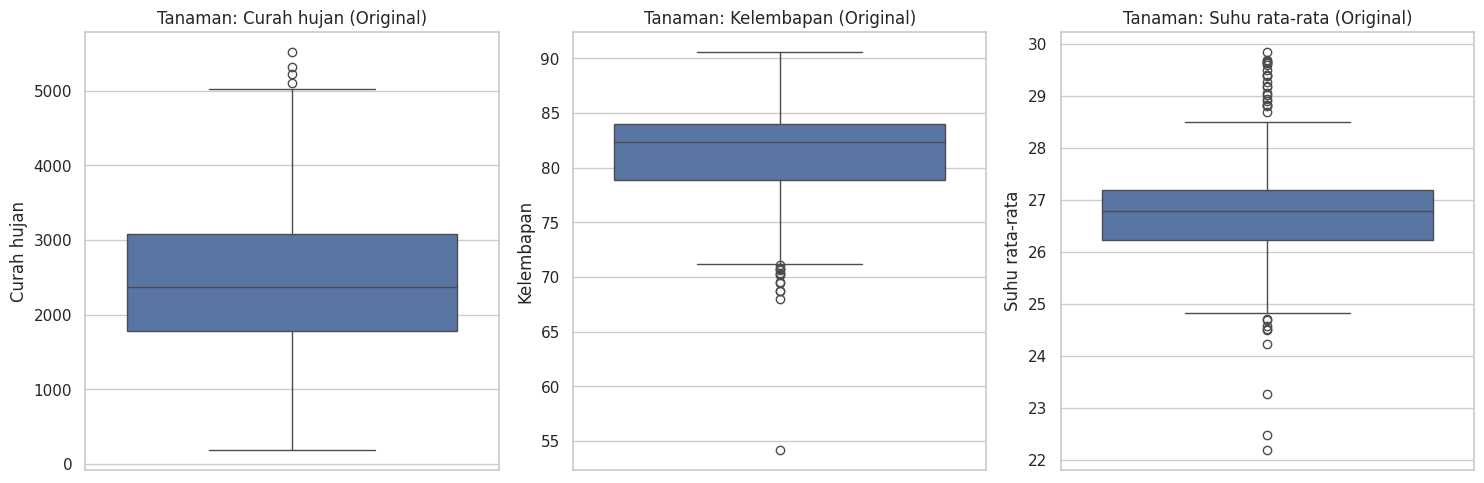

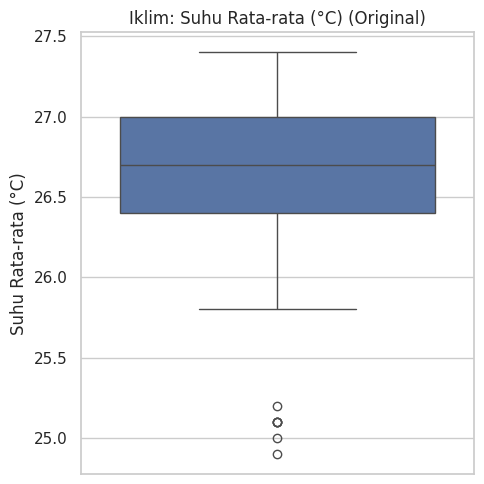


--- Efek Pembersihan Outlier (Secara Hipotetis) ---
Jumlah baris di Tanaman sebelum filtering: 256
Jumlah baris di Tanaman setelah filtering hipotetis: 217
Jumlah outlier yang akan dihapus dari Tanaman: 39
Jumlah baris di Iklim sebelum filtering: 70
Jumlah baris di Iklim setelah filtering hipotetis: 63
Jumlah outlier yang akan dihapus dari Iklim: 7

Visualisasi Data Setelah Penerapan Logika Pembersihan Outlier (Hipotetis):



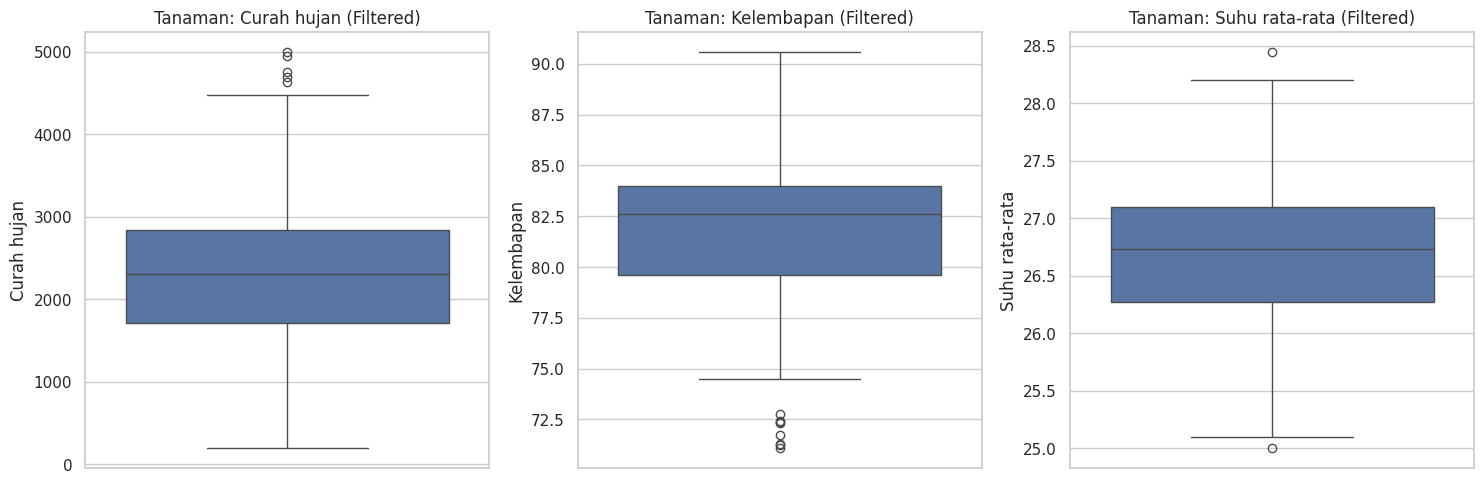

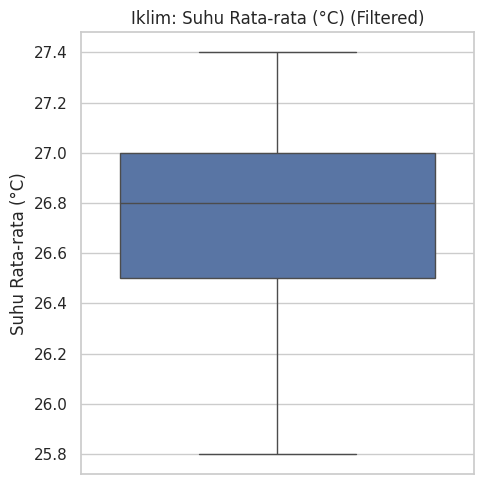

In [ ]:
Tanaman_original = Tanaman.copy()
Iklim_original = Iklim.copy()

# --- Visualisasi Data Asli (Sebelum Pembersihan Outlier) ---
print("Visualisasi Data Asli (Sebelum Pembersihan Outlier):\n")

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=Tanaman_original['Curah hujan'])
plt.title('Tanaman: Curah hujan (Original)')
plt.subplot(1, 3, 2)
sns.boxplot(y=Tanaman_original['Kelembapan'])
plt.title('Tanaman: Kelembapan (Original)')
plt.subplot(1, 3, 3)
sns.boxplot(y=Tanaman_original['Suhu rata-rata'])
plt.title('Tanaman: Suhu rata-rata (Original)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 5))
sns.boxplot(y=Iklim_original['Suhu Rata-rata (°C)'])
plt.title('Iklim: Suhu Rata-rata (°C) (Original)')
plt.tight_layout()
plt.show()

# --- Penerapan Logika Pembersihan Outlier (Secara Hipotetis) ---
Tanaman_filtered = Tanaman_original.copy()
Iklim_filtered = Iklim_original.copy()

print("\n--- Efek Pembersihan Outlier (Secara Hipotetis) ---")

initial_tanaman_shape = Tanaman_filtered.shape[0]
for column in ['Curah hujan', 'Kelembapan', 'Suhu rata-rata']:
    Q1 = Tanaman_filtered[column].quantile(0.25)
    Q3 = Tanaman_filtered[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    Tanaman_filtered = Tanaman_filtered[(Tanaman_filtered[column] >= lower_bound) & (Tanaman_filtered[column] <= upper_bound)]

final_tanaman_shape = Tanaman_filtered.shape[0]
print(f"Jumlah baris di Tanaman sebelum filtering: {initial_tanaman_shape}")
print(f"Jumlah baris di Tanaman setelah filtering hipotetis: {final_tanaman_shape}")
print(f"Jumlah outlier yang akan dihapus dari Tanaman: {initial_tanaman_shape - final_tanaman_shape}")

initial_iklim_shape = Iklim_filtered.shape[0]
for column in ['Suhu Rata-rata (°C)']:
    Q1 = Iklim_filtered[column].quantile(0.25)
    Q3 = Iklim_filtered[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    Iklim_filtered = Iklim_filtered[(Iklim_filtered[column] >= lower_bound) & (Iklim_filtered[column] <= upper_bound)]

final_iklim_shape = Iklim_filtered.shape[0]
print(f"Jumlah baris di Iklim sebelum filtering: {initial_iklim_shape}")
print(f"Jumlah baris di Iklim setelah filtering hipotetis: {final_iklim_shape}")
print(f"Jumlah outlier yang akan dihapus dari Iklim: {initial_iklim_shape - final_iklim_shape}")


# --- Visualisasi Data Setelah Penerapan Logika Pembersihan Outlier (Hipotetis) ---
print("\nVisualisasi Data Setelah Penerapan Logika Pembersihan Outlier (Hipotetis):\n")

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=Tanaman_filtered['Curah hujan'])
plt.title('Tanaman: Curah hujan (Filtered)')
plt.subplot(1, 3, 2)
sns.boxplot(y=Tanaman_filtered['Kelembapan'])
plt.title('Tanaman: Kelembapan (Filtered)')
plt.subplot(1, 3, 3)
sns.boxplot(y=Tanaman_filtered['Suhu rata-rata'])
plt.title('Tanaman: Suhu rata-rata (Filtered)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 5))
sns.boxplot(y=Iklim_filtered['Suhu Rata-rata (°C)'])
plt.title('Iklim: Suhu Rata-rata (°C) (Filtered)')
plt.tight_layout()
plt.show()

### **🛡️ Outlier Treatment: Capping (Winsorizing)**

Kode ini mengeksekusi strategi penanganan outlier yang disebut **Capping** atau *Winsorizing*. Berbeda dengan penghapusan (dropping) yang mengurangi jumlah data, metode ini "memangkas" nilai ekstrem agar masuk ke dalam batas wajar.



* **🔧 Mekanisme Kerja:**
    Alih-alih membuang data yang melanggar batas IQR, kode ini mengganti nilai tersebut:
    * **Outlier Bawah (< Batas Bawah):** Diganti dengan nilai *Batas Bawah*.
    * **Outlier Atas (> Batas Atas):** Diganti dengan nilai *Batas Atas*.

* **💡 Mengapa Capping?**
    * **Preservasi Data:** Anda tidak kehilangan baris data berharga (jumlah sampel tetap sama).
    * **Stabilitas Model:** Mencegah nilai ekstrem merusak kalkulasi statistik (seperti *Mean* atau bobot regresi) tanpa harus mengorbankan informasi keberadaan data tersebut.

In [ ]:
print("Melakukan Capping pada DataFrame Tanaman...")
for column in ['Curah hujan', 'Kelembapan', 'Suhu rata-rata']:
    Q1 = Tanaman[column].quantile(0.25)
    Q3 = Tanaman[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Hitung jumlah outlier sebelum capping
    outliers_before = ((Tanaman[column] < lower_bound) | (Tanaman[column] > upper_bound)).sum()

    # Lakukan capping
    Tanaman[column] = np.where(Tanaman[column] < lower_bound, lower_bound, Tanaman[column])
    Tanaman[column] = np.where(Tanaman[column] > upper_bound, upper_bound, Tanaman[column])

    print(f"  {column}: {outliers_before} nilai outlier telah di-capping")

print("\nMelakukan Capping pada DataFrame Iklim...")
for column in ['Suhu Rata-rata (°C)']:
    Q1 = Iklim[column].quantile(0.25)
    Q3 = Iklim[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Hitung jumlah outlier sebelum capping
    outliers_before = ((Iklim[column] < lower_bound) | (Iklim[column] > upper_bound)).sum()

    # Lakukan capping
    Iklim[column] = np.where(Iklim[column] < lower_bound, lower_bound, Iklim[column])
    Iklim[column] = np.where(Iklim[column] > upper_bound, upper_bound, Iklim[column])

    print(f"  {column}: {outliers_before} nilai outlier telah di-capping")

print("\nCapping outlier selesai.")


Melakukan Capping pada DataFrame Tanaman...
  Curah hujan: 4 nilai outlier telah di-capping
  Kelembapan: 13 nilai outlier telah di-capping
  Suhu rata-rata: 31 nilai outlier telah di-capping

Melakukan Capping pada DataFrame Iklim...
  Suhu Rata-rata (°C): 7 nilai outlier telah di-capping

Capping outlier selesai.


### **✅ Cleaning Data**

Blok kode ini menjalankan audit akhir untuk memvalidasi efektivitas proses *Capping* yang baru saja dilakukan.

* **🎯 Objektif:**
    Memastikan secara matematis bahwa seluruh nilai ekstrem telah berhasil diredam dan masuk kembali ke dalam rentang distribusi wajar (Q1 - 1.5 * IQR s.d. Q3 + 1.5 * IQR).

* **📉 Hasil yang Diharapkan:**
    Output ideal dari tahap ini adalah **0 outlier** pada variabel yang telah diproses. Ini menjadi "lampu hijau" bahwa dataset telah stabil secara statistik dan siap untuk masuk ke tahap pemodelan (*Modeling Ready*).

In [ ]:
for column in Tanaman.select_dtypes(include='number').columns:
    Q1 = Tanaman[column].quantile(0.25)
    Q3 = Tanaman[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    jumlah = ((Tanaman[column] < lower) | (Tanaman[column] > upper)).sum()
    print(f"{column} → {jumlah} outlier")

Tahun → 0 outlier
Produksi → 0 outlier
Luas Panen → 0 outlier
Curah hujan → 0 outlier
Kelembapan → 0 outlier
Suhu rata-rata → 0 outlier


In [ ]:
for column in Iklim.select_dtypes(include='number').columns:
    Q1 = Iklim[column].quantile(0.25)
    Q3 = Iklim[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    jumlah = ((Iklim[column] < lower) | (Iklim[column] > upper)).sum()
    print(f"{column} → {jumlah} outlier")

Tahun → 0 outlier
Curah Hujan (mm) → 0 outlier
Lama Penyinaran Matahari (%) → 0 outlier
Suhu Rata-rata (°C) → 0 outlier


## **🔄 Merge Data**

Tahap krusial ini menyatukan kepingan data terpisah (*Tanaman, Iklim, Produktivitas*) menjadi satu **Unified Analytic Dataset** (`df_final`) yang siap untuk analisis.



**Langkah-Langkah Strategis:**
* **🧹 Redundancy Elimination:** Secara proaktif menghapus kolom yang berpotensi konflik atau duplikat (seperti fitur cuaca yang mungkin ada di tabel Tanaman) untuk menjaga integritas skema data.
* **🔑 Key Alignment:** Menyeragamkan format kolom kunci (*Primary Key*) `Provinsi` menjadi *Title Case*. Ini vital untuk memastikan `pd.merge` dapat mencocokkan baris antar-tabel dengan akurat.
* **🔗 Inner Join Execution:** Menerapkan metode `how='inner'` untuk menggabungkan ketiga dataset. Strategi ini memastikan dataset akhir hanya berisi rekaman yang **lengkap** (memiliki data Tanaman, Iklim, DAN Produktivitas sekaligus), sehingga meminimalisir *missing values* pasca-merge.

In [ ]:
import pandas as pd

# ============================================================
# 1. MENGHAPUS KOLOM YANG TIDAK DIINGINKAN
# ============================================================
if 'Curah hujan' in Tanaman.columns:
    Tanaman = Tanaman.drop(columns=['Curah hujan'])

cols_to_drop = [c for c in Iklim.columns if 'Suhu Rata-rata' in c]
if cols_to_drop:
    Iklim = Iklim.drop(columns=cols_to_drop)

# ============================================================
# 2. MENYERAGAMKAN NAMA PROVINSI
# ============================================================

Tanaman['Provinsi'] = Tanaman['Provinsi'].astype(str).str.title()
Iklim['Provinsi'] = Iklim['Provinsi'].astype(str).str.title()
Produktivitas['Provinsi'] = Produktivitas['Provinsi'].astype(str).str.title()
# ============================================================
# 3. MEMBERSIHKAN KOLOM PRODUKTIVITAS
# ============================================================

if Produktivitas['Produktivitas (ku/ha)'].dtype == 'object':
    Produktivitas['Produktivitas (ku/ha)'] = (
        Produktivitas['Produktivitas (ku/ha)']
        .str.replace(',', '.', regex=False)
        .astype(float)
    )
# ============================================================
# 4. MERGE DATASET
# ============================================================

df_merged = pd.merge(
    Tanaman,
    Iklim,
    on=['Provinsi', 'Tahun'],
    how='inner'
)

df_final = pd.merge(
    df_merged,
    Produktivitas,
    on=['Provinsi', 'Tahun'],
    how='inner'
)
# ============================================================
# 5. CEK HASIL (LENGKAP)
# ============================================================

print("5 data pertama dari dataset gabungan:")
print(df_final.head())

print("\nBentuk dataset gabungan (baris, kolom):")
print(df_final.shape)

print("\nDaftar Kolom Final:")
print(df_final.columns.tolist())

5 data pertama dari dataset gabungan:
  Provinsi  Tahun    Produksi  Luas Panen  Kelembapan  Suhu rata-rata  \
0     Aceh   2018  1751996.94   329515.78       83.98           26.48   
1     Aceh   2019  1714437.60   310012.46       83.90           26.65   
2     Aceh   2020  1861567.10   317869.41       80.82           25.41   
3     Aceh   2021  1634639.60   297058.38       82.33           27.70   
4     Aceh   2022  1513793.00   271750.00       83.00           26.90   

   Curah Hujan (mm)  Lama Penyinaran Matahari (%)  Produktivitas (ku/ha)  
0            1928.5                            56                  56.49  
1            1916.7                            55                  55.30  
2            1974.5                            58                  55.28  
3            2085.8                            59                  55.03  
4            2154.6                            57                  55.55  

Bentuk dataset gabungan (baris, kolom):
(56, 9)

Daftar Kolom Final:
['P

### **🛡️ Post-Merge Quality Assurance (Validation)**

Melakukan audit teknis terhadap dataset final (`df_final`) yang baru saja terbentuk untuk menjamin integritas hasil penggabungan.

* **Structural Verification (`.info()`):** Memastikan seluruh kolom dari sumber data berbeda telah terintegrasi dengan tipe data yang benar dan tidak ada *missing values* baru yang muncul akibat proses *join*.
* **Uniqueness Check (`.duplicated()`):** Memvalidasi bahwa proses *merge* (terutama `inner join`) tidak secara tidak sengaja menghasilkan duplikasi baris (*Cartesian product*) yang dapat membiaskan analisis selanjutnya.

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Provinsi                      56 non-null     object 
 1   Tahun                         56 non-null     int64  
 2   Produksi                      56 non-null     float64
 3   Luas Panen                    56 non-null     float64
 4   Kelembapan                    56 non-null     float64
 5   Suhu rata-rata                56 non-null     float64
 6   Curah Hujan (mm)              56 non-null     float64
 7   Lama Penyinaran Matahari (%)  56 non-null     int64  
 8   Produktivitas (ku/ha)         56 non-null     float64
dtypes: float64(6), int64(2), object(1)
memory usage: 4.1+ KB


In [ ]:
print(df_final.duplicated().sum())

0


Melihat Detail Data Masing-Masing Dataset

In [ ]:
df_final.describe(include='all')

,Provinsi,Tahun,Produksi,Luas Panen,Kelembapan,Suhu rata-rata,Curah Hujan (mm),Lama Penyinaran Matahari (%),Produktivitas (ku/ha)
count,56,56.0000,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
unique,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Aceh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2021.0000,1.453292e+06,267322.171250,81.321964,26.586027,2647.866071,54.821429,48.676786
std,NaN,2.0181,9.434685e+05,181085.939785,3.511047,0.714111,441.818913,2.961002,5.033453
min,NaN,2018.0000,2.059700e+05,51050.000000,71.220000,24.787500,1916.700000,49.000000,36.560000
25%,NaN,2019.0000,2.978430e+05,65601.652500,78.500000,26.087500,2311.850000,52.000000,45.825000
50%,NaN,2021.0000,1.498435e+06,295940.235000,82.115000,26.800000,2583.600000,55.000000,49.095000
75%,NaN,2023.0000,2.145133e+06,411880.310000,83.775000,27.100000,3007.025000,57.250000,52.007500


## **🎯 Feature Selection (Correlation-Based Filtering)**

Tahap ini melakukan penyaringan variabel prediktor secara kuantitatif untuk memilih fitur yang benar-benar relevan terhadap target prediksi `Produktivitas (ku/ha)`.



* **🔍 Ambang Batas (Thresholding):**
  Kode menetapkan aturan seleksi statistik: $|r| \geq 0.1$. Fitur dengan korelasi absolut di bawah 0.1 dianggap "lemah" atau *noise* dan dieleminasi dari kandidat input model.
* **📊 Visual Impact Analysis:**
  Grafik batang horizontal memvisualisasikan **arah pengaruh**:
  * **Bar Kanan (+):** Variabel yang meningkatkan produktivitas (korelasi positif).
  * **Bar Kiri (-):** Variabel yang menghambat produktivitas (korelasi negatif).
  * **Garis Merah:** Batas keputusan (cut-off) untuk penerimaan fitur.

Pemilihan Fitur Berdasarkan Korelasi dengan Produktivitas (ku/ha):
Fitur-fitur yang dipilih dengan korelasi absolut >= 0.1 adalah:
Curah Hujan (mm)               -0.362723
Kelembapan                     -0.107101
Suhu rata-rata                  0.101373
Lama Penyinaran Matahari (%)    0.452028
Luas Panen                      0.582013
Produksi                        0.647195
Name: Produktivitas (ku/ha), dtype: float64


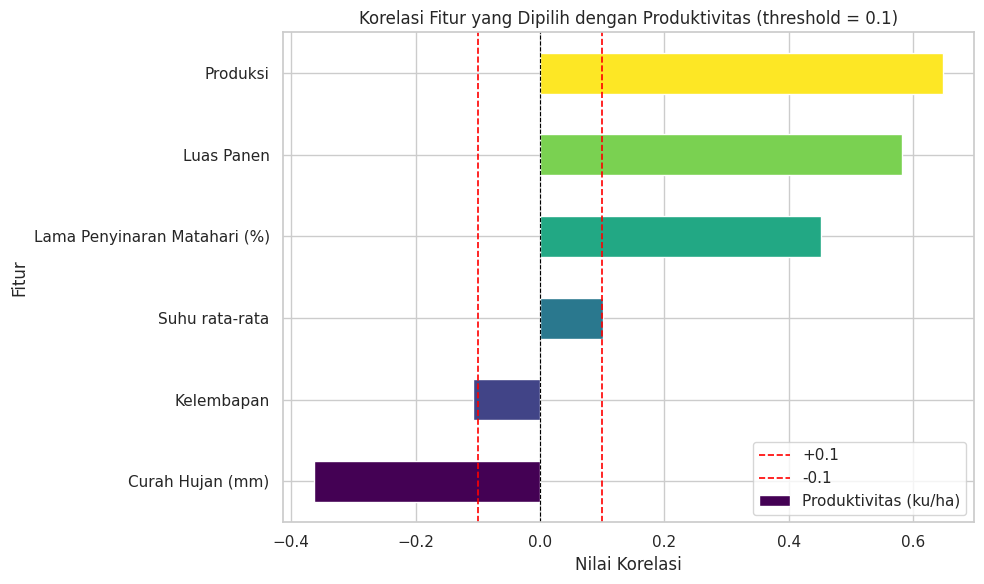

In [ ]:
print("Pemilihan Fitur Berdasarkan Korelasi dengan Produktivitas (ku/ha):")

# Re-define relevant_columns and calculate corr_target to ensure it's available
relevant_columns = ['Produktivitas (ku/ha)', 'Produksi', 'Luas Panen',
                    'Kelembapan', 'Suhu rata-rata',
                    'Curah Hujan (mm)', 'Lama Penyinaran Matahari (%)']

df_correlation = df_final[relevant_columns].corr()
corr_target = df_correlation['Produktivitas (ku/ha)'].sort_values(ascending=True)

# Filter out the target variable itself
features_correlation = corr_target.drop('Produktivitas (ku/ha)')

# Tentukan ambang batas korelasi absolut
correlation_threshold = 0.1  # Anda bisa menyesuaikan nilai ini

# Pilih fitur-fitur yang korelasi absolutnya di atas ambang batas
selected_features = features_correlation[abs(features_correlation) >= correlation_threshold]

print(f"Fitur-fitur yang dipilih dengan korelasi absolut >= {correlation_threshold} adalah:")
print(selected_features)

# Visualisasi fitur yang dipilih
plt.figure(figsize=(10, 6))
# Menyesuaikan jumlah warna agar sesuai dengan jumlah fitur yang dipilih
colors = plt.cm.viridis(np.linspace(0, 1, len(selected_features)))

selected_features.sort_values(ascending=True).plot(kind='barh', color=colors)

# Tambahkan garis batas untuk korelasi positif dan negatif
plt.axvline(x=correlation_threshold, color='red', linewidth=1.2, linestyle='--', label=f'+{correlation_threshold}')
plt.axvline(x=-correlation_threshold, color='red', linewidth=1.2, linestyle='--', label=f'-{correlation_threshold}')

plt.axvline(x=0, color='black', linewidth=0.8, linestyle='--')

plt.title(f'Korelasi Fitur yang Dipilih dengan Produktivitas (threshold = {correlation_threshold})')
plt.xlabel('Nilai Korelasi')
plt.ylabel('Fitur')
plt.legend()
plt.tight_layout()
plt.show()

## **🔥 Exploratory Data Analysis (Multivariate Correlation) and Visualization**

### **❓ Hipotesis 1**
"Sejauh mana signifikansi hubungan linier antara parameter **agroklimat** (curah hujan, suhu, kelembapan, penyinaran matahari) dengan kinerja **operasional pertanian** (luas panen), dan faktor manakah yang menjadi determinan paling kuat—baik secara positif maupun negatif?"

Kode ini memvisualisasikan **Peta Korelasi** (*Correlation Heatmap*) untuk mengungkap hubungan statistik antar variabel dalam dataset gabungan.



**Insight Utama:**
* **🎯 Feature Selection:** Fokus hanya pada variabel numerik kunci (*Iklim, Luas Panen, Produksi*) untuk menghindari *noise* dari data kategorikal.
* **🧮 Pearson Correlation:** Menghitung koefisien korelasi ($r$) mulai dari **-1** (hubungan negatif sempurna) hingga **+1** (hubungan positif sempurna).
* **🔍 Visual Diagnosis:** Membantu Anda menjawab pertanyaan kritis dengan cepat: *"Apakah curah hujan tinggi benar-benar menurunkan produktivitas?"* atau *"Seberapa kuat pengaruh luas lahan terhadap total produksi?"*.

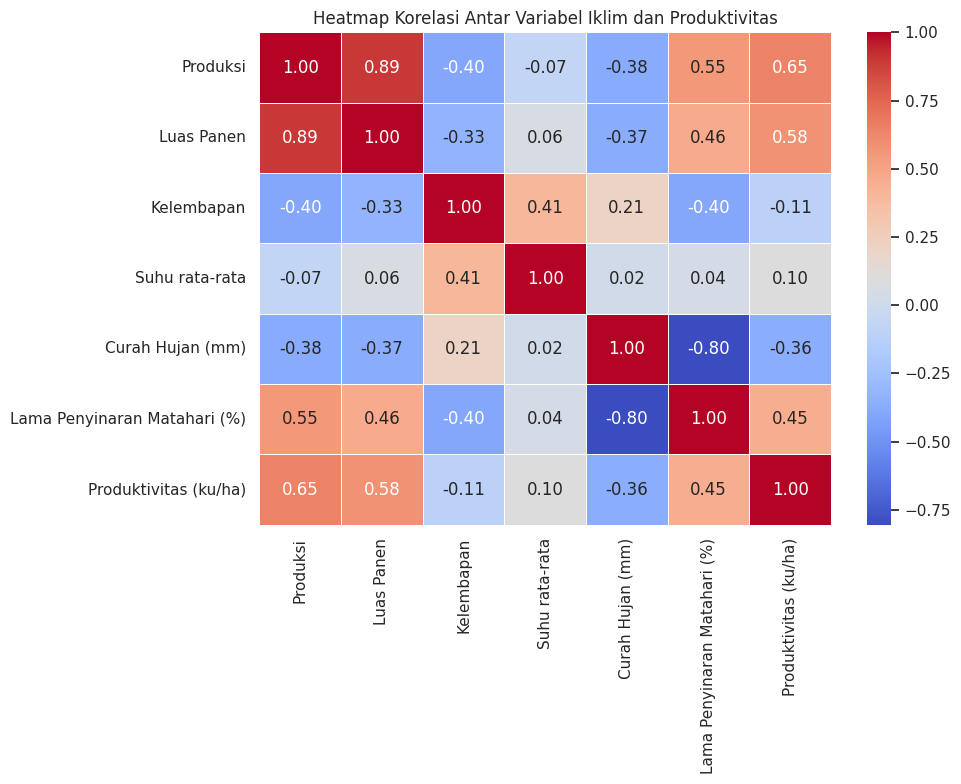

In [ ]:
df_corr = df_final[[ 'Produksi', 'Luas Panen', 'Kelembapan', 'Suhu rata-rata', 'Curah Hujan (mm)', 'Lama Penyinaran Matahari (%)', 'Produktivitas (ku/ha)']].copy()
correlation_matrix = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi Antar Variabel Iklim dan Produktivitas')
plt.tight_layout()
plt.show()

## Penjelasan Visualisasi Heatmap
Visualisasi ini digunakan untuk menganalisis hubungan statistik (korelasi) antar berbagai variabel dalam dataset, yang dalam kasus ini tampaknya berkaitan dengan pertanian padi/tanaman pangan (karena ada variabel iklim dan produktivitas).

Berikut adalah penjelasan rinci mengenai cara membaca dan temuan penting dari visualisasi tersebut:
### 1. Cara Membaca Heatmap

Angka dalam Kotak: Menunjukkan koefisien korelasi Pearson (r) yang berkisar antara -1 hingga 1.

        Mendekati 1 (Merah Gelap): Korelasi positif yang kuat. Artinya, jika satu variabel naik, variabel lainnya juga ikut naik.

        Mendekati -1 (Biru Gelap): Korelasi negatif yang kuat. Artinya, jika satu variabel naik, variabel lainnya justru turun.

        Mendekati 0 (Abu-abu/Pucat): Korelasi sangat lemah atau tidak ada hubungan linier yang signifikan.

Warna:

        Merah: Hubungan searah (Positif).

        Biru: Hubungan berlawanan arah (Negatif).

### 2. Analisis Hubungan Antar Variabel

Berikut adalah insight atau wawasan utama yang bisa diambil dari data tersebut:
A. Hubungan Produksi dan Luas Lahan (Sangat Kuat)

Produksi vs. Luas Panen (0.89): Ini adalah korelasi positif terkuat dalam chart. Sangat logis secara agrikultur: semakin luas lahan yang dipanen, semakin tinggi total produksi yang dihasilkan.

#### B. Hubungan Iklim dengan Produktivitas & Produksi

Lama Penyinaran Matahari vs. Produktivitas (0.45) & Produksi (0.55): Terdapat korelasi positif moderat. Ini mengindikasikan bahwa semakin banyak sinar matahari, tanaman cenderung lebih produktif.

Curah Hujan vs. Produktivitas (−0.36) & Produksi (−0.38): Terdapat korelasi negatif. Artinya, curah hujan yang terlalu tinggi justru cenderung sedikit menurunkan produktivitas atau produksi (mungkin karena banjir, hama yang menyukai kelembapan, atau kurangnya fotosintesis).

Kelembapan vs. Produksi (−0.40): Korelasi negatif moderat. Kelembapan tinggi berasosiasi dengan penurunan produksi.

Suhu Rata-rata: Hampir tidak memiliki korelasi signifikan dengan Produksi (−0.07) maupun Produktivitas (0.10). Artinya, variasi suhu dalam data ini tidak menjadi faktor penentu utama naik-turunnya hasil panen.

#### C. Hubungan Antar Variabel Iklim (Inter-Climate)

Curah Hujan vs. Lama Penyinaran Matahari (−0.80): Korelasi negatif yang sangat kuat. Ini sangat masuk akal secara meteorologi; jika curah hujan tinggi (banyak mendung/hujan), durasi penyinaran matahari pasti berkurang drastis.
### 3. Kesimpulan Data
Berdasarkan visualisasi ini, faktor pendorong utama keberhasilan panen (dalam dataset ini) adalah:

1. Ekstensifikasi: Menambah Luas Panen adalah cara paling pasti menaikkan total Produksi.

2. Cuaca: Tanaman di dataset ini tampaknya lebih menyukai kondisi yang banyak sinar matahari dan tidak terlalu basah (curah hujan/kelembapan tidak berlebihan).


---



### **❓ Hipotesis 2**

"Apakah pola hubungan antara dinamika **hidrologis** (intensitas curah hujan) dan kondisi **mikroklimat** (kelembapan udara) terhadap capaian **Produktivitas Padi** bersifat seragam di seluruh wilayah Sumatra, ataukah terdapat variabilitas spasial yang signifikan antar-provinsi yang menuntut pendekatan adaptasi iklim yang terlokalisasi?"

Kode ini melakukan analisis korelasi granular tingkat provinsi (*Spatial Correlation Analysis*) untuk mengurai hubungan spesifik antara variabel iklim basah dengan hasil panen di setiap wilayah administratif.

**Insight Utama:**

* 📍 **Spatial Granularity:** Memecah analisis agregat menjadi per-provinsi untuk mendeteksi anomali lokal (contoh: hujan mungkin berkorelasi positif di satu provinsi namun negatif di provinsi lain akibat perbedaan drainase atau topografi).
* 🌧️ **Hydrometeorological Focus:** Secara spesifik mengisolasi dampak faktor "basah" (Curah Hujan & Kelembapan) yang sering menjadi pemicu utama fluktuasi panen akibat risiko banjir atau serangan hama/penyakit.
* 🛡️ **Statistical Robustness:** Menerapkan mekanisme validasi data (`nunique > 1`) untuk memastikan perhitungan korelasi hanya dilakukan pada provinsi dengan variasi data yang cukup, menghindari bias matematis pada data yang stagnan.




In [ ]:
print("Korelasi Produktivitas dengan Variabel Iklim per Provinsi:")

for provinsi, group_df in df_final.groupby('Provinsi'):
    print(f"\nProvinsi: {provinsi}")

    # Korelasi Produktivitas (ku/ha) dan Curah Hujan (mm)
    if len(group_df) > 1 and group_df['Produktivitas (ku/ha)'].nunique() > 1 and group_df['Curah Hujan (mm)'].nunique() > 1:
        corr_curah_hujan = group_df['Produktivitas (ku/ha)'].corr(group_df['Curah Hujan (mm)'])
        print(f"  Korelasi Produktivitas dengan Curah Hujan (mm): {corr_curah_hujan:.2f}")
    else:
        print("  Tidak cukup data untuk menghitung korelasi Produktivitas dengan Curah Hujan (mm).")

    # Korelasi Produktivitas (ku/ha) dan Kelembapan
    if len(group_df) > 1 and group_df['Produktivitas (ku/ha)'].nunique() > 1 and group_df['Kelembapan'].nunique() > 1:
        corr_kelembapan = group_df['Produktivitas (ku/ha)'].corr(group_df['Kelembapan'])
        print(f"  Korelasi Produktivitas dengan Kelembapan: {corr_kelembapan:.2f}")
    else:
        print("  Tidak cukup data untuk menghitung korelasi Produktivitas dengan Kelembapan.")

Korelasi Produktivitas dengan Variabel Iklim per Provinsi:

Provinsi: Aceh
  Korelasi Produktivitas dengan Curah Hujan (mm): -0.49
  Korelasi Produktivitas dengan Kelembapan: 0.26

Provinsi: Bengkulu
  Korelasi Produktivitas dengan Curah Hujan (mm): 0.91
  Korelasi Produktivitas dengan Kelembapan: -0.02

Provinsi: Jambi
  Korelasi Produktivitas dengan Curah Hujan (mm): 0.61
  Korelasi Produktivitas dengan Kelembapan: 0.31

Provinsi: Lampung
  Korelasi Produktivitas dengan Curah Hujan (mm): 0.97
  Korelasi Produktivitas dengan Kelembapan: -0.23

Provinsi: Riau
  Korelasi Produktivitas dengan Curah Hujan (mm): 0.80
  Korelasi Produktivitas dengan Kelembapan: 0.40

Provinsi: Sumatera Barat
  Korelasi Produktivitas dengan Curah Hujan (mm): 0.20
  Korelasi Produktivitas dengan Kelembapan: -0.48

Provinsi: Sumatera Selatan
  Korelasi Produktivitas dengan Curah Hujan (mm): 0.89
  Korelasi Produktivitas dengan Kelembapan: -0.59

Provinsi: Sumatera Utara
  Korelasi Produktivitas dengan Curah Hu

Memvisualisasikan pola persebaran hubungan antara intensitas curah hujan dan capaian produktivitas secara terpisah untuk setiap provinsi menggunakan *multi-plot grid* guna mendeteksi tren lokal yang spesifik.

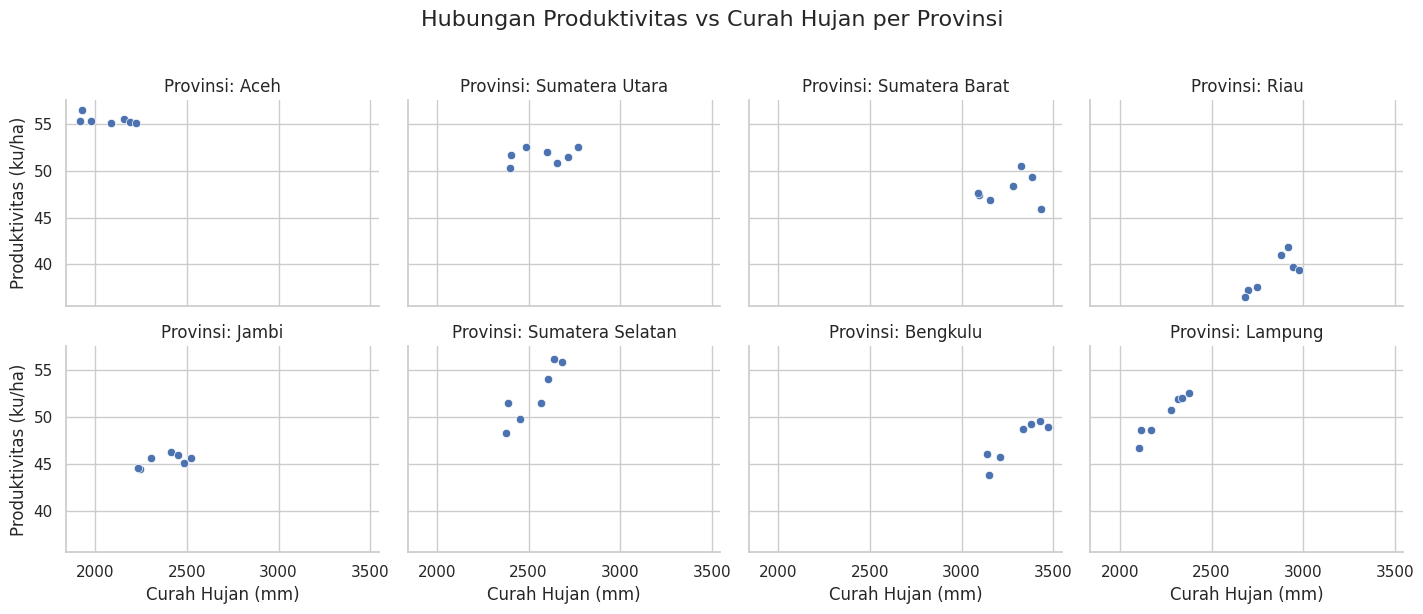

In [ ]:
g1 = sns.FacetGrid(df_final, col='Provinsi', col_wrap=4, height=3, aspect=1.2)
g1.map(sns.scatterplot, 'Curah Hujan (mm)', 'Produktivitas (ku/ha)')
g1.set_axis_labels('Curah Hujan (mm)', 'Produktivitas (ku/ha)')
g1.set_titles('Provinsi: {col_name}')
g1.fig.suptitle('Hubungan Produktivitas vs Curah Hujan per Provinsi', y=1.02, fontsize=16)
g1.tight_layout()
plt.show()

## Penjelasan Visualisasi
Visualisasi ini adalah **Scatter Plot Facet Grid** yang memecah hubungan antara **Curah Hujan (X)** dan **Produktivitas (Y)** secara spesifik untuk setiap provinsi.

Ini adalah temuan yang **sangat menarik** dan krusial karena mengungkapkan nuansa yang "tersembunyi" pada Heatmap sebelumnya. Berikut adalah analisis mendalamnya:

### 1. Fenomena "Simpson's Paradox" (Paradoks Statistik)

Jika Anda ingat pada heatmap sebelumnya, korelasi antara Curah Hujan dan Produktivitas adalah **Negatif (-0.36)**. Artinya, secara umum di Sumatera, makin banyak hujan dianggap makin rendah produktivitasnya.

Namun, grafik ini membantah kesimpulan "pukul rata" tersebut:

* Lihat **Lampung**, **Sumatera Selatan**, **Bengkulu**, dan **Riau**. Garis tren titik-titiknya justru **naik ke kanan**. Artinya, di provinsi-provinsi ini, curah hujan yang lebih tinggi justru **meningkatkan** produktivitas.
* Kenapa heatmap global menunjukkan negatif? Karena provinsi dengan curah hujan sangat tinggi (seperti Bengkulu & Sumbar di angka 3000+ mm) memiliki rata-rata produktivitas yang lebih rendah (di bawah 50 ku/ha) dibandingkan provinsi dengan curah hujan rendah (seperti Aceh di 2000-an mm, tapi produktivitas tinggi 55+ ku/ha).

### 2. Analisis Per Provinsi

* **Aceh (Si "Outlier" Positif):**
* Provinsi ini memiliki produktivitas tertinggi (konsisten di atas 55 ku/ha) meskipun curah hujannya tergolong rendah (< 2500 mm).
* Ini menunjukkan efisiensi pertanian di Aceh sangat baik dan mungkin tidak terlalu bergantung pada hujan (mungkin sistem irigasinya sudah sangat teknis).


* **Sumatera Selatan & Lampung (Pola Linier Kuat):**
* Terlihat pola garis lurus yang jelas. Semakin tinggi curah hujan, hasil panen semakin baik.
* Bagi model prediksi Anda nanti, data di provinsi ini akan sangat mudah diprediksi karena polanya "bersih" dan linier.


* **Riau (Sensitif tapi Rendah):**
* Produktivitasnya paling rendah dibanding yang lain (di bawah 45 ku/ha).
* Namun, responnya terhadap hujan sangat curam/sensitif. Sedikit kenaikan hujan berdampak besar pada kenaikan produktivitas.


* **Sumatera Barat & Bengkulu (Curah Hujan Ekstrem):**
* Mereka berada di spektrum curah hujan paling tinggi (> 3000 mm).
* Produktivitasnya moderat (tidak setinggi Aceh/Sumsel). Ini mungkin mengonfirmasi bahwa "terlalu banyak air" (banjir/lembab) mulai menghambat produktivitas optimal di titik tertentu.



### 3. Implikasi untuk Skripsi/Proyek Data Science Anda

Temuan ini memberikan justifikasi kuat mengapa Anda perlu melakukan **Clustering** atau membuat model terpisah (Local Regression):

1. **Satu Model Tidak Cukup:** Jika Anda membuat satu model regresi linier untuk seluruh Sumatera, hasilnya akan *bias*. Model akan mengira hujan itu buruk (karena Aceh vs Bengkulu), padahal untuk petani di Lampung, hujan itu baik.
2. **Feature Engineering:** Anda wajib memasukkan "Provinsi" sebagai fitur kategori, atau menggunakan algoritma berbasis *tree* (seperti Random Forest/XGBoost) yang bisa menangani interaksi non-linier antar variabel ini secara otomatis.


Membuat matriks *scatterplot* untuk menginvestigasi korelasi antara tingkat kelembapan udara dan hasil produktivitas di setiap provinsi secara terisolasi guna mengidentifikasi sensitivitas iklim regional.

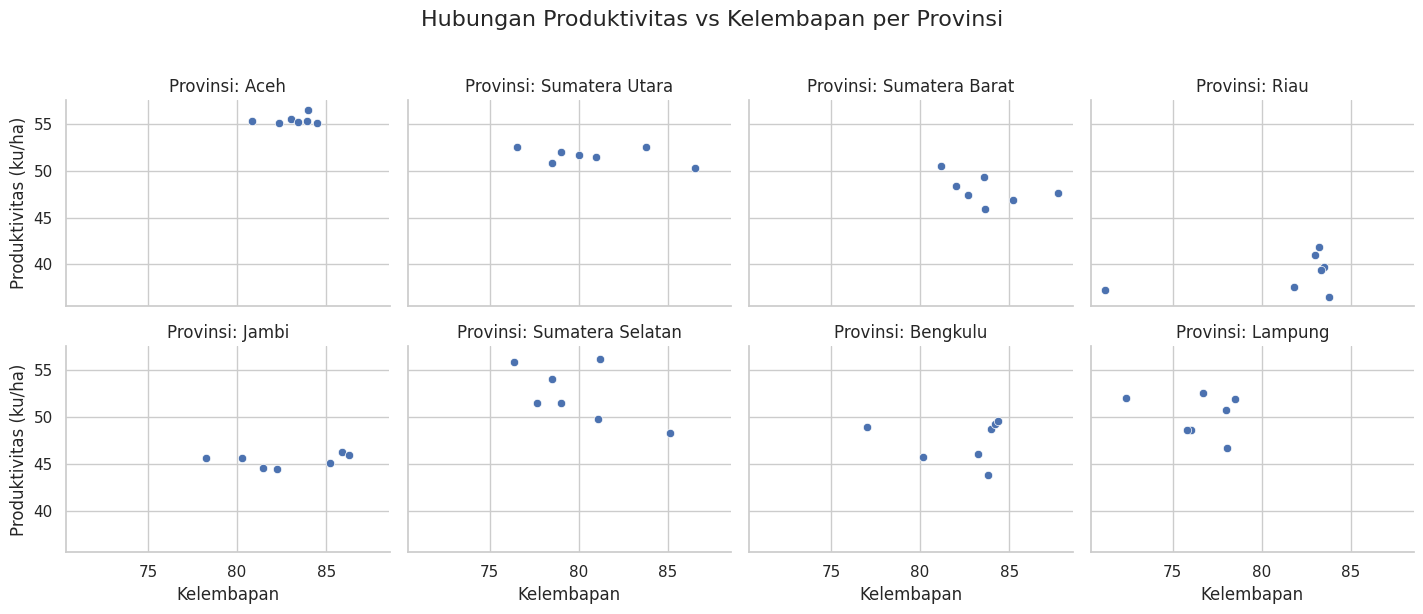

In [ ]:
g2 = sns.FacetGrid(df_final, col='Provinsi', col_wrap=4, height=3, aspect=1.2)
g2.map(sns.scatterplot, 'Kelembapan', 'Produktivitas (ku/ha)')
g2.set_axis_labels('Kelembapan', 'Produktivitas (ku/ha)')
g2.set_titles('Provinsi: {col_name}')
g2.fig.suptitle('Hubungan Produktivitas vs Kelembapan per Provinsi', y=1.02, fontsize=16)
g2.tight_layout()
plt.show()

## Penjelasan Visualisasi

### **1. Identifikasi Umum**

Gambar ini merupakan visualisasi data menggunakan jenis **Scatter Plot (Diagram Tebar)** yang disusun dalam bentuk *Facet Grid* (grid terpisah). Tujuannya adalah untuk membandingkan hubungan antara dua variabel secara spesifik untuk setiap provinsi yang berbeda di Pulau Sumatera.

### **2. Variabel yang Dianalisis**

* **Sumbu X (Horizontal - Kelembapan):** Menunjukkan tingkat kelembapan udara. Rentang angka pada sumbu ini berkisar antara 70 hingga 90 (kemungkinan dalam persen/RH, meskipun satuannya tidak ditulis eksplisit).
* **Sumbu Y (Vertikal - Produktivitas):** Menunjukkan produktivitas hasil panen (padi) dalam satuan **ku/ha** (kuintal per hektare). Rentang angkanya berkisar dari sekitar 35 hingga 58 ku/ha.
* **Judul Panel (Header):** Setiap kotak grafik mewakili satu provinsi (Aceh, Sumatera Utara, Sumatera Barat, Riau, Jambi, Sumatera Selatan, Bengkulu, dan Lampung).

### **3. Interpretasi Data per Provinsi**

Grafik ini memungkinkan kita melihat pola distribusi produktivitas berdasarkan kelembapan di masing-masing wilayah:

* **Provinsi Aceh:**
* Memiliki produktivitas yang sangat tinggi dan konsisten (mayoritas titik berada di atas angka 55 ku/ha).
* Kelembapan berkisar di angka 80-85.


* **Provinsi Sumatera Utara & Sumatera Barat:**
* Produktivitas cukup tinggi (rata-rata di atas 45-50 ku/ha).
* Sebaran datanya agak melebar, menunjukkan variasi produktivitas pada rentang kelembapan tertentu.


* **Provinsi Riau:**
* Terlihat memiliki produktivitas yang cenderung lebih rendah dibandingkan provinsi lain (banyak titik di bawah 40-45 ku/ha).
* Kelembapan terkonsentrasi di area angka 83-84.


* **Provinsi Jambi & Bengkulu:**
* Produktivitasnya berada di tingkat menengah hingga rendah (sekitar 45 ku/ha).
* Pola datanya cenderung datar, yang mungkin mengindikasikan bahwa perubahan kelembapan (dalam rentang data tersebut) tidak memberikan fluktuasi produktivitas yang ekstrem.


* **Provinsi Sumatera Selatan & Lampung:**
* Memiliki sebaran data (variansi) yang lebih luas. Ada titik produktivitas yang tinggi dan ada yang rendah dalam rentang kelembapan yang bervariasi.



### **4. Kesimpulan Visual**

Secara keseluruhan, grafik ini ingin menjawab pertanyaan: **"Apakah kelembapan memengaruhi produktivitas padi, dan apakah pola tersebut sama di setiap provinsi?"**

* Terlihat bahwa setiap provinsi memiliki karakteristik "klaster" data tersendiri.
* **Aceh** tampak paling unggul dalam produktivitas pada rentang kelembapan tersebut.
* **Riau** tampak memiliki produktivitas paling rendah dalam sampel data ini.
* Tidak terlihat adanya garis linear tunggal yang tegas (misal: semakin lembap pasti semakin produktif), melainkan data cenderung mengelompok (clustering) berdasarkan karakteristik provinsi masing-masing.

---

### **❓ Hipotesis 3**

"Bagaimana signifikansi dan arah pengaruh simultan dari variabel **agroklimat** (curah hujan, suhu, kelembapan, penyinaran matahari) beserta variabel **operasional** (produksi, luas panen) terhadap tingkat **Produktivitas Tanaman Pangan (ku/ha)** di wilayah Sumatra dalam kerangka pemodelan prediktif?"

Kode ini menginisialisasi tahap **Pemodelan Prediktif** (*Supervised Learning*) menggunakan algoritma Regresi Linear untuk menguantifikasi hubungan sebab-akibat antar variabel.

**Insight Utama:**

* ⚙️ **Data Partitioning (80:20):** Membagi dataset menjadi *Training Set* (80%) untuk melatih model mengenali pola, dan *Testing Set* (20%) untuk mengevaluasi kinerja model pada data asing (unseen data), guna mencegah *overfitting*.
* 📐 **Coefficient Interpretation:** Fokus utama tahap ini adalah mengekstrak nilai koefisien ($\beta$) dari model (`model.coef_`).
    * **Positif (+):** Variabel meningkatkan produktivitas.
    * **Negatif (-):** Variabel menurunkan produktivitas.
* 🤖 **Multivariate Analysis:** Berbeda dengan korelasi sederhana, metode ini melihat pengaruh satu variabel (misal: suhu) dengan *menganggap variabel lain konstan* (*ceteris paribus*), memberikan gambaran isolasi pengaruh yang lebih akurat.

In [ ]:
# 1. Define the feature matrix X
X = df_final[['Produksi', 'Luas Panen', 'Curah Hujan (mm)', 'Lama Penyinaran Matahari (%)',
              'Kelembapan', 'Suhu rata-rata']]

# 2. Define the target vector y
y = df_final['Produktivitas (ku/ha)']

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preparation complete. Shapes of the resulting sets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# 4. Train model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Melihat pengaruh variabel
coefficients = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': model.coef_
})

print(coefficients)


Data preparation complete. Shapes of the resulting sets:
X_train shape: (44, 6)
X_test shape: (12, 6)
y_train shape: (44,)
y_test shape: (12,)
                       Variable   Coefficient
0                      Produksi  3.405602e-06
1                    Luas Panen  6.675990e-07
2              Curah Hujan (mm) -3.781428e-04
3  Lama Penyinaran Matahari (%)  6.622731e-02
4                    Kelembapan  2.523975e-01
5                Suhu rata-rata  2.365108e-01


Grafik batang horizontal untuk memeringkat variabel prediktor berdasarkan kekuatan dan arah pengaruhnya (positif/negatif) terhadap produktivitas, di mana panjang batang merepresentasikan besaran dampak perubahan satu unit variabel terhadap output.

/tmp/ipython-input-71765248.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Variable', data=coefficients_sorted, palette='viridis')


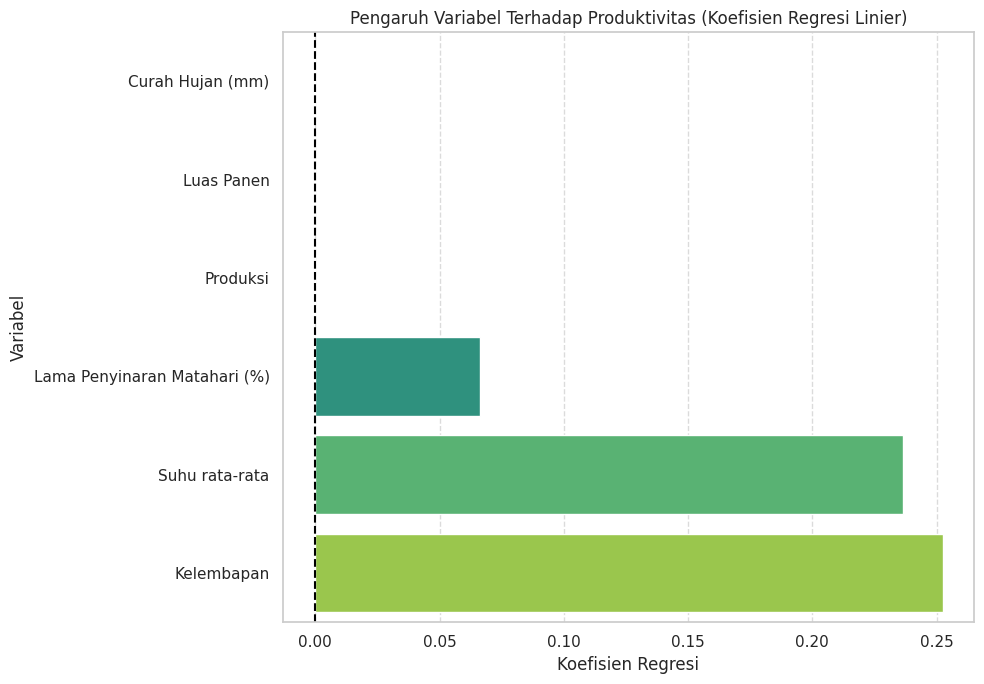

In [ ]:
# Urutkan koefisien untuk visualisasi yang lebih baik
coefficients_sorted = coefficients.sort_values(by='Coefficient', ascending=True)

plt.figure(figsize=(10, 7))
sns.barplot(x='Coefficient', y='Variable', data=coefficients_sorted, palette='viridis')
plt.title('Pengaruh Variabel Terhadap Produktivitas (Koefisien Regresi Linier)')
plt.xlabel('Koefisien Regresi')
plt.ylabel('Variabel')
plt.axvline(x=0, color='black', linestyle='--')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Penjelasan Visualisasi
Berikut adalah penjelasan untuk grafik batang horizontal (**Bar Chart**) yang Anda unggah:

### **1. Identifikasi & Tujuan Grafik**

Grafik ini memvisualisasikan **Koefisien Regresi Linier**. Tujuannya adalah untuk membandingkan seberapa besar pengaruh setiap variabel independen (faktor penyebab) terhadap variabel dependen (Produktivitas).

* **Sumbu Y (Variabel):** Daftar faktor yang diuji (Curah hujan, Luas Panen, Produksi, Penyinaran Matahari, Suhu, Kelembapan).
* **Sumbu X (Koefisien Regresi):** Nilai yang menunjukkan besaran pengaruh. Semakin panjang batang ke kanan, semakin besar pengaruh positifnya terhadap produktivitas.

### **2. Interpretasi Hasil Analisis**

Berdasarkan panjang batang pada grafik, kita dapat menarik kesimpulan berikut:

**A. Faktor Paling Berpengaruh (Dominan)**

* **Kelembapan:** Memiliki batang paling panjang (nilai koefisien di atas **0.25**).
* *Artinya:* Dalam model ini, kelembapan adalah faktor yang memiliki pengaruh positif **paling kuat** terhadap produktivitas padi. Jika kelembapan naik, produktivitas cenderung naik secara signifikan dibandingkan variabel lain.


* **Suhu Rata-rata:** Faktor kedua yang paling berpengaruh (nilai koefisien sekitar **0.23 - 0.24**).
* *Artinya:* Suhu juga memiliki peran vital dan berbanding lurus dengan produktivitas.



**B. Faktor Berpengaruh Sedang**

* **Lama Penyinaran Matahari (%):** Memiliki pengaruh positif namun lebih kecil dibandingkan kelembapan dan suhu (nilai koefisien sekitar **0.06 - 0.07**).

**C. Faktor Tidak Berpengaruh Signifikan (Dalam Model Ini)**

* **Curah Hujan, Luas Panen, dan Produksi:** Tidak memiliki batang yang terlihat (nilai koefisien mendekati **0** atau sangat kecil).
* *Catatan Penting:* Ini menunjukkan bahwa dalam persamaan regresi linier yang dibuat, variabel-variabel ini dianggap tidak memberikan perubahan yang berarti terhadap angka produktivitas (ku/ha) secara langsung, atau mungkin variabel tersebut sudah terwakili oleh variabel lain (multikolinearitas).



### **3. Kesimpulan Statistik Sederhana**

Grafik ini memberitahu kita bahwa **Faktor Iklim (Kelembapan dan Suhu)** memegang kunci utama dalam menentukan tinggi rendahnya produktivitas padi di wilayah studi Anda, jauh lebih berpengaruh dibandingkan sekadar curah hujan atau durasi penyinaran matahari.


### **Analisis Gabungan (Hubungan dengan Gambar Sebelumnya)**

Jika dihubungkan dengan gambar *scatter plot* sebelumnya:

1. Di gambar sebelumnya, kita melihat **Aceh** (produktivitas tinggi) memiliki kelembapan di angka 80-85, dan **Riau** (produktivitas rendah) juga di angka 83-84.
2. Namun, regresi ini melihat data secara **keseluruhan (agregat)**. Meskipun ada anomali di provinsi tertentu, secara garis besar (matematis), komputer menemukan pola bahwa ketika kelembapan naik, produktivitas ikut naik.

---


### **❓ Hipotesis 4 (Temporal Trend & Model Precision)**

"Bagaimana sebaran data dan interaksi antar indikator **agroklimat** terhadap tren **produktivitas pertanian** di Sumatra, serta model manakah yang paling presisi dalam menangkap dinamika tersebut?"

Kode ini melakukan **Agregasi Temporal** (*Time-Series Preparation*) dengan merata-ratakan seluruh variabel numerik berdasarkan tahun.

**Insight Utama:**

* ⏳ **Noise Reduction:** Dengan mengambil rata-rata tahunan (`groupby('Tahun').mean()`), analisis ini menghilangkan variabilitas spasial antar-provinsi untuk menonjolkan **sinyal tren waktu** (apakah produktivitas secara umum naik/turun dari 2018-2024).
* 📈 **Macro Trend Analysis:** Dataset baru `df_trend_agregat` ini akan menjadi landasan untuk melihat korelasi jangka panjang antara perubahan iklim global (seperti kenaikan suhu rata-rata tahunan) dengan output pertanian nasional di Sumatra.

In [ ]:
df_trend_agregat = df_final.groupby('Tahun').mean(numeric_only=True).reset_index()
print("Aggregated DataFrame (df_trend_agregat) head:")
print(df_trend_agregat.head())

Aggregated DataFrame (df_trend_agregat) head:
   Tahun      Produksi    Luas Panen  Kelembapan  Suhu rata-rata  \
0   2018  1.470553e+06  295975.06375    79.70500       26.320000   
1   2019  1.360137e+06  279416.22875    83.72375       26.816250   
2   2020  1.453890e+06  289029.78125    80.86500       25.750937   
3   2021  1.348788e+06  264231.20125    81.65375       26.862500   
4   2022  1.400678e+06  269794.37500    81.67500       27.037500   

   Curah Hujan (mm)  Lama Penyinaran Matahari (%)  Produktivitas (ku/ha)  
0         2503.5500                        54.125               47.64375  
1         2493.0500                        53.125               46.90750  
2         2562.1250                        55.250               47.74500  
3         2680.1125                        56.250               49.19250  
4         2725.3500                        54.750               49.96750  


Menghasilkan visualisasi *multi-panel line chart* untuk melacak evolusi tahunan parameter agroklimat dan produktivitas secara simultan, guna mendeteksi pola tren jangka panjang dan anomali fluktuasi yang sinkron antar-variabel.

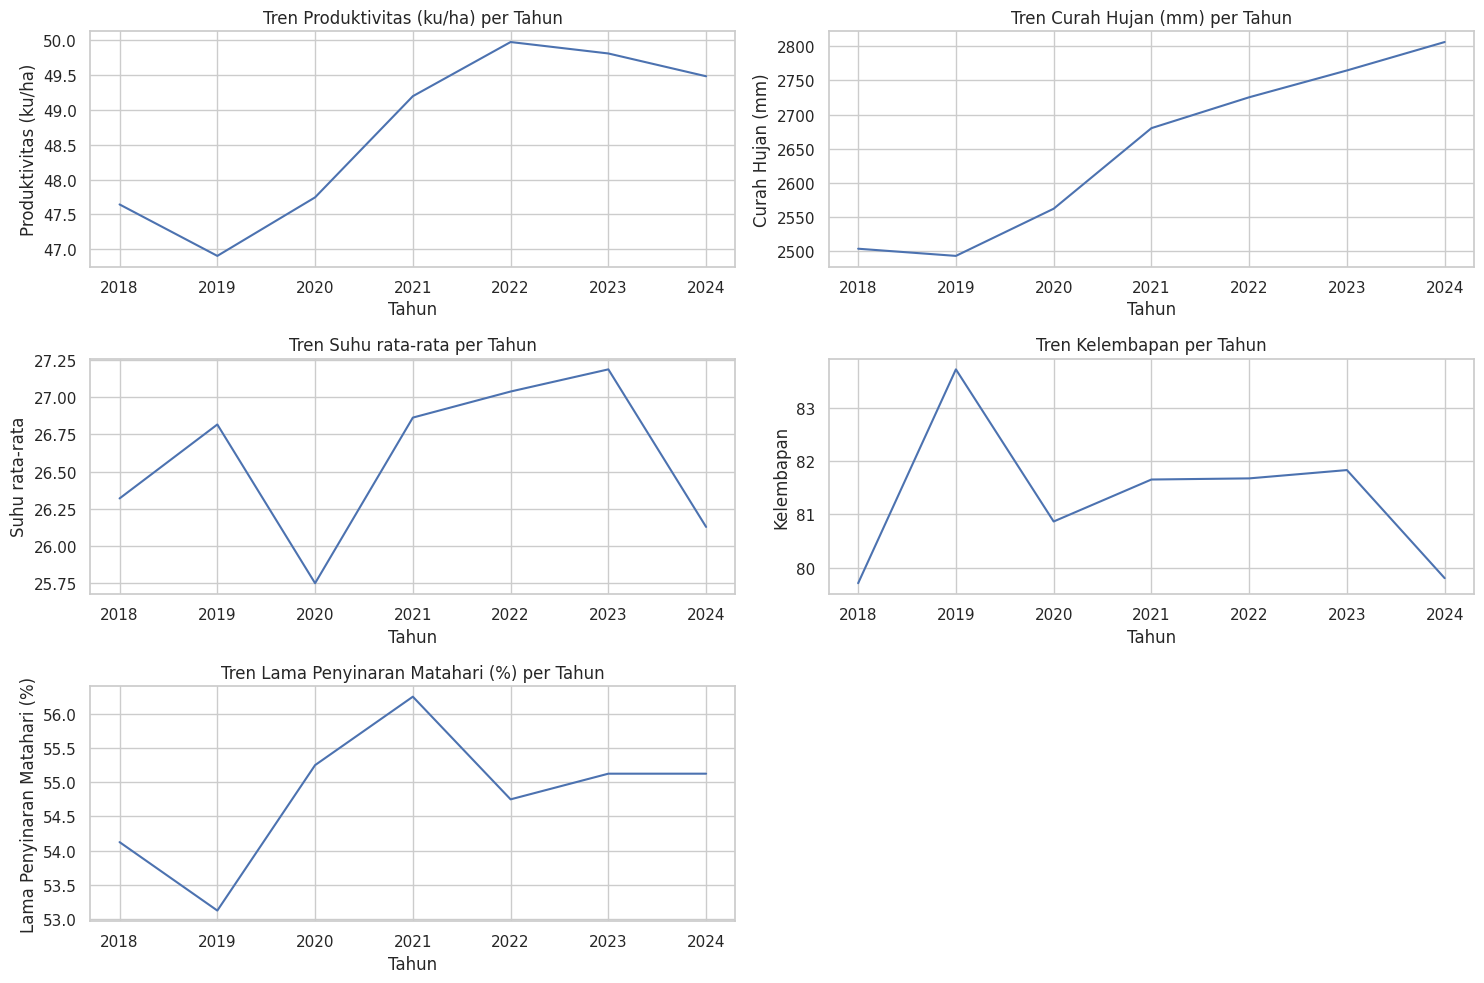

Line plots showing trends of agro-climatic indicators and productivity over time.


In [ ]:
relevant_cols_trend = [
    'Produktivitas (ku/ha)',
    'Curah Hujan (mm)',
    'Suhu rata-rata',
    'Kelembapan',
    'Lama Penyinaran Matahari (%)'
]

plt.figure(figsize=(15, 10))
for i, col in enumerate(relevant_cols_trend):
    plt.subplot(3, 2, i + 1) # Create 3 rows, 2 columns of subplots
    sns.lineplot(data=df_trend_agregat, x='Tahun', y=col)
    plt.title(f'Tren {col} per Tahun')
    plt.xlabel('Tahun')
    plt.ylabel(col)
    plt.grid(True)
plt.tight_layout()
plt.show()
print("Line plots showing trends of agro-climatic indicators and productivity over time.")

## Penjelasan Visualisasi

Grafik ini menggambarkan **perkembangan variabel iklim dan produktivitas dari tahun ke tahun (2018 - 2024)**. Analisis tren ini penting untuk melihat pola jangka panjang dan anomali.

---

### **1. Analisis Tren Produktivitas (Variabel Terikat)**

* **Pola Umum:** Terlihat adanya tren **kenaikan produktivitas** yang cukup konsisten dari tahun 2019 hingga mencapai puncaknya di tahun 2022 (mendekati 50 ku/ha).
* **Penurunan Terkini:** Setelah puncak di 2022, terjadi sedikit penurunan tren pada tahun 2023 dan 2024.
* **Kesimpulan:** Secara umum, performa pertanian membaik selama periode pengamatan, namun perlu diwaspadai faktor apa yang menyebabkan penurunan dalam dua tahun terakhir.

### **2. Analisis Tren Iklim (Variabel Bebas)**

* **Curah Hujan (Tren Naik Konsisten):**
* Ini adalah grafik yang paling mencolok. Sejak 2019, curah hujan terus mengalami **peningkatan linier yang tajam** setiap tahunnya hingga 2024 (mencapai >2800 mm).
* *Interpretasi:* Wilayah studi Anda semakin basah. Jika dikaitkan dengan produktivitas yang mulai turun di 2023-2024, mungkin ada indikasi bahwa curah hujan yang *terlalu tinggi* mulai berdampak negatif (banjir/genangan), meskipun di awal kenaikan curah hujan (2020-2022) justru meningkatkan produktivitas.


* **Suhu Rata-rata (Fluktuatif):**
* Sangat tidak stabil. Ada penurunan drastis di tahun 2020, lalu naik tajam hingga puncak di 2023, dan **anjlok kembali secara signifikan di 2024**.
* *Interpretasi:* Ketidakstabilan suhu ini bisa menjadi stresor bagi tanaman padi, yang mungkin berkontribusi pada penurunan produktivitas di tahun 2024.


* **Kelembapan (Pola Zig-zag):**
* Memiliki pola yang berlawanan dengan suhu di beberapa titik (misal: 2019 suhu tinggi, kelembapan rendah; namun polanya tidak selalu konsisten).
* Tahun 2024 menunjukkan penurunan kelembapan yang tajam, bersamaan dengan penurunan suhu.


* **Lama Penyinaran Matahari:**
* Sempat mencapai titik tertinggi di 2021, namun kemudian turun dan mendatar (stagnan) di tahun 2023-2024.



---

### **3. Sintesis (Hubungan Antar Grafik)**

Jika kita menyandingkan grafik Produktivitas dengan grafik Iklim, kita bisa melihat sebuah cerita data:

1. **Periode Emas (2020-2022):**
* Produktivitas naik pesat.
* Didukung oleh Curah Hujan yang naik bertahap, Suhu yang mulai menghangat (setelah drop 2020), dan Penyinaran Matahari yang tinggi. Ini adalah kombinasi ideal untuk fotosintesis padi.


2. **Periode Penurunan (2023-2024):**
* Produktivitas mulai turun.
* Kemungkinan penyebab: **Curah Hujan yang sudah terlalu ekstrem** (sangat tinggi) dikombinasikan dengan **anomali suhu** (jatuh drastis di 2024). Kondisi "basah dan dingin" (hujan tinggi, suhu rendah) seringkali mengundang hama atau penyakit jamur pada padi, yang bisa menurunkan hasil panen.



---


Menampilkan histogram yang dilengkapi kurva kepadatan (*Kernel Density Estimation*) untuk memetakan profil sebaran data setiap variabel, yang krusial guna mengidentifikasi tingkat normalitas dan kemiringan (*skewness*) sebelum dilakukan pemodelan statistik lebih lanjut.

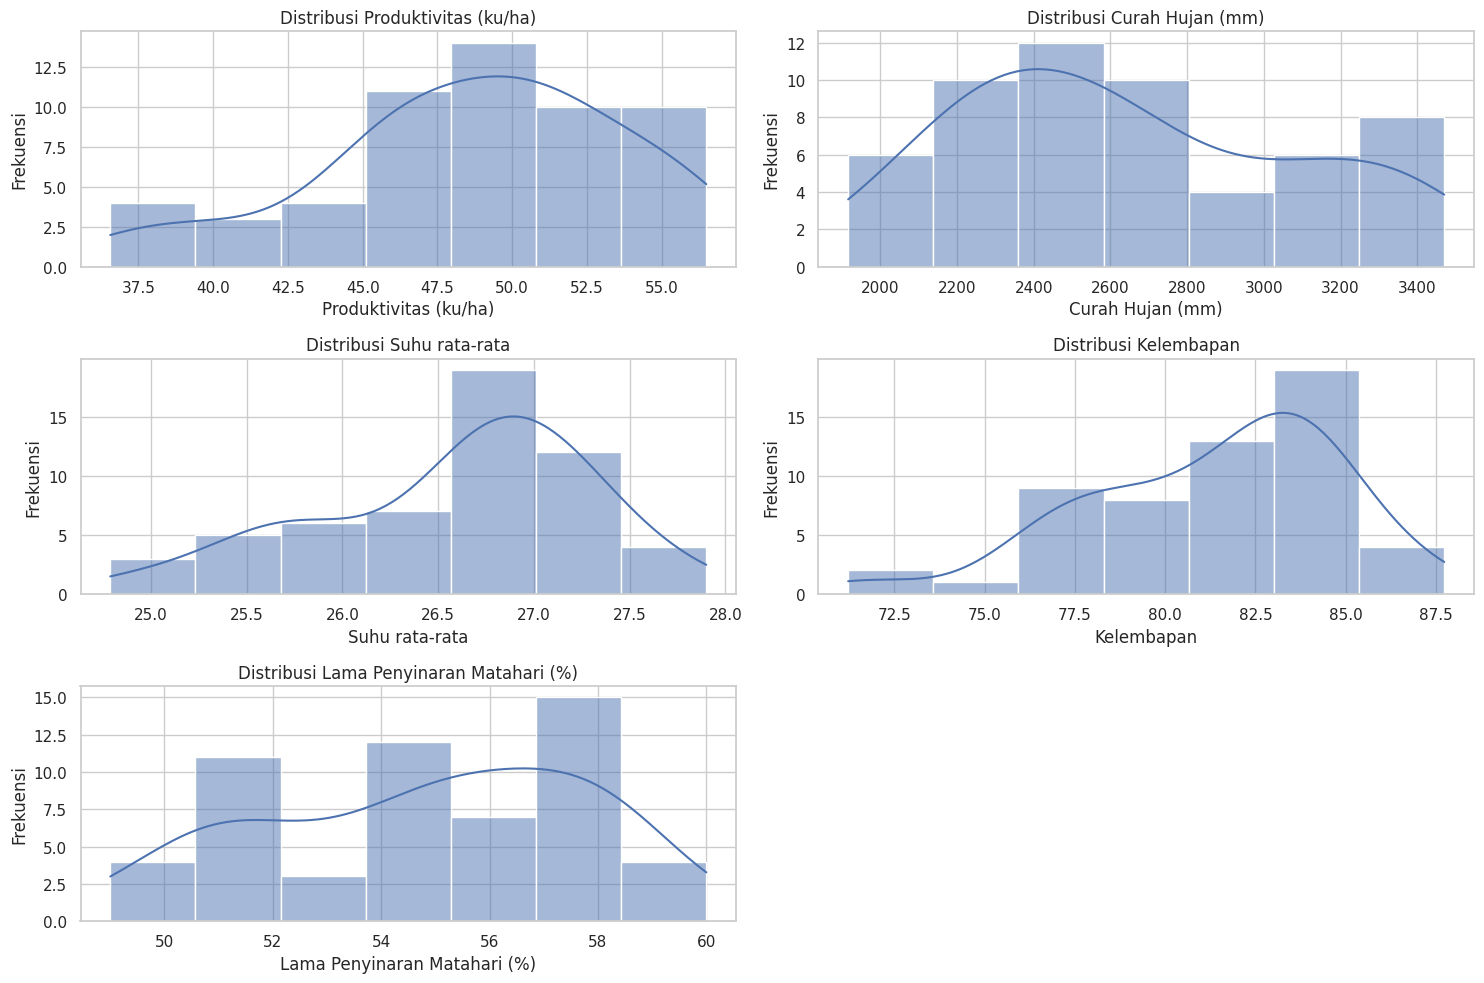

Histograms showing the distribution of agro-climatic indicators and productivity.


In [ ]:
relevant_cols_distribution = [
    'Produktivitas (ku/ha)',
    'Curah Hujan (mm)',
    'Suhu rata-rata',
    'Kelembapan',
    'Lama Penyinaran Matahari (%)'
]

plt.figure(figsize=(15, 10))
for i, col in enumerate(relevant_cols_distribution):
    plt.subplot(3, 2, i + 1) # Create 3 rows, 2 columns of subplots
    sns.histplot(data=df_final, x=col, kde=True) # Using histplot for distribution
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.grid(True)
plt.tight_layout()
plt.show()
print("Histograms showing the distribution of agro-climatic indicators and productivity.")

## Penjelasan Visualisasi

### **1. Identifikasi & Tujuan Grafik**

Grafik ini bertujuan untuk melihat **distribusi data** (sebaran nilai) dari setiap variabel. Dengan melihat grafik ini, kita bisa mengetahui apakah data terkonsentrasi di nilai tertentu, apakah datanya menyebar rata, atau apakah ada nilai ekstrem (outlier).

Garis melengkung di atas batang histogram adalah **KDE (Kernel Density Estimation)**, yang membantu memperhalus bentuk distribusi agar pola datanya lebih mudah dilihat.

### **2. Interpretasi Per Variabel**

**a. Distribusi Produktivitas (ku/ha)**

* **Pola:** Cenderung **"Skewed Left" (Menjulur ke Kiri)**.
* **Artinya:** Sebagian besar data produktivitas berkumpul di angka yang tinggi (sekitar 47 - 52 ku/ha). Frekuensi kejadian produktivitas rendah (di bawah 40 ku/ha) jumlahnya lebih sedikit. Ini indikasi yang baik bahwa mayoritas wilayah/waktu panen menghasilkan *output* yang tinggi.

**b. Distribusi Curah Hujan (mm)**

* **Pola:** Terlihat **"Bimodal" (Memiliki dua puncak)**.
* **Artinya:** Ada dua kelompok data dominan. Kelompok pertama di kisaran curah hujan 2400-2600 mm, dan kelompok kedua (lebih kecil) di kisaran 3200-3400 mm. Ini mungkin mencerminkan perbedaan karakteristik antar provinsi (ada provinsi yang curah hujannya sedang, ada yang sangat tinggi) atau perbedaan kondisi tahunan (tahun basah vs tahun sangat basah).

**c. Distribusi Suhu Rata-rata**

* **Pola:** **"Skewed Left" (Menjulur ke Kiri)**.
* **Artinya:** Mayoritas data suhu berkumpul di angka tinggi (26.5°C - 27.5°C). Sangat sedikit data yang menunjukkan suhu rata-rata rendah (< 25.5°C). Ini konsisten dengan iklim tropis Sumatera.

**d. Distribusi Kelembapan**

* **Pola:** **"Skewed Left" (Menjulur ke Kiri)**.
* **Artinya:** Puncak grafik berada di sebelah kanan (sekitar angka 82-84). Ini menunjukkan bahwa kondisi udara di wilayah studi didominasi oleh kelembapan tinggi. Jarang sekali terjadi kondisi kering (kelembapan < 75).

**e. Distribusi Lama Penyinaran Matahari (%)**

* **Pola:** Cenderung **Multimodal (Banyak puncak) atau agak datar**.
* **Artinya:** Variabel ini memiliki variasi yang cukup beragam. Tidak ada satu nilai pusat yang sangat dominan seperti pada variabel suhu atau kelembapan. Data tersebar cukup merata dari 50% hingga 60%.

### **3. Kesimpulan & Implikasi untuk Analisis Data**

1. **Asumsi Normalitas:**
Jika Anda menggunakan metode statistik parametrik (seperti Regresi Linier OLS), idealnya data berbentuk lonceng sempurna (*Bell Curve* / Normal).
* Grafik **Produktivitas** dan **Curah Hujan** bentuknya cukup mendekati lonceng meskipun tidak sempurna.
* Grafik **Suhu** dan **Kelembapan** agak miring (tidak normal sempurna), yang wajar untuk data iklim tropis (karena suhunya mentok tidak bisa terlalu dingin, dan kelembapan mentok tidak bisa >100%).


2. **Kaitannya dengan Klasifikasi (Project Anda):**
Mengingat Anda sedang mengerjakan proyek "Klasifikasi Kategori Hasil Panen", histogram **Produktivitas** (kiri atas) adalah yang paling penting.
* Anda bisa melihat bahwa "gunung" data ada di angka 48-50.
* Jika Anda membagi kategori menjadi 3 (Rendah, Sedang, Tinggi), Anda harus hati-hati menentukan ambang batasnya (*threshold*) agar kelasnya seimbang, karena datanya menumpuk di nilai tinggi.



---

Mengisolasi subset data khusus yang hanya memuat variabel prediktor hasil seleksi korelasi dan target 'Produktivitas' guna memfokuskan analisis interaksi multivariat selanjutnya hanya pada parameter yang paling relevan.

In [ ]:
selected_features_list = selected_features.index.tolist()
selected_features_list.append('Produktivitas (ku/ha)')

df_pairplot = df_final[selected_features_list].copy()

print("First 5 rows of df_pairplot:")
print(df_pairplot.head())

First 5 rows of df_pairplot:
   Curah Hujan (mm)  Kelembapan  Suhu rata-rata  Lama Penyinaran Matahari (%)  \
0            1928.5       83.98           26.48                            56   
1            1916.7       83.90           26.65                            55   
2            1974.5       80.82           25.41                            58   
3            2085.8       82.33           27.70                            59   
4            2154.6       83.00           26.90                            57   

   Luas Panen    Produksi  Produktivitas (ku/ha)  
0   329515.78  1751996.94                  56.49  
1   310012.46  1714437.60                  55.30  
2   317869.41  1861567.10                  55.28  
3   297058.38  1634639.60                  55.03  
4   271750.00  1513793.00                  55.55  


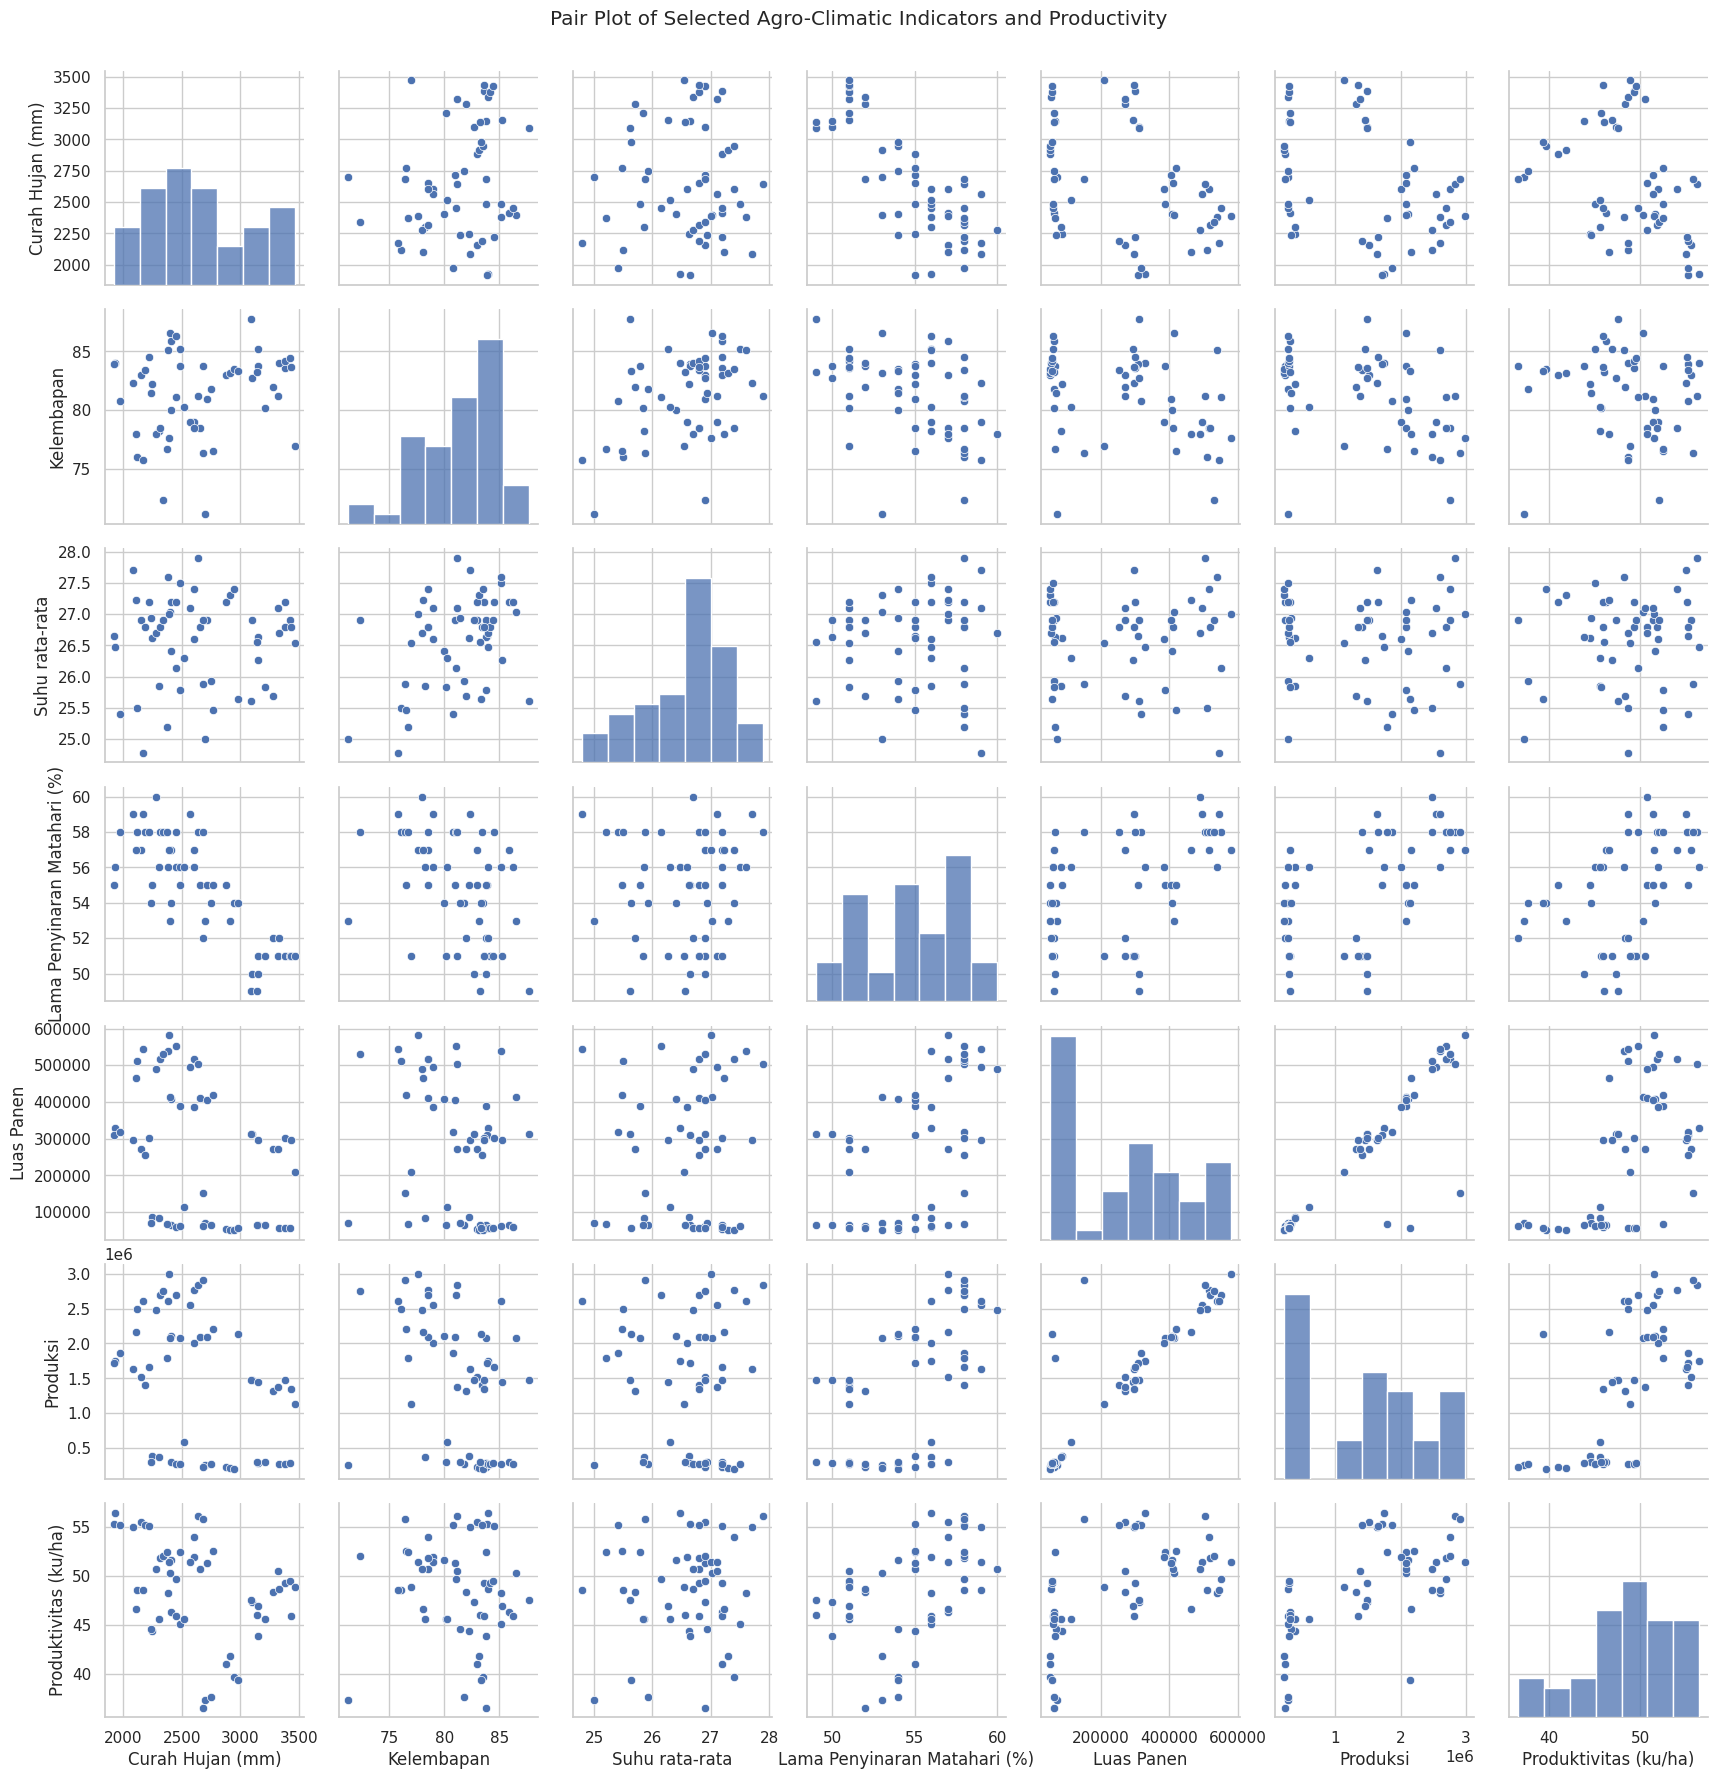

Pair plot showing pairwise relationships and distributions of selected variables.


In [ ]:
sns.pairplot(df_pairplot)
plt.suptitle('Pair Plot of Selected Agro-Climatic Indicators and Productivity', y=1.02)
plt.show()
print("Pair plot showing pairwise relationships and distributions of selected variables.")

## Penjelasan Visualisasi
Berikut adalah penjelasan untuk visualisasi **Pair Plot (Matriks Scatter Plot)**
### **1. Identifikasi Grafik**

Grafik ini adalah ringkasan visual yang sangat *powerful* dalam *Exploratory Data Analysis* (EDA). Grafik ini menampilkan hubungan antara **setiap pasang variabel** dalam dataset Anda sekaligus.

* **Diagonal (Kiri Atas ke Kanan Bawah):** Menampilkan **Histogram** distribusi masing-masing variabel (sama seperti grafik sebelumnya).
* **Non-Diagonal:** Menampilkan **Scatter Plot** pertemuan antara dua variabel (Sumbu X vs Sumbu Y).

### **2. Interpretasi Hubungan Antar Variabel**

Berikut adalah temuan-temuan kunci dari pola sebaran titik-titik tersebut:

**A. Korelasi Sangat Kuat (Positif Sempurna)**

* **Luas Panen vs. Produksi:**
* Lihatlah kotak pertemuan antara baris "Luas Panen" dan kolom "Produksi" (atau sebaliknya).
* Titik-titiknya membentuk **garis lurus diagonal** yang sangat rapi.
* *Artinya:* Hubungan ini sangat linier dan jelas. Semakin luas lahan panen, semakin besar total produksi padinya. Ini adalah validasi data yang logis secara fisik.



**B. Analisis Variabel Iklim (Curah Hujan, Suhu, Kelembapan)**

* **Curah Hujan vs. Kelembapan:** Terlihat ada pola penyebaran yang agak positif (naik ke kanan). Masuk akal, karena semakin banyak hujan, kelembapan cenderung meningkat.
* **Suhu vs. Kelembapan:** Polanya sangat *scattered* (menyebar acak), namun ada kecenderungan samar bahwa suhu tinggi kadang berkorelasi dengan kelembapan yang bervariasi. Tidak ada garis tegas di sini.

**C. Analisis Terhadap Produktivitas (Target Utama)**
Lihat pada **Baris Paling Bawah** (Sumbu Y = Produktivitas) atau **Kolom Paling Kanan** (Sumbu X = Produktivitas):

1. **Produktivitas vs. Luas Panen:**
* Datanya menyebar acak (tidak membentuk garis).
* *Insight Penting:* Luas lahan **tidak menjamin** tingginya produktivitas (kuintal per hektare). Sawah kecil bisa saja sangat produktif, dan sawah luas bisa saja gagal panen/kurang produktif. Produktivitas lebih bergantung pada *efisiensi*, bukan *luas*.


2. **Produktivitas vs. Variabel Iklim:**
* Hubungannya tidak terlihat linier tegas secara kasat mata di sini (titik-titiknya menyebar).
* Ini menunjukkan bahwa hubungan antara iklim dan produktivitas bersifat **kompleks (non-linier)**. Inilah alasan mengapa Anda membutuhkan metode *Machine Learning* (seperti Random Forest atau SVM) untuk klasifikasi, karena metode statistik linier biasa mungkin sulit menangkap polanya secara visual.



### **3. Rekomendasi untuk Skripsi/Proyek Data Science**

Berdasarkan Pair Plot ini, ada satu hal teknis yang sangat penting untuk diperhatikan dalam pemodelan (Modeling):

**Isu Multikolinearitas (Multicollinearity):**

* Karena **Luas Panen** dan **Produksi** memiliki korelasi yang sangat kuat (hampir 1.0), Anda harus berhati-hati jika memasukkan **keduanya sekaligus** sebagai fitur (variabel independen) untuk memprediksi variabel lain.
* Hal ini bisa membingungkan model matematika karena kedua data tersebut membawa informasi yang hampir sama (redundan).
---

## **🏁 8.0 Model Benchmarking & Performance Evaluation**

Tahap ini merupakan fase Evaluasi Kualitas Klaster untuk menjawab Hipotesis 4, di mana kita mengukur seberapa efektif algoritma K-Means dalam mengelompokkan wilayah berdasarkan profil cuaca dan produktivitas padi, serta memastikan hasil klasterisasi bersifat objektif dan stabil.



**Insight Utama:**
* **🤖 Cluster Validation:** Menilai seberapa baik data terbagi ke dalam kelompok yang berbeda melalui dua pendekatan:
    * **Internal Evaluation:** Mengukur kepadatan (compactness) di dalam klaster dan jarak antar klaster.
    * **Climate-Production Alignment:** Memastikan klaster yang terbentuk benar-benar menunjukkan perbedaan signifikan pada variabel cuaca (curah hujan, suhu) dan hasil panen.
* **📏 Metric Triangulation:** Menggunakan tiga parameter evaluasi untuk menentukan jumlah klaster (k) terbaik:
    * **Elbow Method (Inertia/WCSS):** Mencari titik "siku" di mana penambahan jumlah klaster tidak lagi memberikan penurunan variansi internal yang signifikan.
    * **Silhouette Score:** Mengukur seberapa mirip suatu data dengan klasternya sendiri dibandingkan dengan klaster lain (skala -1 hingga 1; semakin mendekati 1 berarti pengelompokan sangat baik).
    * **Davies-Bouldin Index (DBI):** Mengukur rasio jarak di dalam klaster terhadap jarak antar klaster (semakin rendah nilai DBI, semakin baik pemisahan klasternya).

    ---

### **❓ Hipotesis 5 (Harvest-Production Linearity Check)**

"Apakah hubungan antara input fisik utama (**Luas Panen**) dan output hasil (**Total Produksi**) bersifat linear sempurna di seluruh provinsi, ataukah terdapat variabilitas efisiensi lahan yang signifikan antar-wilayah?"

Kode ini bertujuan memverifikasi asumsi fundamental ekonomi pertanian: *ceteris paribus*, penambahan luas lahan seharusnya meningkatkan total produksi secara proporsional.


**Insight Utama & Interpretasi Visual:**

* **📈 Correlation Coefficent ($r$):**
    Menghitung angka korelasi per provinsi. Nilai ideal adalah mendekati **+1.00**. Jika ada provinsi dengan korelasi rendah (misal < 0.5), ini menandakan **anomali**: lahan luas tersedia tapi panen gagal (bisa karena faktor eksternal seperti banjir atau hama).
* **📐 Garis Regresi (Garis Merah):**
    Garis merah pada grafik menggambarkan **konsistensi hasil**.
    * **Garis Lurus Menanjak:** Menunjukkan performa pertanian yang sehat dan stabil.
    * **Titik-titik Jauh dari Garis:** Menunjukkan variabilitas tinggi (produksi tidak stabil dari tahun ke tahun).
* **🔍 Spatial Disparity:**
    Membandingkan "kemiringan" garis antar provinsi. Provinsi dengan garis yang lebih curam (steep) memiliki produktivitas per hektar yang lebih tinggi dibandingkan provinsi dengan garis landai.

In [ ]:
print("Korelasi Pearson antara 'Luas Panen' dan 'Produksi' per Provinsi:")

for provinsi, group_df in df_final.groupby('Provinsi'):
    print(f"\nProvinsi: {provinsi}")

    # Check if there's enough data for correlation calculation (at least 2 data points)
    # And ensure there is variance in both columns
    if len(group_df) > 1 and group_df['Luas Panen'].nunique() > 1 and group_df['Produksi'].nunique() > 1:
        correlation = group_df['Luas Panen'].corr(group_df['Produksi'])
        print(f"  Korelasi 'Luas Panen' dan 'Produksi': {correlation:.2f}")
    else:
        print("  Tidak cukup data atau variasi untuk menghitung korelasi.")

Korelasi Pearson antara 'Luas Panen' dan 'Produksi' per Provinsi:

Provinsi: Aceh
  Korelasi 'Luas Panen' dan 'Produksi': 0.94

Provinsi: Bengkulu
  Korelasi 'Luas Panen' dan 'Produksi': 1.00

Provinsi: Jambi
  Korelasi 'Luas Panen' dan 'Produksi': 0.99

Provinsi: Lampung
  Korelasi 'Luas Panen' dan 'Produksi': 0.89

Provinsi: Riau
  Korelasi 'Luas Panen' dan 'Produksi': -0.07

Provinsi: Sumatera Barat
  Korelasi 'Luas Panen' dan 'Produksi': 0.83

Provinsi: Sumatera Selatan
  Korelasi 'Luas Panen' dan 'Produksi': -0.29

Provinsi: Sumatera Utara
  Korelasi 'Luas Panen' dan 'Produksi': 0.77


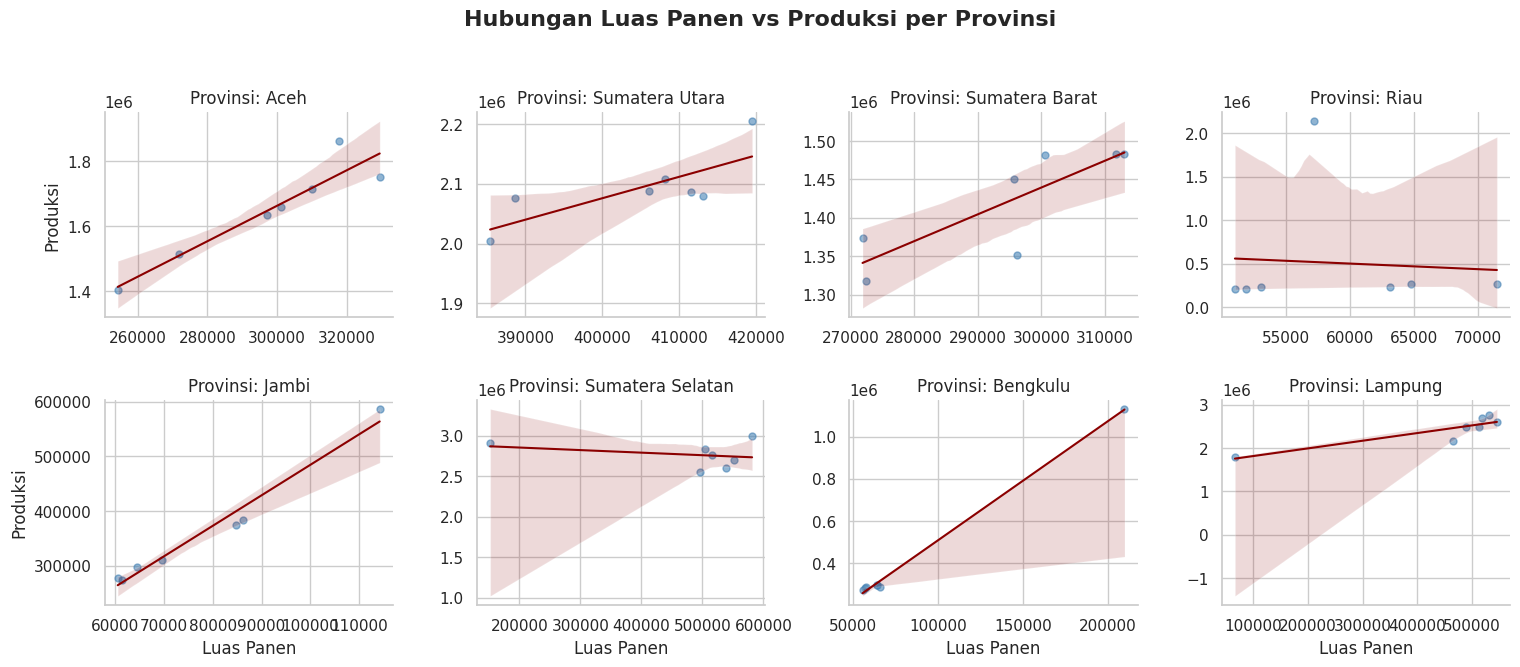

Scatter plot dengan garis regresi untuk masing-masing provinsi telah ditampilkan.


In [ ]:
# Set gaya global
sns.set_theme(style="whitegrid")

# Membuat FacetGrid
g = sns.FacetGrid(
    df_final,
    col='Provinsi',
    col_wrap=4,
    height=3.2,
    aspect=1.2,
    sharex=False,
    sharey=False
)

# Scatter + Regresi
g.map(
    sns.regplot,
    'Luas Panen',
    'Produksi',
    scatter_kws={'alpha':0.6, 's':25, 'color': 'steelblue'},
    line_kws={'color':'darkred', 'linewidth':1.5}
)

# Label dan judul
g.set_axis_labels('Luas Panen', 'Produksi')
g.set_titles('Provinsi: {col_name}')

# Judul utama yang lebih rapi
g.fig.suptitle(
    'Hubungan Luas Panen vs Produksi per Provinsi',
    y=1.04,
    fontsize=16,
    fontweight='bold'
)

# Atur ruang antar subplot
g.fig.subplots_adjust(top=0.88, hspace=0.4)

plt.show()

print("Scatter plot dengan garis regresi untuk masing-masing provinsi telah ditampilkan.")


## Penjelasan Visualisasi
Berikut adalah penjelasan untuk visualisasi **Scatter Plot dengan Garis Regresi (Regression Plot)**

### **1. Identifikasi & Tujuan Grafik**

Grafik ini memvisualisasikan hubungan antara **Luas Panen (Sumbu X)** dan **Produksi (Sumbu Y)**, yang dipecah berdasarkan provinsi.

* **Titik Biru:** Data aktual (observasi).
* **Garis Merah:** Garis regresi linier (prediksi tren).
* **Area Merah Muda (Arsiran):** *Confidence Interval* (Selang Kepercayaan). Semakin lebar arsiran, semakin tidak pasti model regresinya.

### **2. Interpretasi Umum (Hukum Pertanian)**

Secara logika umum dan hukum ekonomi, hubungan antara Luas Panen dan Produksi seharusnya **Linier Positif Sempurna**. Artinya, semakin luas lahan yang dipanen, seharusnya jumlah padi yang dihasilkan semakin banyak.

### **3. Analisis Per Provinsi**

Berdasarkan grafik, kita dapat membagi provinsi menjadi dua kelompok perilaku data:

**A. Kelompok Hubungan Normal (Linier Positif Kuat)**
Provinsi: **Aceh, Sumatera Utara, Sumatera Barat, Jambi, Bengkulu, Lampung.**

* **Pola:** Garis merah menanjak tajam dari kiri bawah ke kanan atas.
* **Analisis:** Data di provinsi ini sangat konsisten. Penambahan luas lahan berbanding lurus dengan kenaikan produksi.
* **Contoh Terbaik:** Lihat **Provinsi Jambi** dan **Bengkulu**. Titik-titik datanya menempel sangat rapat pada garis merah, dan area arsirannya (shadow) sangat tipis. Ini menunjukkan korelasi yang sangat kuat dan error yang kecil.

**B. Kelompok Anomali (Hubungan Lemah/Tidak Jelas)**
Provinsi: **Riau dan Sumatera Selatan.**

* **Pola:** Garis merah cenderung **datar (horizontal)** atau bahkan sedikit menurun. Area arsirannya (pink) sangat lebar.
* **Analisis untuk Riau:**
* Garisnya hampir rata. Ini aneh, karena menyiratkan bahwa berapapun luas lahannya (baik 55.000 maupun 70.000 hektar), produksinya tetap segitu-gitu saja (sekitar 0.2 - 0.5 juta).
* Lebarnya area arsiran menunjukkan ketidakpastian data yang tinggi. Mungkin ada faktor *kegagalan panen* atau *data outlier* yang signifikan di provinsi ini.


* **Analisis untuk Sumatera Selatan:**
* Garisnya juga cenderung datar/menurun tipis. Meskipun luas panen bertambah (bergerak ke kanan), produksi tidak naik secara signifikan. Ini bisa mengindikasikan efisiensi lahan yang menurun atau adanya masalah produktivitas di lahan yang lebih luas.



### **4. Kesimpulan Penting untuk Proyek Data Science Anda**

1. **Validasi Data:** Grafik ini memberi sinyal ("alert") untuk mengecek kembali data mentah **Riau** dan **Sumatera Selatan**. Apakah ada kesalahan input? Atau apakah memang produktivitas di sana sangat bermasalah?
2. **Heteroskedastisitas:** Perhatikan bahwa pada provinsi seperti **Lampung**, area arsiran melebar di bagian kanan atas. Ini menunjukkan bahwa pada skala panen yang sangat besar, variasi hasil produksinya menjadi lebih sulit diprediksi dibandingkan pada skala panen kecil.
3. **Pemilihan Fitur:**
* Untuk provinsi di Grup A, variabel "Luas Panen" adalah prediktor yang sangat sempurna untuk "Produksi".
* Namun, jika Anda membuat model prediksi gabungan untuk seluruh Sumatera, perilaku data Riau dan Sumsel bisa "merusak" akurasi model karena polanya berbeda sendiri.



---

### **❓ Hipotesis 6 (Regional Eco-Agricultural Dynamics)**

"Bagaimana sebaran data dan hubungan timbal balik antara indikator **lingkungan** (cuaca) dengan indikator **kinerja pertanian** (produktivitas) di provinsi-provinsi Sumatra selama periode 2018-2024?"

Kode ini menjalankan analisis **Korelasi Multivariat Granular** untuk membedah profil sensitivitas iklim yang spesifik di setiap provinsi, alih-alih melihat Sumatra sebagai satu kesatuan homogen.



**Insight Utama:**

* **🌡️ Multi-Factor Profiling:**
  Menganalisis empat dimensi iklim sekaligus (**Hujan, Suhu, Kelembapan, Penyinaran**) untuk mengidentifikasi faktor mana yang menjadi "pembatas utama" (*limiting factor*) produktivitas di wilayah tersebut.
* **📍 Localized Diagnosis:**
  Mengakui bahwa setiap provinsi memiliki karakteristik unik.
  * *Contoh:* Curah hujan mungkin berkorelasi positif (+) di provinsi kering, namun berkorelasi negatif (-) di provinsi rawan banjir.
* **🛡️ Statistical Validity:**
  Menerapkan filter `nunique > 1` untuk menjamin bahwa perhitungan korelasi hanya dilakukan jika terdapat fluktuasi data yang cukup. Data yang stagnan (konstan) akan dilewati untuk menghindari bias interpretasi atau error matematika.

In [ ]:
print("Korelasi Produktivitas dengan Variabel Iklim per Provinsi:")

climate_indicators = ['Curah Hujan (mm)', 'Kelembapan', 'Suhu rata-rata', 'Lama Penyinaran Matahari (%)']

for provinsi, group_df in df_final.groupby('Provinsi'):
    print(f"\nProvinsi: {provinsi}")

    for indicator in climate_indicators:
        if len(group_df) > 1 and group_df['Produktivitas (ku/ha)'].nunique() > 1 and group_df[indicator].nunique() > 1:
            correlation = group_df['Produktivitas (ku/ha)'].corr(group_df[indicator])
            print(f"  Korelasi Produktivitas dengan {indicator}: {correlation:.2f}")
        else:
            print(f"  Tidak cukup data untuk menghitung korelasi Produktivitas dengan {indicator}.")

Korelasi Produktivitas dengan Variabel Iklim per Provinsi:

Provinsi: Aceh
  Korelasi Produktivitas dengan Curah Hujan (mm): -0.49
  Korelasi Produktivitas dengan Kelembapan: 0.26
  Korelasi Produktivitas dengan Suhu rata-rata: -0.28
  Korelasi Produktivitas dengan Lama Penyinaran Matahari (%): -0.55

Provinsi: Bengkulu
  Korelasi Produktivitas dengan Curah Hujan (mm): 0.91
  Korelasi Produktivitas dengan Kelembapan: -0.02
  Korelasi Produktivitas dengan Suhu rata-rata: 0.50
  Korelasi Produktivitas dengan Lama Penyinaran Matahari (%): 0.60

Provinsi: Jambi
  Korelasi Produktivitas dengan Curah Hujan (mm): 0.61
  Korelasi Produktivitas dengan Kelembapan: 0.31
  Korelasi Produktivitas dengan Suhu rata-rata: 0.04
  Korelasi Produktivitas dengan Lama Penyinaran Matahari (%): 0.87

Provinsi: Lampung
  Korelasi Produktivitas dengan Curah Hujan (mm): 0.97
  Korelasi Produktivitas dengan Kelembapan: -0.23
  Korelasi Produktivitas dengan Suhu rata-rata: -0.01
  Korelasi Produktivitas dengan La

Melakukan perhitungan korelasi statistik secara terpisah untuk setiap provinsi guna mengidentifikasi kekuatan dan arah hubungan spesifik antara variabilitas parameter iklim (hujan, suhu, kelembapan, penyinaran) terhadap capaian produktivitas di masing-masing wilayah administratif.

/tmp/ipython-input-532962999.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='Provinsi', y='Produktivitas (ku/ha)', palette='viridis')


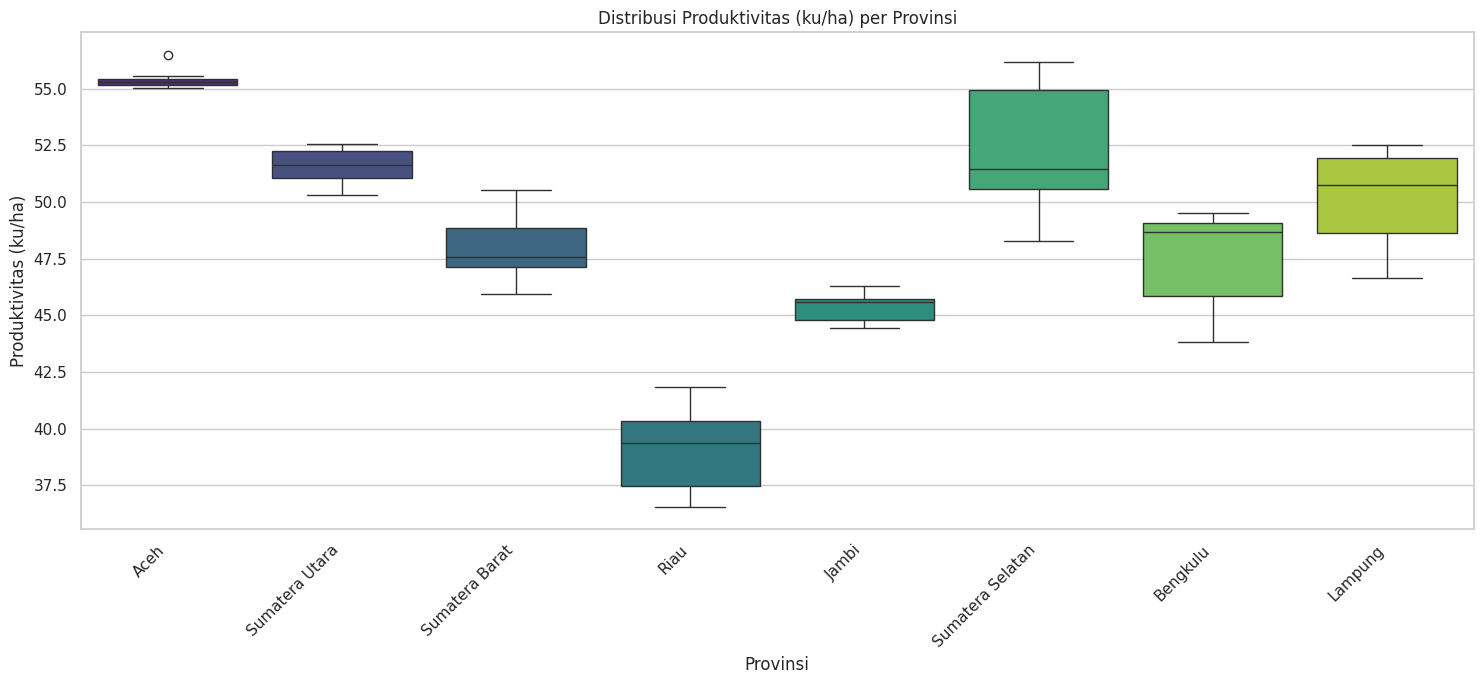

Box plot showing the distribution of 'Produktivitas (ku/ha)' across each province has been generated.


In [ ]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=df_final, x='Provinsi', y='Produktivitas (ku/ha)', palette='viridis')
plt.title('Distribusi Produktivitas (ku/ha) per Provinsi')
plt.xlabel('Provinsi')
plt.ylabel('Produktivitas (ku/ha)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Box plot showing the distribution of 'Produktivitas (ku/ha)' across each province has been generated.")

## Penjelasan Visualisasi
Berikut adalah penjelasan mendalam untuk visualisasi **Boxplot (Diagram Kotak Garis)** .

Grafik ini sangat krusial dalam statistika deskriptif karena mampu merangkum 5 informasi statistik sekaligus (Minimum, Kuartil 1, Median, Kuartil 3, Maksimum) serta mendeteksi *outlier* (pencilan).

---

### **1. Identifikasi Grafik**

* **Judul:** Distribusi Produktivitas (ku/ha) per Provinsi.
* **Sumbu X (Kategori):** Nama-nama provinsi di Sumatera.
* **Sumbu Y (Numerik):** Nilai produktivitas dalam kuintal per hektare (ku/ha).
* **Elemen Visual:**
* **Kotak (Box):** Menunjukkan 50% data tengah (Interquartile Range). Garis di dalam kotak adalah **Median** (nilai tengah).
* **Garis Kumis (Whiskers):** Menunjukkan rentang data dari minimum ke maksimum (di luar outlier).
* **Titik (Circle):** Menunjukkan **Outlier** (data ekstrem yang jauh dari kelompoknya).



### **2. Interpretasi Data per Provinsi**

Kita bisa mengelompokkan provinsi berdasarkan karakteristik produktivitasnya:

**A. Kelompok Produktivitas Tinggi & Stabil**

* **Provinsi Aceh (Paling Kiri):**
* **Posisi:** Kotaknya berada paling tinggi (Median > 55 ku/ha).
* **Kestabilan:** Kotaknya sangat gepeng/pendek. Ini artinya variasi datanya sangat kecil; produktivitas di Aceh sangat konsisten tinggi dari tahun ke tahun atau antar kabupaten.
* **Outlier:** Ada satu titik lingkaran di atas. Ini menunjukkan pernah ada satu kejadian di mana produktivitas Aceh melonjak sangat tinggi melebihi kebiasaan normalnya.



**B. Kelompok Variabilitas Tinggi (Data Tidak Konsisten)**

* **Sumatera Selatan:**
* **Posisi:** Memiliki kotak yang **paling panjang (tinggi)** secara vertikal.
* **Arti:** Rentang antara hasil panen terendah dan tertingginya sangat jauh (dari sekitar 48 hingga 56 ku/ha). Ini menunjukkan ketidakstabilan hasil panen di wilayah ini. Kadang sangat bagus, kadang biasa saja.



**C. Kelompok Produktivitas Rendah**

* **Riau:**
* **Posisi:** Kotaknya berada paling rendah dibanding provinsi lain (Median < 40 ku/ha).
* **Koneksi dengan Grafik Sebelumnya:** Temuan ini konsisten dengan *Scatter Plot* sebelumnya yang menunjukkan garis regresi Riau datar di angka rendah. Ini mengonfirmasi bahwa secara rata-rata, efisiensi lahan di Riau memang tertinggal dibandingkan provinsi tetangganya.



**D. Kelompok Stabil di Level Menengah**

* **Jambi:**
* Kotaknya pendek (stabil) namun posisinya rendah (sekitar 45 ku/ha). Artinya Jambi konsisten menghasilkan panen di angka tersebut, jarang melonjak tinggi tapi juga jarang anjlok.



### **3. Kesimpulan**

1. **Faktor Lokasi Sangat Berpengaruh (Spatial Dependency):**
Grafik ini membuktikan bahwa **Provinsi** adalah fitur/variabel yang sangat penting (signifikan) untuk klasifikasi. Jika model Anda tahu datanya berasal dari "Aceh", model hampir pasti bisa menebak produktivitasnya "Tinggi". Sebaliknya, jika dari "Riau", kemungkinan besar "Rendah".
2. **Deteksi Masalah (Problem Statement):**
Anda bisa mengangkat isu mengenai **Sumatera Selatan**. Mengapa variansinya begitu besar? Apakah karena faktor iklim yang ekstrem (seperti yang terlihat di grafik tren suhu/hujan sebelumnya) atau faktor luas lahan yang sangat masif sehingga manajemennya sulit?
3. **Heterogenitas Data:**
Data Anda tidak *homogen*. Anda tidak bisa memukul rata kebijakan pertanian untuk seluruh Sumatera karena karakteristik Aceh (stabil tinggi) sangat berbeda dengan Sumsel (fluktuatif) atau Riau (rendah).

---


Memvisualisasikan komparasi statistik sebaran data produktivitas di berbagai provinsi menggunakan *boxplot* untuk menganalisis variabilitas hasil panen serta mengidentifikasi potensi anomali (*outliers*) secara grafis.

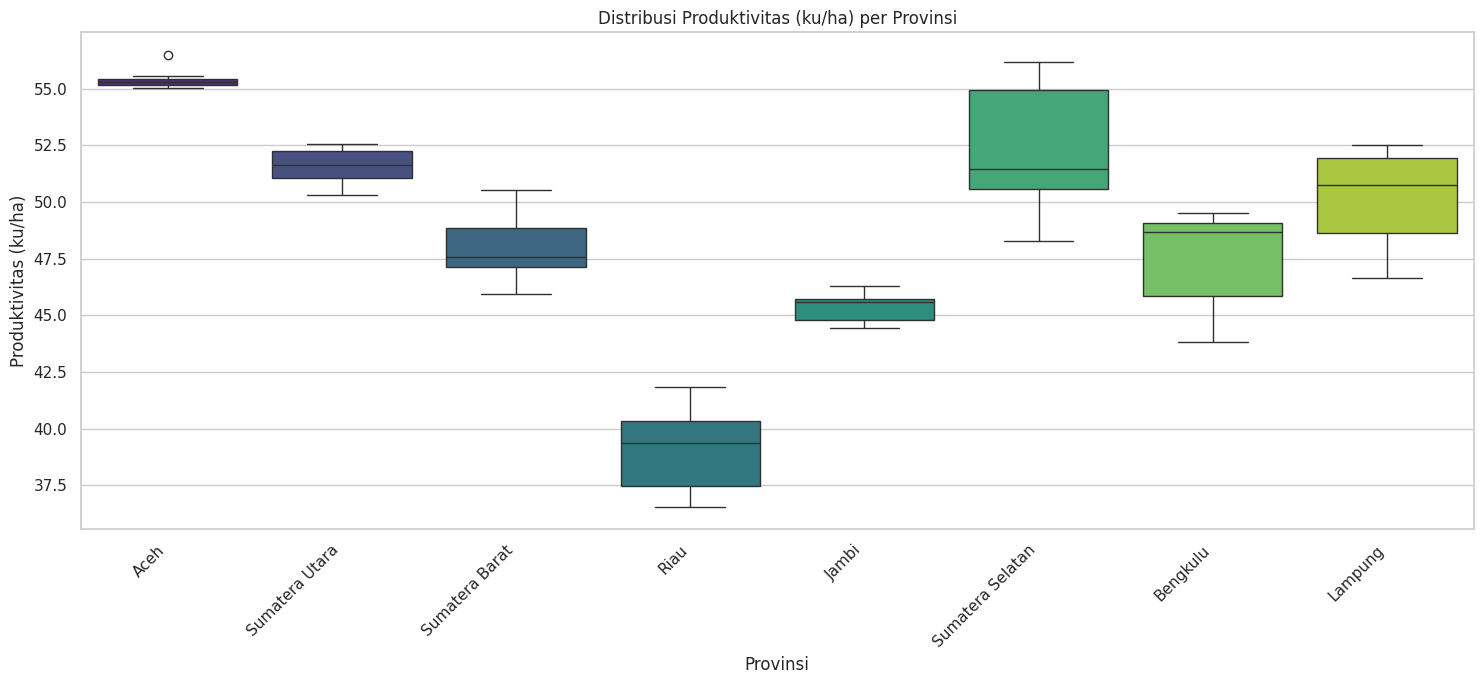

Box plot showing the distribution of 'Produktivitas (ku/ha)' across each province has been generated.


In [ ]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=df_final, x='Provinsi', y='Produktivitas (ku/ha)', hue='Provinsi', palette='viridis', legend=False)
plt.title('Distribusi Produktivitas (ku/ha) per Provinsi')
plt.xlabel('Provinsi')
plt.ylabel('Produktivitas (ku/ha)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Box plot showing the distribution of 'Produktivitas (ku/ha)' across each province has been generated.")

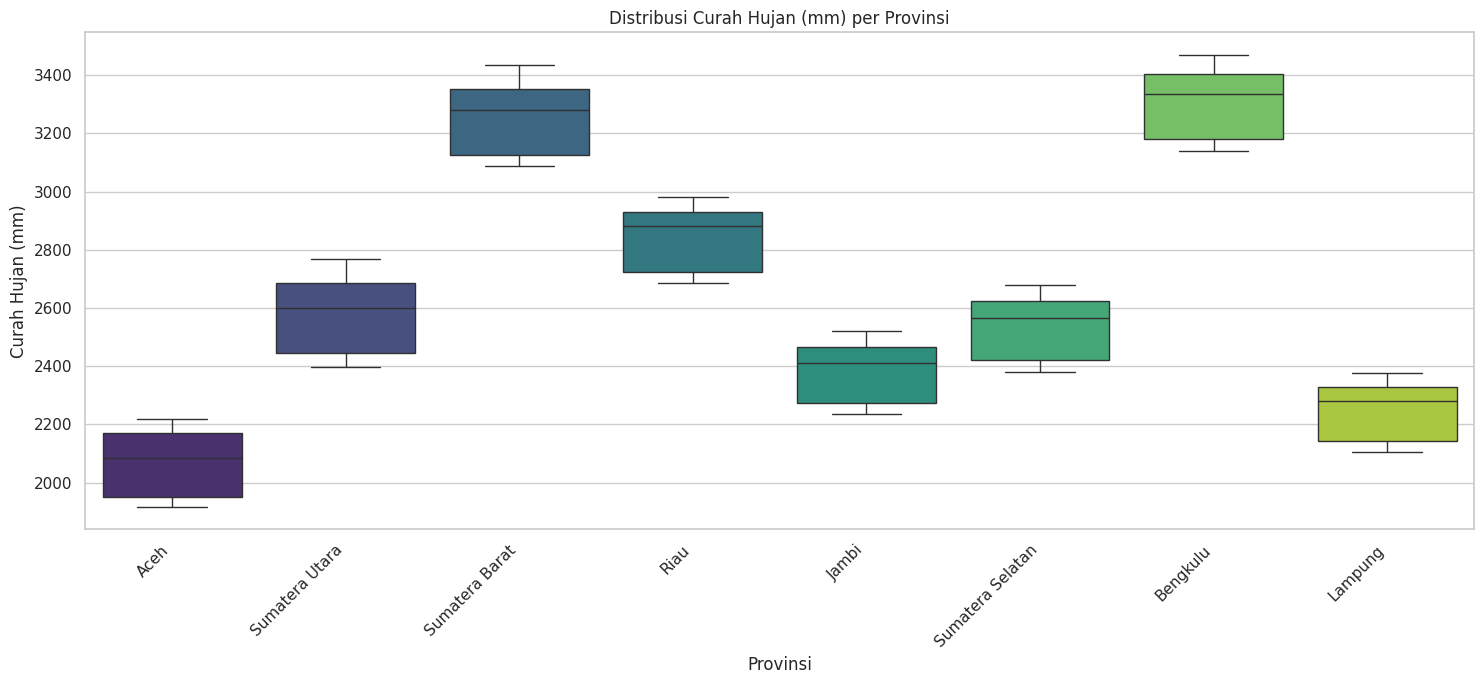

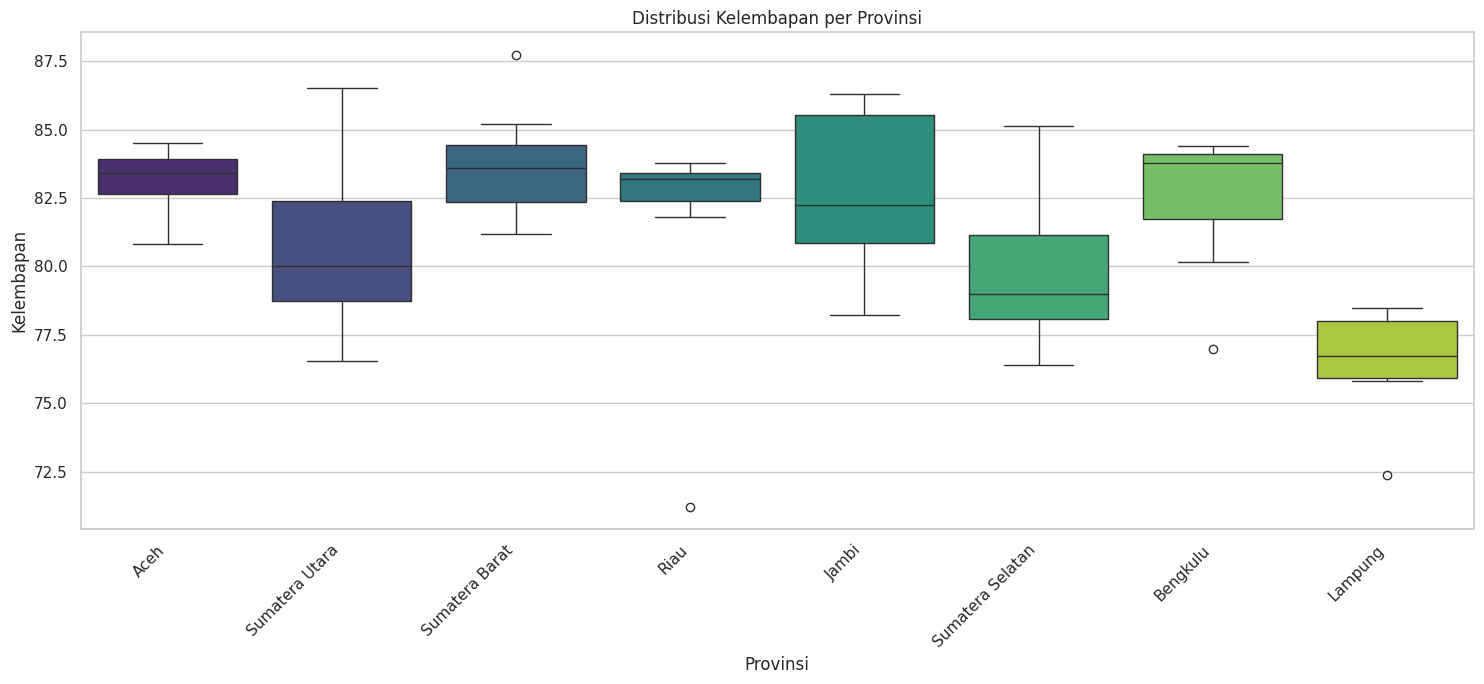

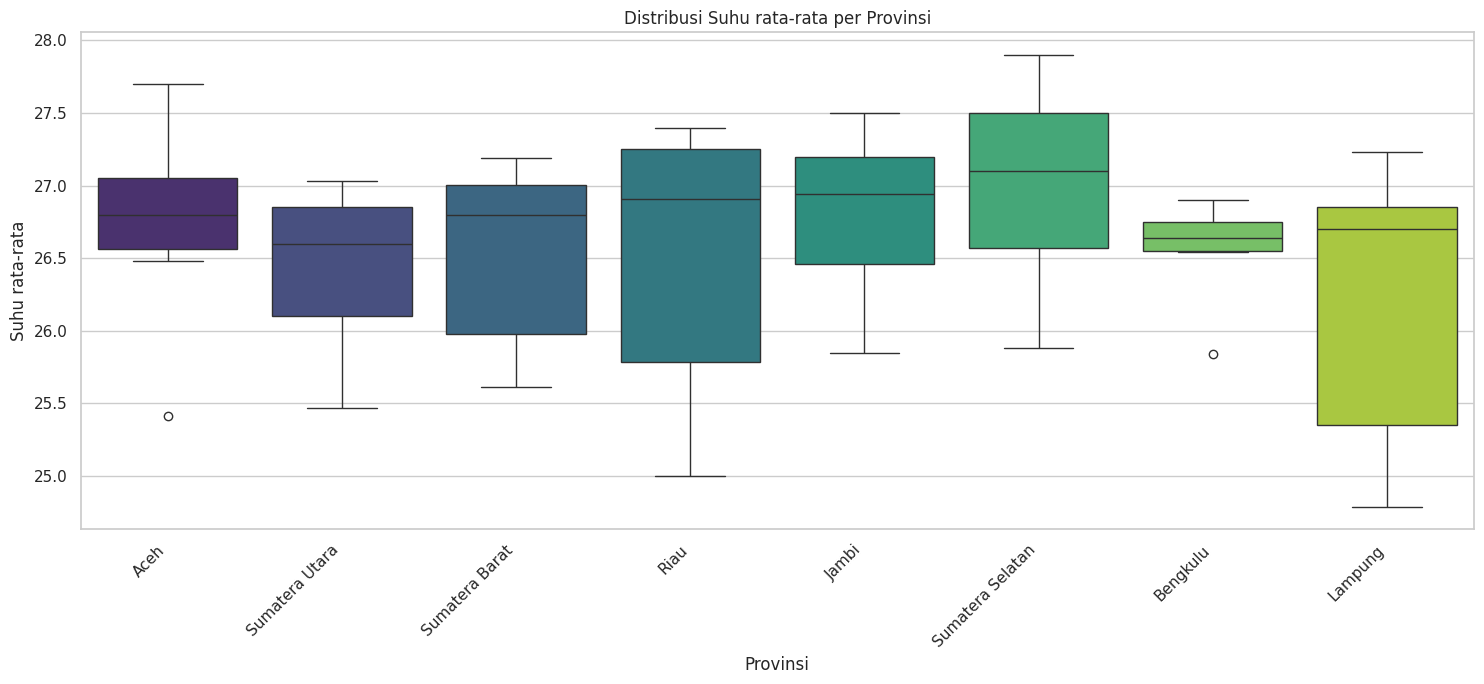

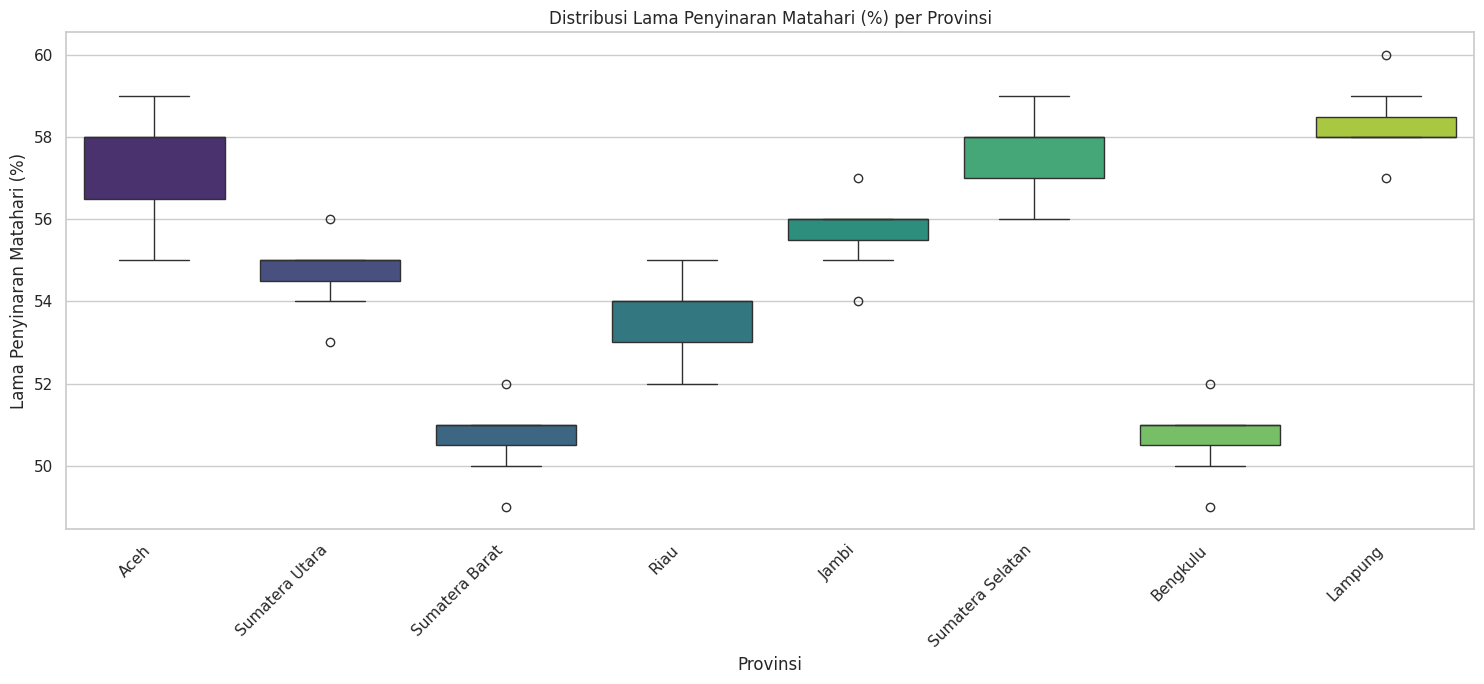

Box plots showing the distribution of climate indicators across each province have been generated.


In [ ]:
climate_indicators = ['Curah Hujan (mm)', 'Kelembapan', 'Suhu rata-rata', 'Lama Penyinaran Matahari (%)']

for indicator in climate_indicators:
    plt.figure(figsize=(15, 7))
    sns.boxplot(data=df_final, x='Provinsi', y=indicator, hue='Provinsi', palette='viridis', legend=False)
    plt.title(f'Distribusi {indicator} per Provinsi')
    plt.xlabel('Provinsi')
    plt.ylabel(indicator)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

print("Box plots showing the distribution of climate indicators across each province have been generated.")

Diagram *boxplot* untuk membandingkan pola distribusi dan variabilitas statistik dari masing-masing indikator iklim (curah hujan, suhu, kelembapan, penyinaran) di seluruh provinsi secara komprehensif.

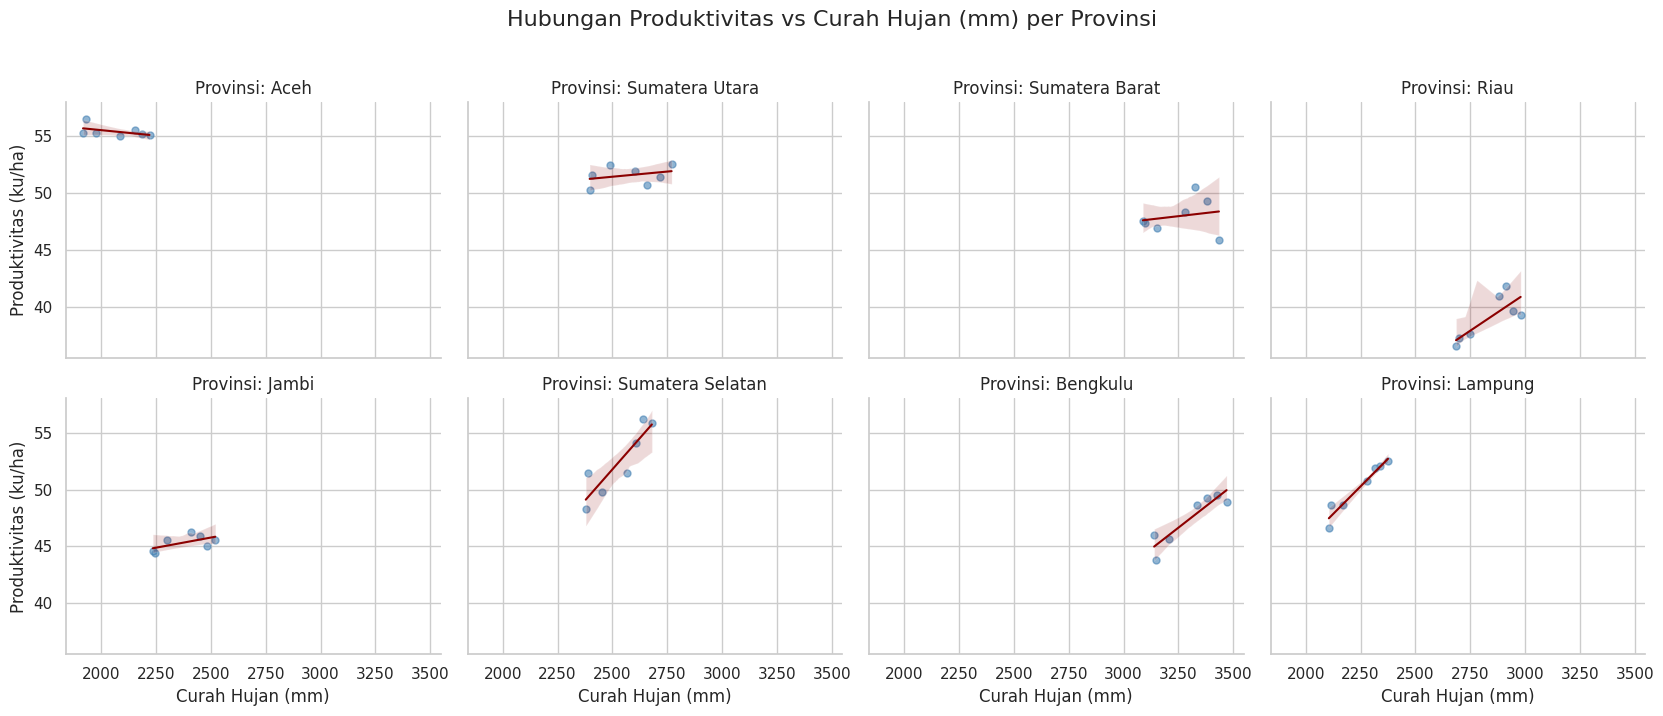

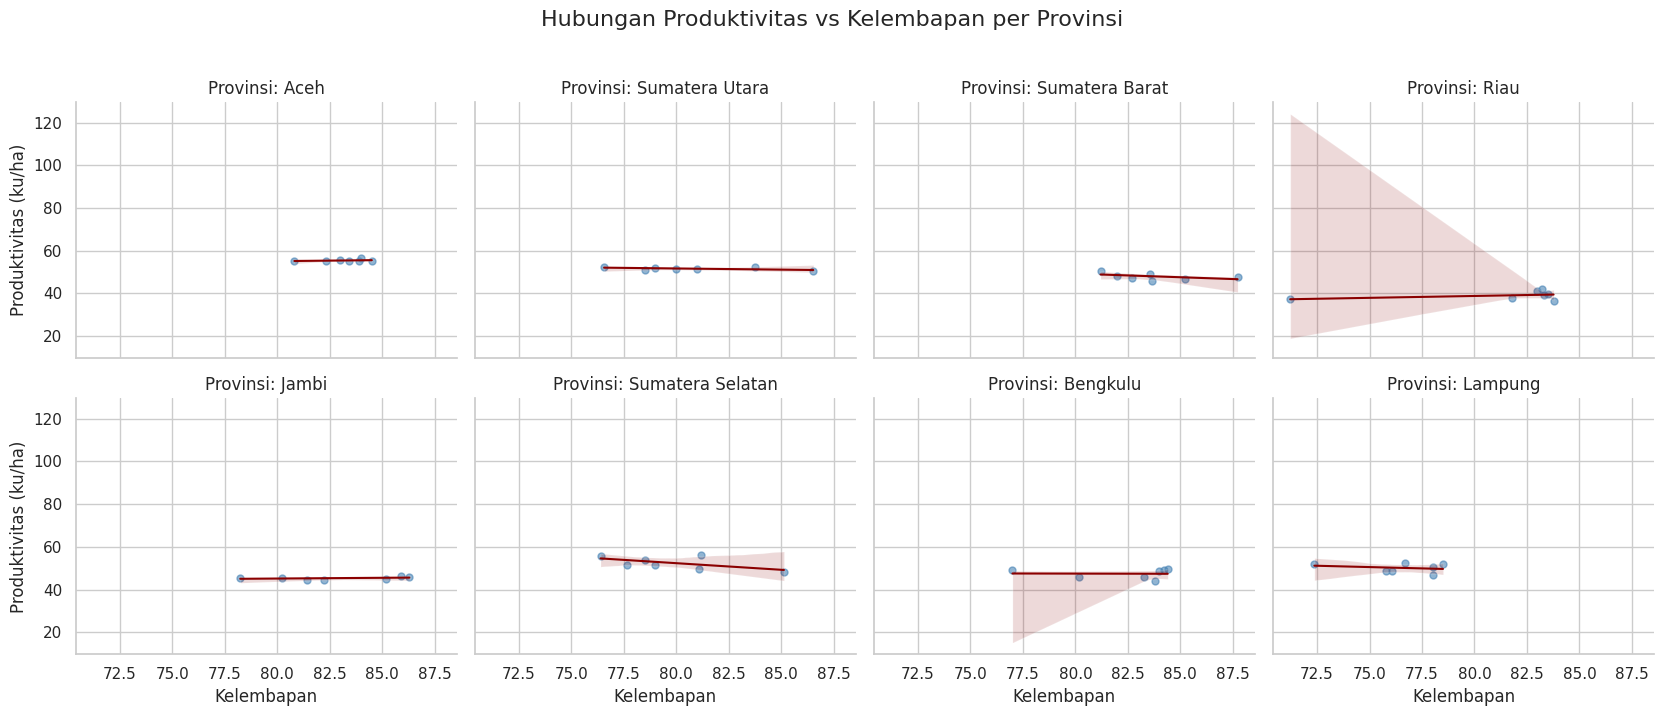

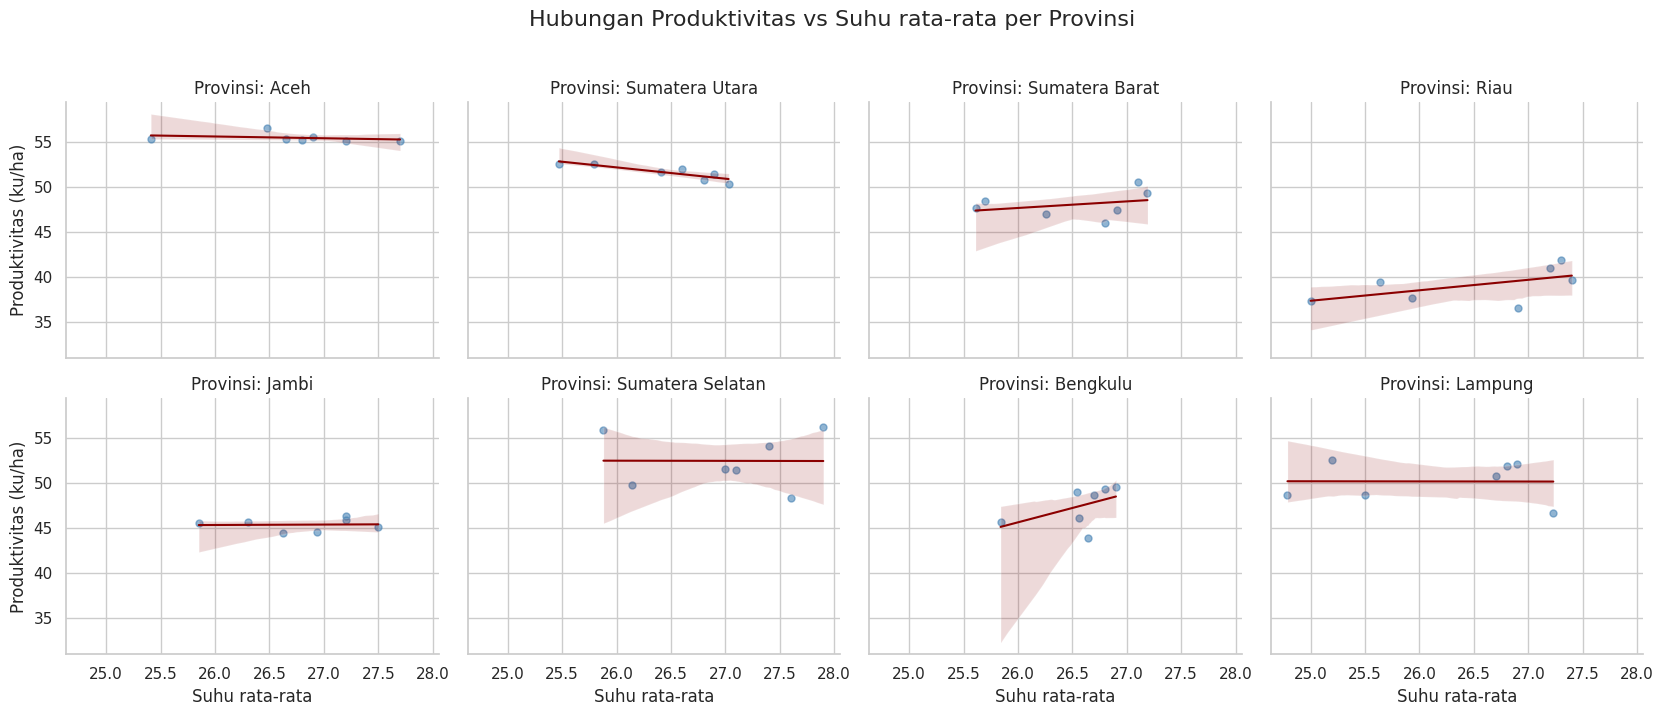

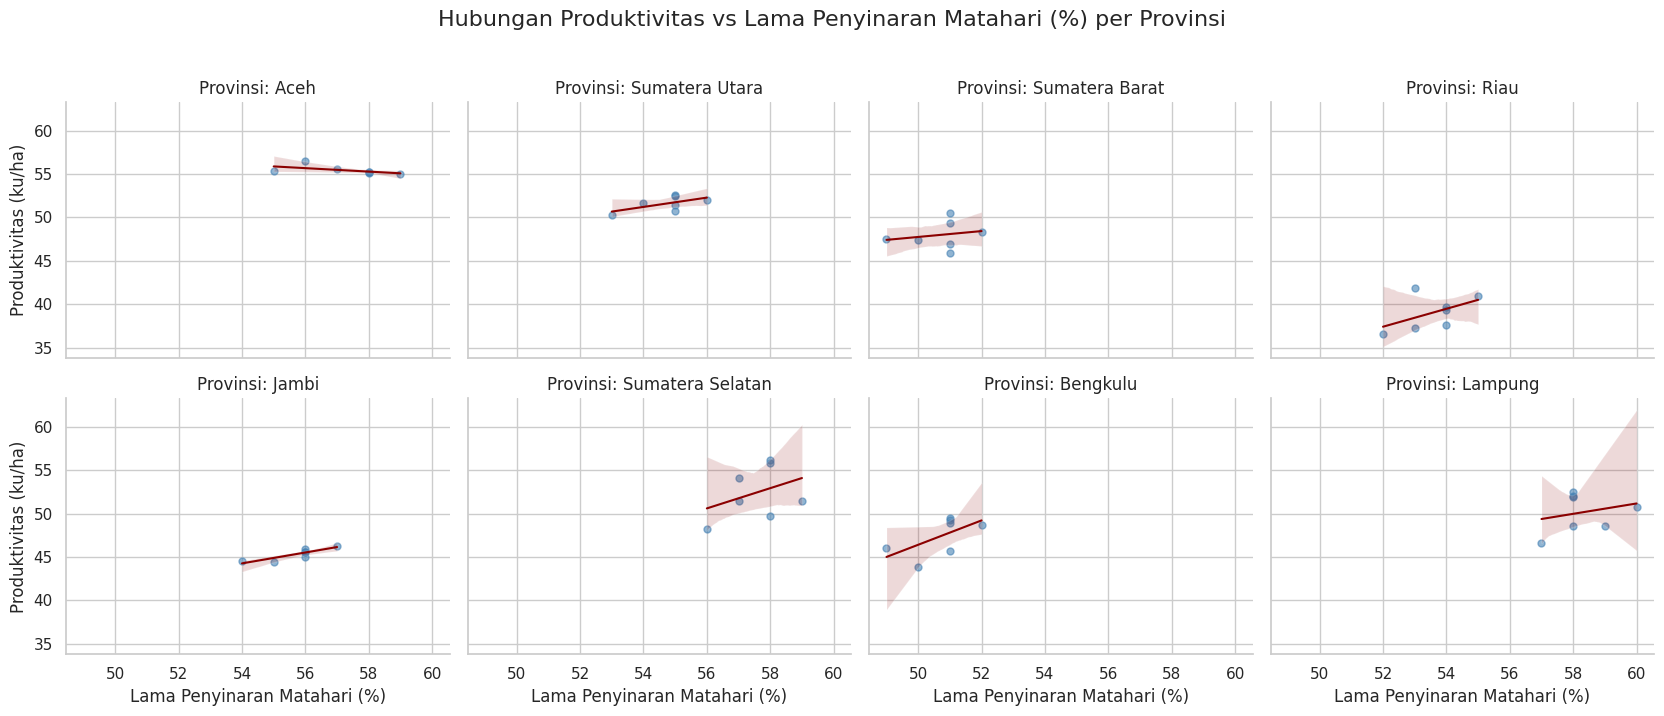

Scatter plots with regression lines showing the relationship between 'Produktivitas (ku/ha)' and various climate indicators per province have been generated.


In [ ]:
climate_indicators = ['Curah Hujan (mm)', 'Kelembapan', 'Suhu rata-rata', 'Lama Penyinaran Matahari (%)']

for indicator in climate_indicators:
    g = sns.FacetGrid(df_final, col='Provinsi', col_wrap=4, height=3.5, aspect=1.2, sharey=True)
    g.map(sns.regplot, indicator, 'Produktivitas (ku/ha)',
          scatter_kws={'alpha':0.6, 's':25, 'color': 'steelblue'},
          line_kws={'color':'darkred', 'linewidth':1.5})
    g.set_axis_labels(indicator, 'Produktivitas (ku/ha)')
    g.set_titles('Provinsi: {col_name}')
    g.fig.suptitle(f'Hubungan Produktivitas vs {indicator} per Provinsi', y=1.02, fontsize=16)
    g.tight_layout()
    plt.show()

print("Scatter plots with regression lines showing the relationship between 'Produktivitas (ku/ha)' and various climate indicators per province have been generated.")

### **🧩 Hipotesis 7**

"Seberapa besar peningkatan akurasi estimasi produktivitas tanaman pangan di Sumatra jika dilakukan berdasarkan karakteristik **tipologi wilayah (zonasi iklim)** dibandingkan dengan estimasi secara nasional/umum?"

Ini adalah tahapan **Hybrid Machine Learning** (gabungan *Unsupervised* dan *Supervised Learning*). Tidak lagi memukul rata seluruh Sumatra, melainkan membaginya dulu menjadi zona-zona iklim yang mirip, baru kemudian memprediksinya.



### **🛠️ Tahapan Analisis dalam Kode:**

1.  **Standardisasi Data (`StandardScaler`):**
    * Menyamakan skala data (misal: *Curah Hujan* 2000 mm vs *Suhu* 27°C). Tanpa ini, K-Means akan bias ke angka yang lebih besar (curah hujan).
2.  **Pencarian Zonasi Otomatis (`Elbow Method`):**
    * Kode Anda menggunakan perhitungan geometris cerdas (jarak titik ke garis) untuk menemukan **K Optimal** (jumlah klaster ideal) secara otomatis. Hasilnya ditemukan **3 Klaster** (3 tipologi iklim berbeda).



In [ ]:
df_final.head()

,Provinsi,Tahun,Produksi,Luas Panen,Kelembapan,Suhu rata-rata,Curah Hujan (mm),Lama Penyinaran Matahari (%),Produktivitas (ku/ha)
0,Aceh,2018,1751996.94,329515.78,83.98,26.48,1928.5,56,56.49
1,Aceh,2019,1714437.60,310012.46,83.90,26.65,1916.7,55,55.30
2,Aceh,2020,1861567.10,317869.41,80.82,25.41,1974.5,58,55.28
3,Aceh,2021,1634639.60,297058.38,82.33,27.70,2085.8,59,55.03
4,Aceh,2022,1513793.00,271750.00,83.00,26.90,2154.6,57,55.55


In [ ]:
df_final.describe()

,Tahun,Produksi,Luas Panen,Kelembapan,Suhu rata-rata,Curah Hujan (mm),Lama Penyinaran Matahari (%),Produktivitas (ku/ha)
count,56.0000,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,2021.0000,1.453292e+06,267322.171250,81.321964,26.586027,2647.866071,54.821429,48.676786
std,2.0181,9.434685e+05,181085.939785,3.511047,0.714111,441.818913,2.961002,5.033453
min,2018.0000,2.059700e+05,51050.000000,71.220000,24.787500,1916.700000,49.000000,36.560000
25%,2019.0000,2.978430e+05,65601.652500,78.500000,26.087500,2311.850000,52.000000,45.825000
50%,2021.0000,1.498435e+06,295940.235000,82.115000,26.800000,2583.600000,55.000000,49.095000
75%,2023.0000,2.145133e+06,411880.310000,83.775000,27.100000,3007.025000,57.250000,52.007500
max,2024.0000,2.994192e+06,581574.610000,87.730000,27.900000,3470.000000,60.000000,56.490000


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select the relevant agro-climatic indicator columns
relevant_agro_climatic_indicators = [
    'Curah Hujan (mm)',
    'Lama Penyinaran Matahari (%)',
    'Suhu rata-rata',
    'Kelembapan',
]
df_clustering = df_final[relevant_agro_climatic_indicators].copy()

print("DataFrame for clustering (df_clustering) head:")
print(df_clustering.head())

# Standardize the df_clustering DataFrame
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clustering)

print("\nScaled data (first 5 rows and all columns):")
print(X_scaled[:5])

DataFrame for clustering (df_clustering) head:
   Curah Hujan (mm)  Lama Penyinaran Matahari (%)  Suhu rata-rata  Kelembapan
0            1928.5                            56           26.48       83.98
1            1916.7                            55           26.65       83.90
2            1974.5                            58           25.41       80.82
3            2085.8                            59           27.70       82.33
4            2154.6                            57           26.90       83.00

Scaled data (first 5 rows and all columns):
[[-1.64292719  0.40163346 -0.14981744  0.76390065]
 [-1.66987667  0.06085355  0.09039511  0.74090921]
 [-1.5378699   1.08319327 -1.66174345 -0.14426098]
 [-1.28367693  1.42397317  1.57406083  0.28970233]
 [-1.12654776  0.74241336  0.44364885  0.48225558]]


K Optimal yang ditemukan: 3


/tmp/ipython-input-272077719.py:22: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  dist = np.abs(np.cross(p2-p1, p1-p)) / np.linalg.norm(p2-p1)


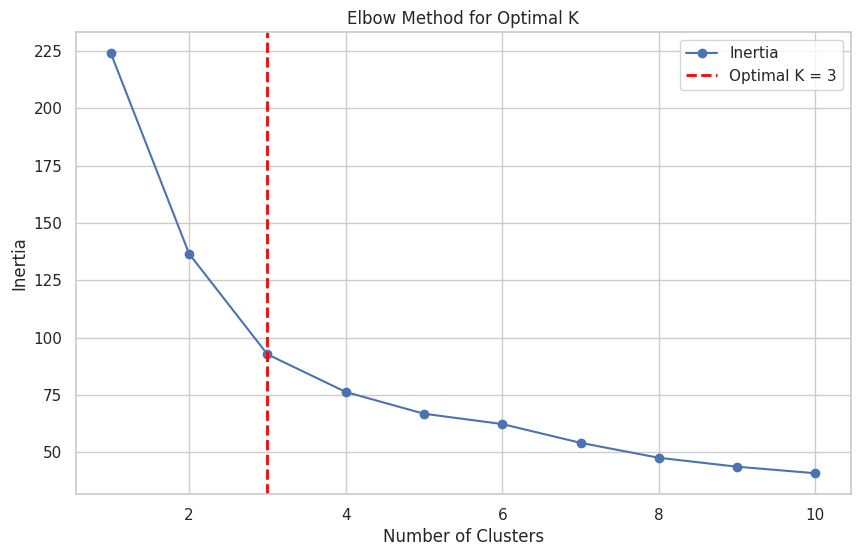

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Hitung Inertia (Seperti kode awal Anda)
inertia = []
range_values = range(1, 11)

for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Tentukan Optimal K Secara Otomatis
p1 = np.array([range_values[0], inertia[0]])
p2 = np.array([range_values[-1], inertia[-1]])

distances = []
for i in range(len(range_values)):
    p = np.array([range_values[i], inertia[i]])
    # Rumus jarak titik ke garis lurus
    dist = np.abs(np.cross(p2-p1, p1-p)) / np.linalg.norm(p2-p1)
    distances.append(dist)

# Ambil K dengan jarak terbesar
optimal_k = range_values[np.argmax(distances)]
print(f"K Optimal yang ditemukan: {optimal_k}")

# Plotting dengan Garis Merah
plt.figure(figsize=(10, 6))
plt.plot(range_values, inertia, marker='o', label='Inertia')

# >>> GARIS MERAH <<<
plt.axvline(x=optimal_k, color='red', linestyle='--', linewidth=2, label=f'Optimal K = {optimal_k}')

plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.legend()
plt.grid(True)
plt.show()

## Penjelasan Visualisasi
 Grafik ini adalah langkah krusial dalam algoritma *Unsupervised Learning* (khususnya K-Means Clustering) untuk menentukan jumlah kelompok (cluster) yang paling ideal untuk data Anda.

Berikut adalah rincian cara membacanya:

### 1. Tujuan Grafik

Grafik ini bertujuan mencari titik keseimbangan antara jumlah cluster yang sedikit (sederhana) dan tingkat kesalahan (*error*) yang rendah. Titik temu ini disebut **Optimal K**.

### 2. Penjelasan Sumbu (Axis)

* **Sumbu X (Number of Clusters):** Menunjukkan jumlah pembagian kelompok data yang diuji, mulai dari 1 cluster hingga 10 cluster.
* **Sumbu Y (Inertia):** Menunjukkan nilai *Within-Cluster Sum of Squares* (WCSS). Secara sederhana, ini mengukur **seberapa rapat** data berada di dalam clusternya masing-masing.
* Nilai Inertia tinggi = Data menyebar luas (cluster kurang padat).
* Nilai Inertia rendah = Data berkumpul rapat (cluster sangat spesifik).



### 3. Mengapa "K = 3" Dipilih? (Garis Merah Putus-putus)

Metode ini disebut "Elbow" karena bentuk kurvanya menyerupai lengan manusia yang menekuk. Kita mencari bagian "siku"-nya.

* **Dari K=1 ke K=2:** Terjadi penurunan inertia yang sangat tajam (garis curam ke bawah). Ini berarti membagi data menjadi 2 kelompok memberikan perbaikan signifikan dibanding hanya 1 kelompok.
* **Dari K=2 ke K=3:** Masih terjadi penurunan yang cukup signifikan.
* **Setelah K=3 (ke K=4, 5, dst):** Penurunan grafiknya mulai melandai (*flattening out*). Penambahan jumlah cluster di atas 3 tidak lagi memberikan penurunan inertia yang drastis.

Oleh karena itu, **K = 3** ditandai dengan garis merah putus-putus sebagai titik optimal. Ini adalah titik di mana penambahan kompleksitas (jumlah cluster) tidak lagi sebanding dengan penurunan error yang didapat (hukum *diminishing returns*).

### Kesimpulan untuk Data Anda

Berdasarkan visualisasi ini, data yang Anda miliki secara statistik paling optimal jika dibagi menjadi **3 kelompok (cluster)** berbeda. Jika Anda memaksakan menjadi 4 atau 5 cluster, perbedaannya tidak terlalu signifikan namun model menjadi lebih rumit.

---


In [ ]:
optimal_k = 3 # Based on the elbow plot interpretation

# Apply KMeans clustering with the optimal_k
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
df_final['Cluster'] = kmeans_model.fit_predict(X_scaled)

print(f"K-Means clustering applied with {optimal_k} clusters.")
print("First 5 rows of df_final with new 'Cluster' column:")
print(df_final.head())

print("\nCluster distribution:")
print(df_final['Cluster'].value_counts())


K-Means clustering applied with 3 clusters.
First 5 rows of df_final with new 'Cluster' column:
  Provinsi  Tahun    Produksi  Luas Panen  Kelembapan  Suhu rata-rata  \
0     Aceh   2018  1751996.94   329515.78       83.98           26.48   
1     Aceh   2019  1714437.60   310012.46       83.90           26.65   
2     Aceh   2020  1861567.10   317869.41       80.82           25.41   
3     Aceh   2021  1634639.60   297058.38       82.33           27.70   
4     Aceh   2022  1513793.00   271750.00       83.00           26.90   

   Curah Hujan (mm)  Lama Penyinaran Matahari (%)  Produktivitas (ku/ha)  \
0            1928.5                            56                  56.49   
1            1916.7                            55                  55.30   
2            1974.5                            58                  55.28   
3            2085.8                            59                  55.03   
4            2154.6                            57                  55.55   

   Clust

=== EVALUASI INFORMASI (EXPLAINED VARIANCE) ===
PC1 menjelaskan : 50.46% variansi data
PC2 menjelaskan : 31.97% variansi data
TOTAL Informasi : 82.43%
----------------------------------------
Interpretasi: Jika Total > 70%, grafik 2D ini sangat akurat merepresentasikan data asli.
----------------------------------------

=== LOADING SCORES (KORELASI FITUR TERHADAP SUMBU) ===
                                   PC1       PC2
Curah Hujan (mm)             -0.603028 -0.306033
Lama Penyinaran Matahari (%)  0.643741  0.256670
Suhu rata-rata               -0.162675  0.761106
Kelembapan                   -0.442145  0.511059
----------------------------------------


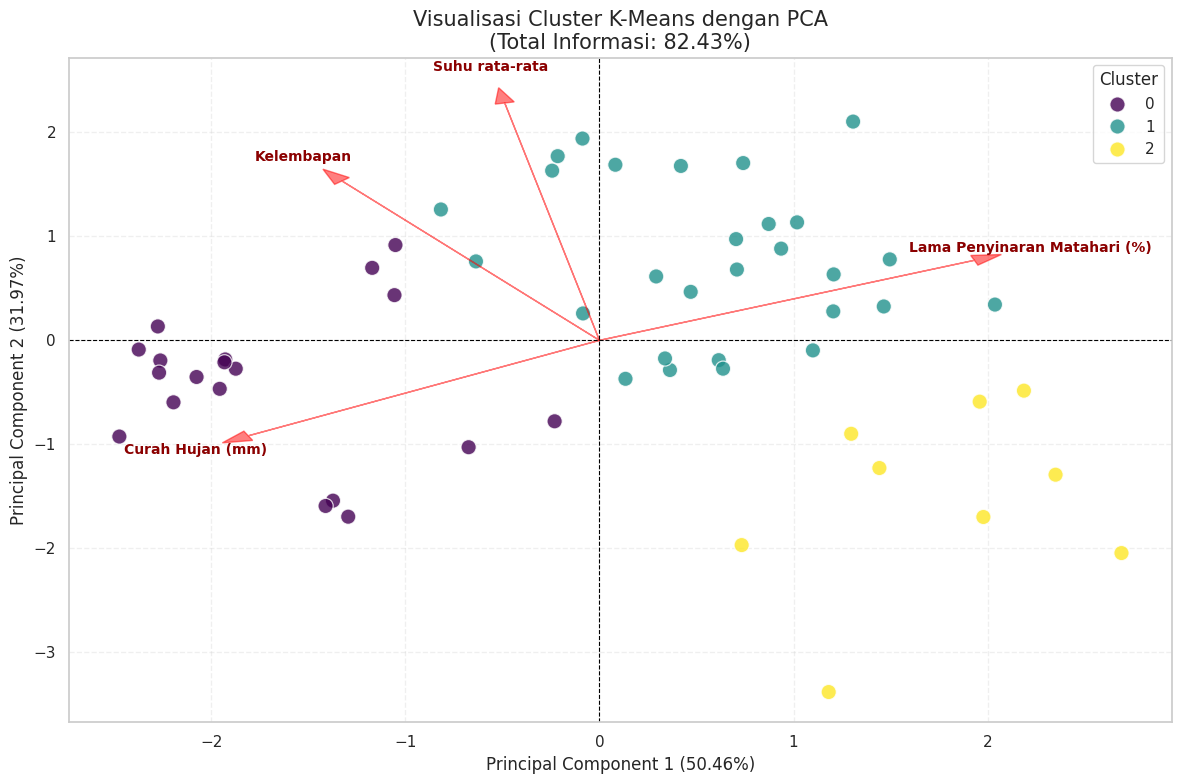

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA

# ==========================================
# Persiapan Data
# ==========================================
features = [
    'Curah Hujan (mm)',
    'Lama Penyinaran Matahari (%)',
    'Suhu rata-rata',
    'Kelembapan'
]

# ==========================================
# Menjalankan PCA
# ==========================================
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df_final['Cluster'].values  # Ambil label cluster K-Means

# ==========================================
# Evaluasi PCA: Explained Variance
# ==========================================
var_ratio = pca.explained_variance_ratio_
pc1_info = var_ratio[0] * 100
pc2_info = var_ratio[1] * 100
total_info = pc1_info + pc2_info

print("=== EVALUASI INFORMASI (EXPLAINED VARIANCE) ===")
print(f"PC1 menjelaskan : {pc1_info:.2f}% variansi data")
print(f"PC2 menjelaskan : {pc2_info:.2f}% variansi data")
print(f"TOTAL Informasi : {total_info:.2f}%")
print("-" * 40)
print("Interpretasi: Jika Total > 70%, grafik 2D ini sangat akurat merepresentasikan data asli.")
print("-" * 40)

# ==========================================
# Evaluasi PCA: Loading Scores
# ==========================================
# Melihat variabel apa yang paling berpengaruh terhadap PC1 dan PC2
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=features
)
print("\n=== LOADING SCORES (KORELASI FITUR TERHADAP SUMBU) ===")
print(loadings)
print("-" * 40)

# ==========================================
# Visualisasi PCA
# ==========================================
plt.figure(figsize=(12, 8))

# Scatter plot
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Cluster',
    data=df_pca,
    palette='viridis',
    s=120,
    alpha=0.8,
    edgecolor='w'
)

# Menambahkan vektor (panah) variabel asli agar lebih informatif (Biplot sederhana)
scale_arrow = 3
for i, feature in enumerate(features):
    plt.arrow(0, 0, pca.components_[0, i] * scale_arrow, pca.components_[1, i] * scale_arrow,
              color='red', alpha=0.5, head_width=0.1)
    plt.text(pca.components_[0, i] * scale_arrow * 1.15,
             pca.components_[1, i] * scale_arrow * 1.15,
             feature, color='darkred', ha='center', va='center', fontsize=10, weight='bold')

plt.title(f'Visualisasi Cluster K-Means dengan PCA\n(Total Informasi: {total_info:.2f}%)', fontsize=15)
plt.xlabel(f'Principal Component 1 ({pc1_info:.2f}%)', fontsize=12)
plt.ylabel(f'Principal Component 2 ({pc2_info:.2f}%)', fontsize=12)
plt.legend(title='Cluster', loc='best')
plt.grid(True, linestyle='--', alpha=0.3)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.tight_layout()

plt.show()

## Penjelasan Visualisasi
Ini adalah visualisasi **PCA (Principal Component Analysis) Biplot**. Visualisasi ini sangat informatif karena menggabungkan dua hal: **sebaran data hasil clustering** (titik-titik warna) dan **pengaruh fitur/variabel** (panah merah) dalam satu gambar.


### 1. Apa itu Sumbu PC1 dan PC2?

Data ini memiliki 4 dimensi (Curah Hujan, Kelembapan, Suhu, Penyinaran Matahari). Manusia tidak bisa melihat grafik 4 dimensi.

* **PCA** meringkas 4 dimensi tersebut menjadi 2 dimensi utama (PC1 dan PC2) agar bisa digambar di layar 2D.
* **Total Informasi: 82.43%**: Ini angka yang sangat bagus. Artinya, grafik 2D ini mampu merepresentasikan **82.43%** informasi asli dari data Anda. Hanya sedikit detail yang hilang saat "diringkas".

### 2. Arti Panah Merah (Vektor Fitur)

Arah panah menunjukkan korelasi dan dominasi fitur terhadap sumbu:

* **Lama Penyinaran Matahari** mengarah ke **kanan**.
* **Curah Hujan** & **Kelembapan** mengarah ke **kiri**.
* **Artinya:** "Lama Penyinaran" bertolak belakang dengan "Curah Hujan". Jika data ada di kanan, berarti harinya panas/terik. Jika di kiri, berarti basah/hujan.
* **Suhu Rata-rata** mengarah ke **atas**, tegak lurus terhadap garis hujan-panas. Ini berarti suhu adalah faktor pembeda tersendiri.

### 3. Interpretasi Karakteristik Cluster (Profil Kelompok)

Di sini kita bisa melihat "kepribadian" dari setiap cluster yang Anda temukan (K=3):

* **Cluster 2 (Kuning - Kanan Bawah): "Kelompok Kering/Terik"**
* Titik-titik kuning berkumpul di area yang ditunjuk panah **Lama Penyinaran Matahari**.
* Posisi mereka berlawanan dengan arah panah Curah Hujan dan Kelembapan.
* **Kesimpulan:** Ini adalah kelompok data dengan kondisi cuaca panas, banyak sinar matahari, dan curah hujan rendah.


* **Cluster 0 (Ungu - Kiri): "Kelompok Basah/Lembap"**
* Titik-titik ungu berkumpul di area yang ditunjuk panah **Curah Hujan** dan **Kelembapan**.
* **Kesimpulan:** Ini adalah kelompok data dengan curah hujan tinggi dan kelembapan tinggi (mungkin musim hujan).


* **Cluster 1 (Hijau - Atas/Tengah): "Kelompok Suhu Tinggi/Moderat"**
* Titik-titik hijau menyebar di area atas, mengikuti arah panah **Suhu Rata-rata**.
* Sebagian berada di tengah-tengah (tidak terlalu basah, tidak terlalu kering), namun cenderung memiliki suhu rata-rata yang lebih tinggi dibanding yang lain.



### Kesimpulan Bisnis/Analisis

Dari visualisasi ini, Anda berhasil membagi data wilayah/waktu panen menjadi 3 kondisi iklim yang berbeda:

1. **Kering & Terik** (Cluster 2)
2. **Basah & Lembap** (Cluster 0)
3. **Suhu Hangat/Normal** (Cluster 1)

---

=== TABEL POSISI CLUSTER PER TAHUN ===
Tahun             2018  2019  2020  2021  2022  2023  2024
Provinsi                                                  
Aceh                 1     1     2     1     1     1     1
Bengkulu             0     0     0     0     0     0     0
Jambi                1     1     2     1     1     1     1
Lampung              2     1     2     1     1     2     2
Riau                 2     0     0     1     0     0     0
Sumatera Barat       0     0     0     0     0     0     0
Sumatera Selatan     1     1     1     1     1     1     2
Sumatera Utara       1     1     1     1     1     1     2


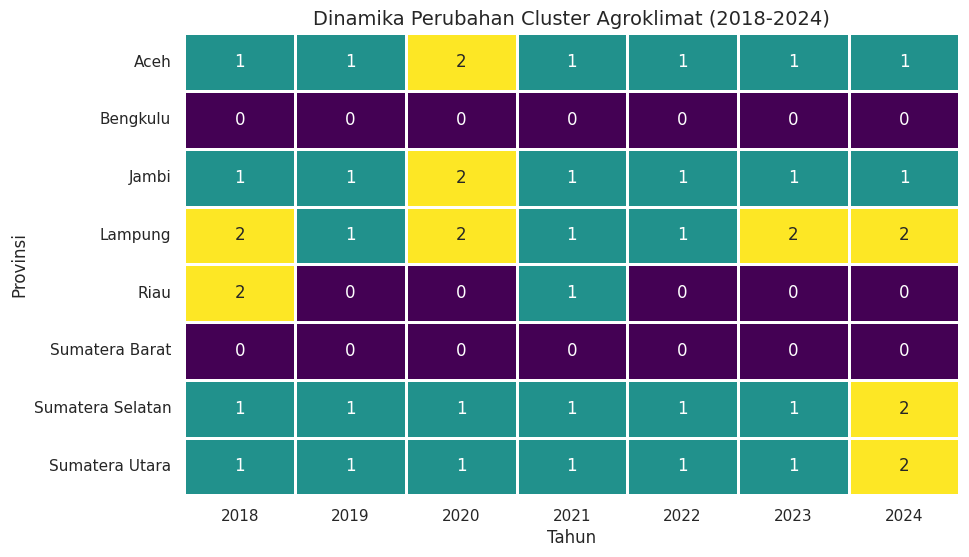

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat Pivot Table: Baris = Provinsi, Kolom = Tahun, Isi = Cluster
pivot_cluster = df_final.pivot(index='Provinsi', columns='Tahun', values='Cluster')

print("=== TABEL POSISI CLUSTER PER TAHUN ===")
print(pivot_cluster)

# Visualisasi Heatmap Kestabilan Iklim
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_cluster, annot=True, cmap='viridis', cbar=False, linewidths=1, linecolor='white')
plt.title('Dinamika Perubahan Cluster Agroklimat (2018-2024)', fontsize=14)
plt.ylabel('Provinsi')
plt.xlabel('Tahun')
plt.show()

## Penjelasan Visualisasi
Berikut adalah penjelasan mendalam mengenai visualisasi **Heatmap "Dinamika Perubahan Cluster Agroklimat (2018-2024)"**:

### 1. Tujuan Visualisasi

Grafik ini bertujuan untuk memetakan bagaimana kondisi agroklimat (iklim pertanian) di berbagai provinsi di Sumatera berubah sepanjang waktu (temporal) selama 7 tahun terakhir. Setiap angka (0, 1, 2) merepresentasikan sebuah **Cluster** atau kategori kondisi iklim tertentu yang telah dikelompokkan oleh algoritma (kemungkinan hasil dari K-Means atau metode clustering lainnya).

### 2. Komponen Grafik

* **Sumbu Y (Vertikal):** Daftar provinsi (Aceh, Bengkulu, Jambi, Lampung, Riau, Sumatera Barat, Sumatera Selatan, Sumatera Utara).
* **Sumbu X (Horizontal):** Rentang waktu dari tahun 2018 hingga 2024.
* **Warna & Angka:**
* **Ungu (0):** Menunjukkan Cluster 0.
* **Hijau Tosca (1):** Menunjukkan Cluster 1.
* **Kuning (2):** Menunjukkan Cluster 2.



### 3. Analisis Pola (Insight Data)

Berikut adalah interpretasi pola yang terlihat dari data tersebut:

**A. Provinsi yang Sangat Stabil (Konsisten)**

* **Bengkulu & Sumatera Barat:** Kedua provinsi ini menunjukkan stabilitas total. Sepanjang 2018-2024, mereka tetap berada di **Cluster 0** (warna ungu). Ini mengindikasikan bahwa karakteristik agroklimat di wilayah ini cenderung tidak mengalami perubahan signifikan atau anomali selama periode tersebut.

**B. Pola Dominan Cluster 1 dengan Perubahan di Akhir**

* **Sumatera Selatan & Sumatera Utara:** Kedua provinsi ini memiliki pola yang identik. Dari 2018 hingga 2023, mereka konsisten berada di **Cluster 1**, namun secara tiba-tiba berubah ke **Cluster 2** pada tahun **2024**. Hal ini mungkin mengindikasikan adanya perubahan iklim drastis atau fenomena cuaca tertentu (seperti El Nino/La Nina) yang terjadi spesifik di tahun 2024.

**C. Pola Serupa (Aceh & Jambi)**

* **Aceh & Jambi:** Memiliki pola yang sangat mirip. Mayoritas berada di **Cluster 1**, namun terdapat lonjakan ke **Cluster 2 pada tahun 2020**. Setelah itu, mereka kembali ke Cluster 1. Ini menunjukkan tahun 2020 adalah tahun anomali bagi kedua provinsi ini.

**D. Provinsi dengan Variabilitas Tinggi (Dinamis)**

* **Lampung:** Ini adalah provinsi yang paling fluktuatif (berubah-ubah). Lampung sering berpindah antara Cluster 1 dan Cluster 2. Ini menunjukkan kondisi agroklimat di Lampung sangat dinamis dan mungkin lebih sulit diprediksi dibandingkan provinsi lain.
* **Riau:** Mengalami transisi yang unik. Dimulai dari Cluster 2 (2018), kemudian turun ke Cluster 0 (2019-2020), sempat naik ke Cluster 1 (2021), dan kembali stabil di Cluster 0 hingga akhir periode. Riau tampaknya mengalami pergeseran karakteristik iklim dari tipe 2 menjadi tipe 0 seiring berjalannya waktu.

### 4. Kesimpulan Umum

* **Cluster 0** tampaknya merepresentasikan kondisi yang paling stabil (terlihat di Bengkulu, Sumbar, dan Riau belakangan ini).
* **Cluster 1** adalah kondisi yang paling umum/dominan di sebagian besar Sumatera.
* **Cluster 2** muncul sebagai indikator anomali atau perubahan (terlihat di Lampung, serta lonjakan mendadak di Sumsel/Sumut pada 2024 dan Aceh/Jambi pada 2020).


=== ANALISIS DAMPAK CUACA TERHADAP HASIL PERTANIAN ===
         Produktivitas (ku/ha)    Produksi  Luas Panen
Cluster                                               
0                        45.42   834374.72   153909.48
1                        50.52  1723768.82   333815.06
2                        49.81  1918409.16   299882.20


/tmp/ipython-input-719544539.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Produktivitas (ku/ha)', data=df_final, palette='viridis')
/tmp/ipython-input-719544539.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Produksi', data=df_final, palette='viridis')


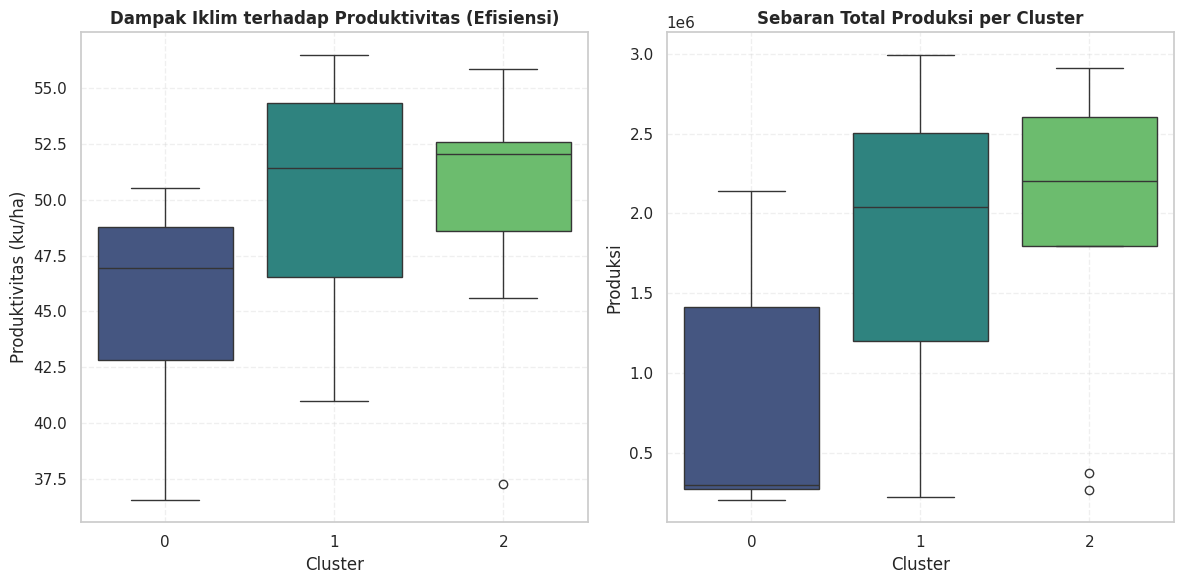

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ==========================================
# 1. Menghitung Rata-rata Per Cluster
# ==========================================
# Kita kelompokkan data berdasarkan 'Cluster' dan hitung rata-rata variabel pertanian
impact_stats = df_final.groupby('Cluster')[['Produktivitas (ku/ha)', 'Produksi', 'Luas Panen']].agg(['mean', 'min', 'max'])

print("=== ANALISIS DAMPAK CUACA TERHADAP HASIL PERTANIAN ===")
# Menampilkan angka rata-rata (mean) saja agar mudah dibaca
print(impact_stats.xs('mean', axis=1, level=1).round(2))

# ==========================================
# 2. Visualisasi Dampak (Boxplot)
# ==========================================
# Boxplot adalah cara terbaik (ilmiah) untuk melihat sebaran data dan perbedaan signifikan
plt.figure(figsize=(12, 6))

# Subplot 1: Produktivitas (Paling Penting)
plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster', y='Produktivitas (ku/ha)', data=df_final, palette='viridis')
plt.title('Dampak Iklim terhadap Produktivitas (Efisiensi)', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.3)

# Subplot 2: Produksi (Total Output)
plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster', y='Produksi', data=df_final, palette='viridis')
plt.title('Sebaran Total Produksi per Cluster', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

## Penjelasan Visualisasi
Berikut adalah penjelasan rinci mengenai visualisasi tersebut. Gambar tersebut memuat dua grafik jenis **Boxplot** yang membandingkan karakteristik tiga kelompok data (Cluster 0, 1, dan 2).

Secara umum, visualisasi ini bertujuan untuk mengelompokkan (clustering) daerah atau unit pertanian berdasarkan performa mereka.

---

### 1. Grafik Kiri: Dampak Iklim terhadap Produktivitas (Efisiensi)

Grafik ini menunjukkan sebaran **Produktivitas** dalam satuan kuintal per hektar (). Ini adalah ukuran **efisiensi** lahan.

* **Cluster 0 (Biru Tua):**
* **Performa Terendah:** Memiliki median (garis tengah di dalam kotak) paling rendah, sekitar **47 ku/ha**.
* **Sebaran:** Rentang datanya cukup lebar ke bawah, menunjukkan ada daerah di cluster ini yang produktivitasnya sangat rendah (sekitar 36-37 ku/ha).


* **Cluster 1 (Teal/Hijau Laut):**
* **Performa Menengah ke Atas:** Mediannya tinggi, sekitar **51-52 ku/ha**.
* **Variasi Tinggi:** Kotaknya sangat panjang (tinggi), yang berarti variasi antar datanya sangat besar. Ada yang sangat produktif, ada yang rendah. Ini menunjukkan ketidakstabilan efisiensi di cluster ini.


* **Cluster 2 (Hijau Muda):**
* **Performa Terbaik (Efisien):** Memiliki median tertinggi (sedikit di atas 52 ku/ha).
* **Konsisten di Atas:** Kotak bagian atas (kuartil atas) lebih sempit, menunjukkan mayoritas data di cluster ini memiliki produktivitas tinggi secara konsisten, meskipun terdapat *outlier* (titik kecil di bawah) yang menandakan ada segelintir kasus dengan nilai rendah.



### 2. Grafik Kanan: Sebaran Total Produksi per Cluster

Grafik ini menunjukkan **Total Produksi** (output absolut). Perhatikan sumbu Y menggunakan notasi ilmiah (), artinya angka tersebut dalam **jutaan**.

* **Cluster 0 (Biru Tua):**
* **Volume Rendah:** Median total produksinya sangat rendah dibandingkan dua cluster lainnya (di bawah 0,5 juta).
* **Kapasitas Kecil:** Meskipun ada "kumis" (garis vertikal) yang naik ke atas, secara umum cluster ini adalah penyumbang total produksi paling sedikit.


* **Cluster 1 (Teal/Hijau Laut):**
* **Volume Besar:** Median produksi melonjak drastis ke angka sekitar **2 juta**.
* **Rentang Lebar:** Persebarannya sangat luas, dari sekitar 0,2 juta hingga 3 juta.


* **Cluster 2 (Hijau Muda):**
* **Volume Tertinggi:** Memiliki median tertinggi (sekitar **2,2 juta**) dan sebaran data yang lebih terkonsentrasi di angka-angka besar (kotaknya berada di posisi paling atas).



---

### Kesimpulan Profiling Cluster

Berdasarkan kedua grafik tersebut, kita dapat menyimpulkan karakteristik tiap cluster:

1. **Cluster 0 (Low Performance):** Kelompok ini adalah daerah/lahan dengan efisiensi rendah (produktivitas per hektar rendah) dan total produksi yang juga kecil. Mungkin ini adalah lahan marginal atau lahan sempit.
2. **Cluster 1 (High Potential, High Variance):** Kelompok ini memiliki skala produksi besar dan produktivitas tinggi, namun **tidak stabil**. Variasinya sangat lebar baik di efisiensi maupun total produksi. Mungkin ini daerah agraris luas yang sebagian sudah maju teknologinya dan sebagian belum.
3. **Cluster 2 (Top Performance):** Kelompok "Juara". Memiliki efisiensi lahan tertinggi (produktivitas tinggi) dan menyumbang volume produksi terbesar secara konsisten.


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Hitung Silhouette Score
sil_score = silhouette_score(X_scaled, df_final['Cluster'])
print(f"Silhouette Score: {sil_score:.4f}")

# Hitung Davies-Bouldin Index
db_index = davies_bouldin_score(X_scaled, df_final['Cluster'])
print(f"Davies-Bouldin Index: {db_index:.4f}")

from scipy.stats import f_oneway

# Mengambil data produktivitas per cluster
prod_cluster_0 = df_final[df_final['Cluster'] == 0]['Produktivitas (ku/ha)']
prod_cluster_1 = df_final[df_final['Cluster'] == 1]['Produktivitas (ku/ha)']
prod_cluster_2 = df_final[df_final['Cluster'] == 2]['Produktivitas (ku/ha)']

# Uji ANOVA
f_stat, p_value = f_oneway(prod_cluster_0, prod_cluster_1, prod_cluster_2)

print(f"F-Statistic: {f_stat:.2f}")
print(f"P-Value: {p_value:.5f}")


Silhouette Score: 0.3665
Davies-Bouldin Index: 0.9742
F-Statistic: 7.53
P-Value: 0.00132


In [4]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVR
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Set page config
st.set_page_config(
    page_title="Dashboard Analisis Produksi Padi Sumatra",
    page_icon="🌾",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Custom CSS
st.markdown("""
    <style>
    .main {
        padding: 0rem 1rem;
    }
    .stAlert {
        margin-top: 1rem;
    }
    h1 {
        color: #2E7D32;
        padding-bottom: 1rem;
    }
    h2 {
        color: #388E3C;
        padding-top: 2rem;
        padding-bottom: 0.5rem;
        border-bottom: 2px solid #81C784;
    }
    h3 {
        color: #43A047;
        padding-top: 1rem;
    }
    .metric-container {
        background-color: #f0f2f6;
        padding: 1rem;
        border-radius: 0.5rem;
        margin: 0.5rem 0;
    }
    </style>
    """, unsafe_allow_html=True)

# ==================== DATA LOADING ====================
@st.cache_data
def load_and_preprocess_data():
    try:
        # Load data using exact filenames from the notebook
        tanaman = pd.read_csv('dataset/Data_Tanaman_Padi_Sumatera.csv')
        iklim = pd.read_csv('dataset/data_iklim_sumatera.csv')
        produktivitas = pd.read_csv('dataset/data_produktivitas_sumatera.csv')

        # Standardize province names
        for df_data in [tanaman, iklim, produktivitas]:
            df_data['Provinsi'] = df_data['Provinsi'].astype(str).str.title()

        # Convert 'Produktivitas (ku/ha)' to float
        produktivitas['Produktivitas (ku/ha)'] = (
            produktivitas['Produktivitas (ku/ha)']
            .str.replace(',', '.', regex=False)
            .astype(float)
        )

        # ==================== COLUMN DROPPING (as per notebook) ====================
        # Drop 'Curah hujan' from 'Tanaman' to avoid duplication during merge
        if 'Curah hujan' in tanaman.columns:
            tanaman = tanaman.drop(columns=['Curah hujan'])

        # Drop 'Suhu Rata-rata (°C)' from 'Iklim' to keep 'Suhu rata-rata' from 'Tanaman'
        cols_to_drop_iklim = [c for c in iklim.columns if 'Suhu Rata-rata' in c]
        if cols_to_drop_iklim:
            iklim = iklim.drop(columns=cols_to_drop_iklim)

        # ==================== MERGE DATA (as per notebook) ====================
        df_merged = pd.merge(tanaman, iklim, on=['Provinsi', 'Tahun'], how='inner')
        df_final = pd.merge(df_merged, produktivitas, on=['Provinsi', 'Tahun'], how='inner')

        # Ensure consistent column names after merge for later use
        # The notebook's final df columns are: 'Suhu rata-rata' (from Tanaman), 'Curah Hujan (mm)' (from Iklim)
        # No specific rename map is needed if previous drops are handled correctly and original names are preserved.

        # ==================== OUTLIER CAPPING (IQR) ====================
        def cap_outliers(df, cols):
            for col in cols:
                if col in df.columns:
                    Q1 = df[col].quantile(0.25)
                    Q3 = df[col].quantile(0.75)
                    IQR = Q3 - Q1
                    df[col] = np.clip(df[col], Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)
            return df

        df_final = cap_outliers(df_final, [
            'Curah Hujan (mm)',
            'Suhu rata-rata', # Using 'Suhu rata-rata' as per merged notebook df
            'Kelembapan'
        ])

        # Normalisasi nama kolom (anti typo & beda format) - keeping this for robustness
        df_final.columns = (
            df_final.columns
            .str.strip()
            .str.replace('  ', ' ')
        )

        return df_final

    except FileNotFoundError as e:
        st.error(f"Gagal memuat data. Pastikan file CSV tersedia di folder: {e}")
        return None
    except Exception as e:
        st.error(f"Terjadi kesalahan saat memproses data: {e}")
        return None

# ==================== HEADER ====================
st.title('🌾 Analisis Produksi Padi dan Indikator Iklim di Sumatra')

with st.expander("ℹ️ Tentang Dashboard", expanded=False):
    st.markdown("""
    Dashboard ini menyajikan analisis mendalam mengenai hubungan antara faktor-faktor iklim,
    luas panen, dan produktivitas terhadap total **Produksi** tanaman padi di Sumatra periode 2018-2024.

    **Fitur Utama:**
    - 📊 Overview Data & Statistik Deskriptif
    - 🔍 Analisis Korelasi Multi-Variabel
    - 📈 Tren Temporal Produksi
    - 🗺️ Analisis Regional per Provinsi
    - 🎯 Clustering & Zonasi Iklim (Dinamika Perubahan & PCA Biplot)
    - 🤖 Pemodelan Prediktif Machine Learning (Target: Produktivitas ku/ha)
    """)

# ==================== SIDEBAR ====================
with st.sidebar:
    st.header("⚙️ Pengaturan")

    # Load data
    with st.spinner('Memuat data...'):
        df_final = load_and_preprocess_data()

    if df_final is None:
        st.stop()

    st.success(f"✅ Data berhasil dimuat: {len(df_final)} baris")

    # Filters
    st.subheader("🔍 Filter Data")

    selected_provinces = st.multiselect(
        "Pilih Provinsi",
        options=sorted(df_final['Provinsi'].unique()),
        default=sorted(df_final['Provinsi'].unique())
    )

    year_range = st.slider(
        "Rentang Tahun",
        min_value=int(df_final['Tahun'].min()),
        max_value=int(df_final['Tahun'].max()),
        value=(int(df_final['Tahun'].min()), int(df_final['Tahun'].max()))
    )

    # Apply filters
    df_filtered = df_final[
        (df_final['Provinsi'].isin(selected_provinces)) &
        (df_final['Tahun'] >= year_range[0]) &
        (df_final['Tahun'] <= year_range[1])
    ]

    st.info(f"📋 Data terfilter: {len(df_filtered)} baris")

    # Analysis selection
    st.subheader("📑 Navigasi Analisis")
    analysis_options = [
        "📊 Overview Data",
        "🔗 Analisis Korelasi",
        "📈 Tren Temporal",
        "🗺️ Analisis Regional",
        "🎯 Clustering Iklim",
        "🤖 Pemodelan Prediktif"
    ]
    selected_analysis = st.radio("Pilih Analisis", analysis_options, index=0)

# ==================== MAIN CONTENT ====================

# 📊 OVERVIEW DATA
if selected_analysis == "📊 Overview Data":
    st.header("📊 Overview Data")

    col1, col2, col3, col4 = st.columns(4)
    with col1:
        st.metric("Total Data", f"{len(df_filtered):,}")
    with col2:
        st.metric("Jumlah Provinsi", len(df_filtered['Provinsi'].unique()))
    with col3:
        st.metric("Rentang Tahun", f"{df_filtered['Tahun'].min()}-{df_filtered['Tahun'].max()}")
    with col4:
        st.metric("Total Produksi (Ton)", f"{df_filtered['Produksi'].sum():,.0f}")

    st.subheader("📋 Data Sample")
    st.dataframe(df_filtered.head(10), use_container_width=True)

    st.subheader("📊 Statistik Deskriptif")
    st.dataframe(df_filtered.describe().T, use_container_width=True)

# 🔗 ANALISIS KORELASI
elif selected_analysis == "🔗 Analisis Korelasi":
    st.header("🔗 Analisis Korelasi")

    st.subheader("🔥 Heatmap Korelasi")

    # Using columns as present in the notebook's df_final and correlation section
    corr_cols = [
        'Produksi',
        'Produktivitas (ku/ha)',
        'Luas Panen',
        'Curah Hujan (mm)',
        'Kelembapan',
        'Suhu rata-rata', # Changed to match notebook's merged df
        'Lama Penyinaran Matahari (%)'
    ]


    df_corr = df_filtered[corr_cols].corr()

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(df_corr, annot=True, cmap='coolwarm', center=0, fmt=".2f",
                linewidths=1, square=True, cbar_kws={"shrink": 0.8}, ax=ax)
    ax.set_title('Heatmap Korelasi Antar Variabel', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    st.pyplot(fig)

    st.subheader("📊 Korelasi dengan Produktivitas (ku/ha)") # Changed title to reflect notebook analysis

    relevant_columns = [
        'Produksi',
        'Produktivitas (ku/ha)',
        'Luas Panen',
        'Curah Hujan (mm)',
        'Kelembapan',
        'Suhu rata-rata', # Changed to match notebook's merged df
        'Lama Penyinaran Matahari (%)'
    ]

    df_correlation = df_filtered[relevant_columns].corr()
    corr_target = df_correlation['Produktivitas (ku/ha)'].drop('Produktivitas (ku/ha)').sort_values(ascending=True); # Changed target to Produktivitas (ku/ha)

    correlation_threshold = st.slider("Threshold Korelasi", 0.0, 1.0, 0.1, 0.05)
    selected_features = corr_target[abs(corr_target) >= correlation_threshold]

    fig, ax = plt.subplots(figsize=(10, 6))
    colors = plt.cm.viridis(np.linspace(0, 1, len(selected_features)))
    selected_features.plot(kind='barh', color=colors, ax=ax)
    ax.axvline(x=correlation_threshold, color='red', linewidth=1.2, linestyle='--', alpha=0.7)
    ax.axvline(x=-correlation_threshold, color='red', linewidth=1.2, linestyle='--', alpha=0.7)
    ax.axvline(x=0, color='black', linewidth=0.8, linestyle='--', alpha=0.5)
    ax.set_title(f'Korelasi dengan Produktivitas (threshold ≥ {correlation_threshold})', fontweight='bold') # Changed title
    ax.set_xlabel('Nilai Korelasi')
    ax.set_ylabel('Variabel')
    ax.grid(axis='x', linestyle='--', alpha=0.3)
    plt.tight_layout()
    st.pyplot(fig)

# 📈 TREN TEMPORAL
elif selected_analysis == "📈 Tren Temporal":
    st.header("📈 Tren Temporal")

    df_trend = df_filtered.groupby('Tahun').mean(numeric_only=True).reset_index()

    # These columns are directly used in notebook's trend analysis
    trend_cols = ['Produksi', 'Produktivitas (ku/ha)', 'Kelembapan', 'Suhu rata-rata', 'Lama Penyinaran Matahari (%)']

    selected_trend = st.selectbox("Pilih Variabel untuk Analisis Tren", trend_cols)

    col1, col2 = st.columns([2, 1])

    with col1:
        fig, ax = plt.subplots(figsize=(12, 6))
        # Sum for total production, mean for other climate/productivity factors
        if selected_trend == 'Produksi':
            df_trend_sum = df_filtered.groupby('Tahun')['Produksi'].sum().reset_index()
            sns.lineplot(data=df_trend_sum, x='Tahun', y=selected_trend, marker='o', linewidth=2.5, ax=ax)
            ax.set_title(f'Total Tren {selected_trend} (2018-2024)', fontsize=14, fontweight='bold')
            stats_df = df_trend_sum
        else:
            sns.lineplot(data=df_trend, x='Tahun', y=selected_trend, marker='o', linewidth=2.5, ax=ax)
            ax.set_title(f'Rata-rata Tren {selected_trend} (2018-2024)', fontsize=14, fontweight='bold')
            stats_df = df_trend

        ax.set_xlabel('Tahun', fontsize=12)
        ax.set_ylabel(selected_trend, fontsize=12)
        ax.grid(True, linestyle='--', alpha=0.3)
        plt.tight_layout()
        st.pyplot(fig)

    with col2:
        st.subheader("📊 Statistik Tren")
        st.metric("Nilai Tertinggi", f"{stats_df[selected_trend].max():,.2f}")
        st.metric("Nilai Terendah", f"{stats_df[selected_trend].min():,.2f}")
        st.metric("Rata-rata", f"{stats_df[selected_trend].mean():,.2f}")
        st.metric("Std Deviasi", f"{stats_df[selected_trend].std():,.2f}")

    st.subheader("📊 Distribusi Data")
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.histplot(data=df_filtered, x=selected_trend, kde=True, bins=30, ax=ax)
    ax.set_title(f'Distribusi {selected_trend}', fontsize=14, fontweight='bold')
    ax.set_xlabel(selected_trend, fontsize=12)
    ax.set_ylabel('Frekuensi', fontsize=12)
    plt.tight_layout()
    st.pyplot(fig)

# 🗺️ ANALISIS REGIONAL
elif selected_analysis == "🗺️ Analisis Regional":
    st.header("🗺️ Analisis Regional per Provinsi")

    selected_province = st.selectbox("Pilih Provinsi untuk Analisis Detail",
                                     sorted(df_filtered['Provinsi'].unique()))

    df_province = df_filtered[df_filtered['Provinsi'] == selected_province]

    col1, col2, col3 = st.columns(3)
    with col1:
        st.metric("Total Produksi", f"{df_province['Produksi'].sum():,.0f} Ton")
    with col2:
        st.metric("Rata-rata Produktivitas", f"{df_province['Produktivitas (ku/ha)'].mean():.2f} ku/ha")
    with col3:
        st.metric("Total Luas Panen", f"{df_province['Luas Panen'].sum():,.0f} ha")

    st.subheader(f"📈 Tren Produksi - {selected_province}")
    fig, ax = plt.subplots(figsize=(12, 5))
    sns.lineplot(data=df_province, x='Tahun', y='Produksi', marker='o', linewidth=2.5, ax=ax)
    ax.set_title(f'Tren Produksi {selected_province}', fontsize=14, fontweight='bold')
    ax.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    st.pyplot(fig)

    st.subheader("🔍 Korelasi Variabel Iklim dengan Produktivitas (ku/ha)") # Changed title

    climate_vars = ['Kelembapan', 'Lama Penyinaran Matahari (%)', 'Curah Hujan (mm)', 'Suhu rata-rata'] # Changed column name
    corr_data = []

    for var in climate_vars:
        if var in df_province.columns and df_province[var].nunique() > 1 and df_province['Produktivitas (ku/ha)'].nunique() > 1:
            corr = df_province['Produktivitas (ku/ha)'].corr(df_province[var]) # Target is Produktivitas
            corr_data.append({'Variabel': var, 'Korelasi': corr})

    if corr_data:
        df_corr_province = pd.DataFrame(corr_data)

        fig, ax = plt.subplots(figsize=(10, 5))
        sns.barplot(data=df_corr_province, x='Korelasi', y='Variabel', palette='viridis', ax=ax)
        ax.axvline(x=0, color='black', linewidth=0.8, linestyle='--')
        ax.set_title(f'Korelasi Variabel Iklim thd Produktivitas - {selected_province}', fontsize=14, fontweight='bold') # Changed title
        ax.set_xlabel('Nilai Korelasi')
        plt.tight_layout()
        st.pyplot(fig)
    else:
        st.warning("Data tidak cukup untuk menampilkan korelasi variabel iklim.")

# 🎯 CLUSTERING IKLIM
elif selected_analysis == "🎯 Clustering Iklim":
    st.header("🎯 Analisis Clustering Berdasarkan Karakteristik Iklim")

    st.info("💡 Clustering membantu mengidentifikasi zonasi iklim. Kita akan melihat karakteristik Produksi di setiap cluster.")

    # Fitur untuk clustering
    clustering_features = [
        'Curah Hujan (mm)',
        'Lama Penyinaran Matahari (%)',
        'Suhu rata-rata',
        'Kelembapan'
    ]

    # Bersihkan Data
    df_clustering = df_filtered[clustering_features].dropna()

    if df_clustering.empty or len(df_clustering) < 2:
        st.warning("⚠️ Data tidak cukup untuk melakukan clustering. Silakan pilih lebih dari satu tahun atau provinsi.")
    else:
        # Standardisasi Data
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(df_clustering)

        # ---------------------------------------------------------
        # MULAI PERBAIKAN: METODE ELBOW GEOMETRIS
        # ---------------------------------------------------------
        st.subheader("📊 Metode Elbow untuk Menentukan Jumlah Cluster Optimal")

        # Tentukan Range K (Maksimal 10 atau sejumlah data jika < 10)
        max_k = min(10, len(df_clustering))
        range_values = range(1, max_k + 1)
        inertia = []

        # Hitung Inertia
        with st.spinner("Menghitung optimal cluster..."):
            for i in range_values:
                kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
                kmeans.fit(X_scaled)
                inertia.append(kmeans.inertia_)

        # Tentukan Optimal K Secara Otomatis (Metode Jarak Titik ke Garis)
        optimal_k = 1
        if len(range_values) > 1:
            p1 = np.array([range_values[0], inertia[0]])
            p2 = np.array([range_values[-1], inertia[-1]])

            distances = []
            for i in range(len(range_values)):
                p = np.array([range_values[i], inertia[i]])
                # Rumus jarak titik ke garis lurus
                dist = np.abs(np.cross(p2-p1, p1-p)) / np.linalg.norm(p2-p1)
                distances.append(dist)

            # Ambil K dengan jarak terbesar
            optimal_k = range_values[np.argmax(distances)]

        st.success(f"K Optimal yang ditemukan secara otomatis: **{optimal_k}**")

        # Plotting dengan Garis Merah (Sesuai Referensi)
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.plot(range_values, inertia, marker='o', label='Inertia')

        # >>> GARIS MERAH <<<
        ax.axvline(x=optimal_k, color='red', linestyle='--', linewidth=2, label=f'Optimal K = {optimal_k}')

        ax.set_xlabel('Number of Clusters')
        ax.set_ylabel('Inertia')
        ax.set_title('Elbow Method for Optimal K')
        ax.legend()
        ax.grid(True)
        st.pyplot(fig)

        # ---------------------------------------------------------
        # SELESAI PERBAIKAN ELBOW
        # ---------------------------------------------------------

        # Slider untuk memilih K (Default ke Optimal K yang ditemukan)
        optimal_k_slider = st.slider("Pilih Jumlah Cluster", 1, max_k, int(optimal_k))

        if optimal_k_slider >= 1:
            # Jalankan KMeans Final dengan K pilihan user
            kmeans_model = KMeans(
                n_clusters=optimal_k_slider,
                random_state=42,
                n_init='auto'
            )

            df_filtered_copy = df_filtered.copy()
            cluster_labels = np.full(len(df_filtered_copy), -1)

            # Masking untuk sinkronisasi indeks
            valid_mask = df_filtered[clustering_features].notna().all(axis=1)

            # Fit & Predict
            cluster_labels[valid_mask] = kmeans_model.fit_predict(X_scaled)
            df_filtered_copy['Cluster'] = cluster_labels

            st.subheader(f"📍 Hasil Clustering (Visualisasi PCA Biplot)")

            # --- LOGIKA PCA & BIPLOT ---
            pca = PCA(n_components=2)
            pca_result = pca.fit_transform(X_scaled)

            df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
            df_pca['Cluster'] = cluster_labels[valid_mask]

            var_ratio = pca.explained_variance_ratio_
            pc1_info = var_ratio[0] * 100
            pc2_info = var_ratio[1] * 100
            total_info = pc1_info + pc2_info

            fig, ax = plt.subplots(figsize=(12, 8))

            # Scatter plot
            sns.scatterplot(
                x='PC1', y='PC2', hue='Cluster', data=df_pca,
                palette='viridis', s=120, alpha=0.8, edgecolor='w', ax=ax
            )

            # Vektor Biplot
            scale_arrow = 3
            features = clustering_features

            for i, feature in enumerate(features):
                ax.arrow(0, 0,
                         pca.components_[0, i] * scale_arrow,
                         pca.components_[1, i] * scale_arrow,
                         color='red', alpha=0.5, head_width=0.1)
                ax.text(pca.components_[0, i] * scale_arrow * 1.15,
                        pca.components_[1, i] * scale_arrow * 1.15,
                        feature, color='darkred', ha='center', va='center',
                        fontsize=10, weight='bold')

            ax.set_title(f'Visualisasi Cluster K-Means dengan PCA\n(Total Informasi: {total_info:.2f}%)', fontsize=15)
            ax.set_xlabel(f'Principal Component 1 ({pc1_info:.2f}%)', fontsize=12)
            ax.set_ylabel(f'Principal Component 2 ({pc2_info:.2f}%)', fontsize=12)
            ax.legend(title='Cluster', loc='best')
            ax.grid(True, linestyle='--', alpha=0.3)
            ax.axhline(0, color='black', linewidth=0.8, linestyle='--')
            ax.axvline(0, color='black', linewidth=0.8, linestyle='--')

            st.pyplot(fig)

            # Statistik Cluster
            col1, col2 = st.columns(2)
            with col1:
                st.write("**Distribusi Cluster:**")
                st.dataframe(df_filtered_copy['Cluster'].value_counts().sort_index())
            with col2:
                st.write("**Statistik Produksi (Ton) per Cluster:**")
                cluster_stats = (
                    df_filtered_copy
                    .groupby('Cluster')['Produksi']
                    .agg(['mean', 'sum', 'std', 'count'])
                )
                st.dataframe(cluster_stats, use_container_width=True)

            # --- Heatmap Dinamika Cluster ---
            st.markdown("---")
            st.subheader("🗓️ Dinamika Perubahan Cluster Agroklimat (2018-2024)")

            if df_filtered_copy['Tahun'].nunique() > 1:
                pivot_cluster = df_filtered_copy.pivot(index='Provinsi', columns='Tahun', values='Cluster')
                fig_height = max(6, len(pivot_cluster) * 0.5)

                fig, ax = plt.subplots(figsize=(12, fig_height))
                sns.heatmap(pivot_cluster, annot=True, cmap='viridis', cbar=False,
                           linewidths=1, linecolor='white', ax=ax)

                ax.set_title('Peta Perubahan Cluster per Provinsi', fontsize=14, fontweight='bold', pad=15)
                plt.tight_layout()
                st.pyplot(fig)
            else:
                st.info("ℹ️ Pilih rentang tahun lebih dari 1 untuk melihat dinamika perubahan cluster.")


# 🤖 PEMODELAN PREDIKTIF
elif selected_analysis == "🤖 Pemodelan Prediktif":
    st.header("🤖 Pemodelan Prediktif Produktivitas (ku/ha)") # Changed title

    st.info("🎯 Membandingkan performa berbagai model machine learning untuk prediksi **Produktivitas (ku/ha)** padi.") # Changed target in info

    # Feature columns as used in notebook's predictive modeling section (Hipotesis 3)
    feature_cols = [
        'Produksi',
        'Luas Panen',
        'Curah Hujan (mm)',
        'Lama Penyinaran Matahari (%)',
        'Kelembapan',
        'Suhu rata-rata' # Changed to match notebook's merged df
    ]

    # Target variable as used in notebook's predictive modeling section (Hipotesis 3)
    target_col = 'Produktivitas (ku/ha)'

    df_model = df_filtered[feature_cols + [target_col]].dropna()

    if df_model.empty:
        st.warning("⚠️ Data tidak cukup untuk Pemodelan Prediktif. Silakan sesuaikan filter data.")
    else:
        X = df_model[feature_cols]
        y = df_model[target_col]

        test_size = st.slider("Ukuran Data Test (%)", 10, 40, 20, 5) / 100

        # Ensure enough samples for both train and test sets after split
        if len(X) * (1 - test_size) < 1 or len(X) * test_size < 1:
            st.warning("⚠️ Ukuran data training atau testing terlalu kecil. Sesuaikan filter data atau ukuran data test.")
        else:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

            st.write(f"📊 Data Training: {len(X_train)} | Data Testing: {len(X_test)}")

            models = {
                'Linear Regression': LinearRegression(),
                'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
                'SVR': SVR()
            }

            results = []

            with st.spinner('🔄 Training models...'):
                for name, model in models.items():
                    model.fit(X_train, y_train)
                    y_pred = model.predict(X_test) # Corrected typo here

                    mae = mean_absolute_error(y_test, y_pred)
                    mse = mean_squared_error(y_test, y_pred)
                    rmse = np.sqrt(mse)
                    r2 = r2_score(y_test, y_pred)

                    results.append({
                        'Model': name,
                        'MAE': mae,
                        'RMSE': rmse,
                        'R²': r2
                    })

            df_results = pd.DataFrame(results)

            st.subheader("📊 Perbandingan Performa Model")

            col1, col2 = st.columns([1, 1])

            with col1:
                st.dataframe(df_results.style.highlight_min(subset=['MAE', 'RMSE'], color='lightgreen')
                            .highlight_max(subset=['R²'], color='lightgreen'), use_container_width=True)

            with col2:
                fig, ax = plt.subplots(figsize=(8, 5))
                df_results.plot(x='Model', y='R²', kind='bar', ax=ax, color='skyblue', legend=False)
                ax.set_title('Perbandingan R² Score', fontsize=14, fontweight='bold')
                ax.set_ylabel('R² Score')
                ax.set_xlabel('')
                ax.set_xticklabels(df_results['Model'], rotation=45, ha='right')
                ax.grid(axis='y', linestyle='--', alpha=0.3)
                plt.tight_layout()
                st.pyplot(fig)

            best_model = df_results.loc[df_results['R²'].idxmax(), 'Model']
            st.success(f"🏆 Model terbaik: **{best_model}** dengan R² = {df_results['R²'].max():.4f}")

# ==================== FOOTER ====================
st.markdown("---")
st.markdown("""
    <div style='text-align: center; color: #666; padding: 20px;'>
        <p>Dashboard Analisis Produksi Padi Sumatra 2018-2024</p>
        <p>Data Processing & Visualization | Machine Learning Analytics</p>
    </div>
    """, unsafe_allow_html=True)


Overwriting app.py
